# Understanding the efficiency of apartments
## Data Imputation of the Diagnosis of Energy Performance Dataset (PDE)
Daotan Yang \\
30 August 2023

This report is divided into three parts: exploratory data analysis, DAE, and current problems and follow-up plans.


Since the imputation features related to 'Qualité_isolation' (quality_insulation) are typical four-category features, the values in these special features are composed of four types: insuffisante (poor), moyenne (average), bonne (good), très bonne (very good) composition. So I first interpolated one of the features: 'Qualité_isolation_plancher_bas'('Quality_insulation_lower_floor') to verify the effectiveness of the method.


### EDA
The EDA part did a simple analysis of the data. After the analysis, I decided to first analyze the
'Qualité_isolation_plancher_bas': 'Quality_insulation_lower_floor'。At the same time, I selected some features that may be related to Quality_insulation_lower_floor, such as construction year, primary energy consumption, etc. And a simple analysis of these features is carried out.


### DAE
This section attempts to impute missing values using DAE.

### Current problems and follow-up plans
This part summarizes the problems encountered in the research process and my follow-up research plan.


# Result

## Quality_insulation_lower_floor data

By analyzing the results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.593|0.602|0.596|0.580|
|total loss   |0.268|0.377|0.374|0.321|
|target col acc|0.581|0.590|0.591|0.598|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10% (note that the missing rate of 10% is very close to the missing rate of the real dataset, and the missing rate of the target column in the real dataset 8.5%)

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.553|0.534|
|total loss   |0.365|0.310|
|target col acc|0.611|0.619|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

## Quality_insulation_walls data

By analyzing the results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.428|0.442|0.431|0.419|
|total loss   |0.235|0.350|0.351|0.292|
|target col acc|0.705|0.697|0.705|0.711|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10%

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.397|0.387|
|total loss   |0.344|0.285|
|target col acc|0.724|0.727|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

## Quality_insulation_carpentry data

By analyzing the results, we can see that DAE2 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.552|0.532|0.523|0.525|
|total loss   |0.258|0.373|0.374|0.312|
|target col acc|0.551|0.562|0.560|0.566|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10%

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.500|0.498|
|total loss   |0.369|0.306|
|target col acc|0.574|0.583|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

## Quality_insulation_upper_floor_roof_terrace data

By analyzing the results, we can see that DAE2 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.909|0.929|0.751|0.833|
|total loss   |0.338|0.437|0.401|0.367|
|target col acc|0.571|0.568|0.624|0.600|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10%.

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.747|0.805|
|total loss   |0.394|0.363|
|target col acc|0.625|0.604|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

## ECS data

It's important to note that when calculating the imputation accuracy for the ECS feature, I normalized the ECS data to fall within the [0, 1] range. Any error within ±0.03 was considered as a correct imputation.

By analyzing the results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.049|0.049|0.046|0.045|
|total loss   |0.18|0.184|0.182|0.180|
|target col acc|0.672|0.685|0.711|0.715|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10%.

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.033|0.032|
|total loss   |0.175|0.172|
|target col acc|0.805|0.817|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

# Exploratory Data Analysis

### Data load

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load the data set. In order not to exceed my RAM limit, I only loaded some columns, and I selected all the features under the Isolation category.

First of all, I want to explain that I did not choose Conso_ECS_é_primaire as follows:


1. The missing value ratio is very low, about 9.7e-7. Compared with other features, the missing value ratio of this feature is too low.
2. When I was doing data analysis, I found that the correlation between Conso_ECS_é_primaire and several other features is not high, and the introduction of Conso_ECS_é_primaire will have the effect of introducing noise instead. Therefore, I plan to perform separate data imputation on the Conso_ECS_é_primaire feature.


In [ ]:
df_DPE_dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dpe-v2-logements-existants.csv',
                usecols = ['Conso_ECS_é_primaire',
                      'Qualité_isolation_plancher_bas',
                      'Qualité_isolation_murs',
                      'Qualité_isolation_menuiseries',
                      'Qualité_isolation_plancher_haut_toit_terrase',
                      'Conso_5_usages_é_primaire',
                      'Conso_ECS_é_finale',
                      'Type_énergie_principale_ECS',
                      'Conso_é_finale_générateur_ECS_n°1',
                      'Conso_é_finale_générateur_ECS_n°2',
                      'Isolation_toiture_(0/1)',
                      'Deperditions_planchers_bas',
                      'Qualité_isolation_enveloppe',
                      'Déperditions_murs',
                      'Déperditions_portes',
                      'Deperditions_baies_vitrées',
                      'Deperditions_planchers_hauts',
                      'Qualité_isolation_plancher_haut_comble_aménagé',
                      'Qualité_isolation_plancher_haut_comble_perdu',
                      'Année_construction',
                      'Surface_habitable_immeuble',
                      'Surface_habitable_logement',
                      'Code_postal_(BAN)',
                      ],
                sep = ',')

I used a dictionary to map the column names of interest to their corresponding English names. And added Chinese notes (Chinese is my mother tongue)

In [ ]:
# Column name mapping dictionary
name_dict = {
    'Conso_ECS_é_primaire': 'Primary_ECS_Consumption',    # 初级能源消耗系统（ECS）消耗
    'Qualité_isolation_plancher_bas': 'Quality_insulation_lower_floor', # 低层地板绝缘质量
    'Qualité_isolation_murs': 'Quality_insulation_walls',   # 墙体绝缘质量
    'Qualité_isolation_menuiseries': 'Quality_insulation_carpentry',    # 木工绝缘质量
    'Qualité_isolation_plancher_haut_toit_terrase': 'Quality_insulation_upper_floor_roof_terrace',  # 顶楼地板及屋顶露台绝缘质量
    'Conso_5_usages_é_primaire': 'Primary_5_usages_consumption',    # 初级能源5用途消耗
    'Conso_ECS_é_finale': 'Final_ECS_Consumption',  # 最终能源消耗系统（ECS）消耗
    'Type_énergie_principale_ECS': 'Type_main_energy_ECS',  # 主要能源消耗系统（ECS）类型
    'Conso_é_finale_générateur_ECS_n°1': 'Final_consumption_ECS_generator_no1', # 能源消耗系统（ECS）发电机1最终消耗
    'Conso_é_finale_générateur_ECS_n°2': 'Final_consumption_ECS_generator_no2', # 能源消耗系统（ECS）发电机2最终消耗
    'Isolation_toiture_(0/1)': 'Roof_insulation_(0/1)',     # 屋顶绝缘（0/1）
    'Deperditions_planchers_bas': 'Losses_lower_floors',    # 底层楼板热量损失
    'Qualité_isolation_enveloppe': 'Quality_insulation_envelope',   # 围护结构绝缘质量
    'Déperditions_murs': 'Losses_walls',    # 墙体热量损失
    'Déperditions_portes': 'Losses_doors',  # 门的热量损失
    'Deperditions_baies_vitrées': 'Losses_glazed_bays',     # 玻璃窗户热量损失
    'Deperditions_planchers_hauts': 'Losses_upper_floors',      # 上层楼板热量损失
    'Qualité_isolation_plancher_haut_comble_aménagé': 'Quality_insulation_upper_floor_arranged_attic',  # 整理过的阁楼上层楼板绝缘质量
    'Qualité_isolation_plancher_haut_comble_perdu': 'Quality_insulation_upper_floor_lost_attic',    # 丢失的阁楼上层楼板绝缘质量
    'Année_construction': 'Year_construction',  # 建筑年份
    'Surface_habitable_immeuble': 'Living_area_building',   # 建筑物的居住面积
    'Surface_habitable_logement': 'Living_area_housing',    # 住房的居住面积
    'Code_postal_(BAN)': 'Postal_code_(BAN)',  # 邮政编码（BAN）

}

# 使用rename方法重命名列
df_DPE_dataset.rename(columns = name_dict, inplace = True)

In [ ]:
df_DPE_dataset

Year_construction  Living_area_building  Living_area_housing  \
0                   1945.0                 220.8                220.8   
1                   1948.0                   NaN                 70.6   
2                   1948.0                2200.0                109.0   
3                   1976.0                3292.3                 47.5   
4                   1948.0                   NaN                 36.4   
...                    ...                   ...                  ...   
4277638             2013.0                  46.4                 46.4   
4277639             1960.0                3870.0                 59.0   
4277640             1945.0                   NaN                 70.0   
4277641             2014.0                1327.0                 49.7   
4277642             1961.0                  70.0                 70.0   

         Postal_code_(BAN)  Final_ECS_Consumption  \
0                  25000.0                 4463.6   
1                  13016.0                 4522.1   
2                  93100.0                 7035.3   
3                  44800.0                 2576.8   
4                  92330.0                 1858.2   
...                    ...                    ...   
4277638            44240.0                 2486.1   
4277639            25000.0                 2771.0   
4277640            44530.0                 1864.7   
4277641            51100.0                 1205.3   
4277642            91330.0                 2705.7   

         Primary_5_usages_consumption  Primary_ECS_Consumption  \
0                             41345.2                   6600.7   
1                             15403.7                   4522.1   
2                             63792.5                  22815.4   
3                              8334.7                   3633.3   
4                              8857.1                   1858.2   
...                               ...                      ...   
4277638                        4365.9                   2486.1   
4277639                       18778.5                   3907.1   
4277640                       36347.2                   4288.8   
4277641                        3842.7                   1699.5   
4277642                       14378.6                   2705.7   

         Roof_insulation_(0/1)  Losses_glazed_bays  Losses_walls  ...  \
0                          0.0                91.3         191.0  ...   
1                          NaN                16.1         134.9  ...   
2                          NaN               764.5        5368.1  ...   
3                          NaN                 NaN           NaN  ...   
4                          NaN                40.2          27.4  ...   
...                        ...                 ...           ...  ...   
4277638                    1.0                 7.9           4.3  ...   
4277639                    NaN              2362.8        5110.1  ...   
4277640                    1.0                35.5          92.5  ...   
4277641                    NaN               373.2         208.9  ...   
4277642                    0.0                22.4          88.6  ...   

         Quality_insulation_envelope  Quality_insulation_carpentry  \
0                       insuffisante                         bonne   
1                       insuffisante                         bonne   
2                       insuffisante                       moyenne   
3                       insuffisante                       moyenne   
4                       insuffisante                  insuffisante   
...                              ...                           ...   
4277638                   très bonne                    très bonne   
4277639                 insuffisante                       moyenne   
4277640                 insuffisante                  insuffisante   
4277641                        bonne                    très bonne   
4277642                 insuffisante                   

In [ ]:
# output the data type of different featurers
def print_dtypes(df):
    '''
    Func:
        print the list of data type in dataframe
    Input:
        df : Dataframe
    Output:
        No return

    '''
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

Observe the data type of features

In [ ]:
print('The type of the features in DPE dataset: \n')
print_dtypes(df_DPE_dataset)

The type of the features in DPE dataset: 

Year_construction: float64
Living_area_building: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Primary_ECS_Consumption: float64
Roof_insulation_(0/1): float64
Losses_glazed_bays: float64
Losses_walls: float64
Losses_lower_floors: float64
Losses_upper_floors: float64
Losses_doors: float64
Quality_insulation_envelope: object
Quality_insulation_carpentry: object
Quality_insulation_walls: object
Quality_insulation_lower_floor: object
Quality_insulation_upper_floor_roof_terrace: object
Quality_insulation_upper_floor_arranged_attic: object
Quality_insulation_upper_floor_lost_attic: object
Type_main_energy_ECS: object
Final_consumption_ECS_generator_no1: float64
Final_consumption_ECS_generator_no2: float64


In [ ]:
# output the missing ratio of featurers
def check_missing_values(df):
    '''
    Func:
        compute the missing ratio of features
    Input:
        df : Dataframe
    Output:
        feature: dictionary, store the missing ratio of features

    '''
    missing_values = df.isnull().mean()
    missing_features = missing_values[missing_values > 0].index.tolist()
    return {feature: missing_values[feature] for feature in missing_features}

In [ ]:
missing_results = check_missing_values(df_DPE_dataset)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in DPE data: \n')
print(df_missing_results)

The information about missing values in DPE data: 

                                          feature  missing_ratio
0                               Year_construction   3.183333e-01
1                            Living_area_building   6.773812e-01
2                             Living_area_housing   1.102546e-02
3                               Postal_code_(BAN)   5.146526e-03
4                           Final_ECS_Consumption   9.350944e-07
5                    Primary_5_usages_consumption   1.077696e-04
6                         Primary_ECS_Consumption   9.350944e-07
7                           Roof_insulation_(0/1)   3.249902e-01
8                              Losses_glazed_bays   8.814667e-03
9                                    Losses_walls   8.809992e-03
10                            Losses_lower_floors   9.711189e-03
11                            Losses_upper_floors   9.632407e-03
12                                   Losses_doors   9.063870e-03
13                       Quality_insul

### Quality_insulation_lower_floor data

The following are the other features I chose to use for interpolation for the feature Quality_insulation_lower_floor.

In [ ]:
df_insulation_floor = df_DPE_dataset[['Quality_insulation_lower_floor',
                    'Quality_insulation_envelope',
                    'Roof_insulation_(0/1)',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    'Losses_lower_floors',
                    ]]

In [ ]:
df_insulation_floor

Quality_insulation_lower_floor Quality_insulation_envelope  \
0                           très bonne                insuffisante   
1                           très bonne                insuffisante   
2                              moyenne                insuffisante   
3                         insuffisante                insuffisante   
4                           très bonne                insuffisante   
...                                ...                         ...   
4277638                     très bonne                  très bonne   
4277639                   insuffisante                insuffisante   
4277640                        moyenne                insuffisante   
4277641                     très bonne                       bonne   
4277642                     très bonne                insuffisante   

         Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
0                          0.0             1945.0                220.8   
1                          NaN             1948.0                 70.6   
2                          NaN             1948.0                109.0   
3                          NaN             1976.0                 47.5   
4                          NaN             1948.0                 36.4   
...                        ...                ...                  ...   
4277638                    1.0             2013.0                 46.4   
4277639                    NaN             1960.0                 59.0   
4277640                    1.0             1945.0                 70.0   
4277641                    NaN             2014.0                 49.7   
4277642                    0.0             1961.0                 70.0   

         Postal_code_(BAN)  Final_ECS_Consumption  \
0                  25000.0                 4463.6   
1                  13016.0                 4522.1   
2                  93100.0                 7035.3   
3                  44800.0                 2576.8   
4                  92330.0                 1858.2   
...                    ...                    ...   
4277638            44240.0                 2486.1   
4277639            25000.0                 2771.0   
4277640            44530.0                 1864.7   
4277641            51100.0                 1205.3   
4277642            91330.0                 2705.7   

         Primary_5_usages_consumption  Losses_lower_floors  
0                             41345.2                  0.0  
1                             15403.7                  0.0  
2                             63792.5                301.8  
3                              8334.7                  NaN  
4                              8857.1                  0.0  
...                               ...                  ...  
4277638                        4365.9                  0.0  
4277639                       18778.5                629.3  
4277640                       36347.2                 39.9  
4277641                        3842.7                  9.6  
4277642                       14378.6                  0.0  

[4277643 rows x 9 columns]

In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_floor)

The type of the features in insulation floor dataset: 

Quality_insulation_lower_floor: object
Quality_insulation_envelope: object
Roof_insulation_(0/1): float64
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Losses_lower_floors: float64


In [ ]:
missing_results = check_missing_values(df_insulation_floor)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                          feature  missing_ratio
0  Quality_insulation_lower_floor   8.547791e-02
1           Roof_insulation_(0/1)   3.249902e-01
2               Year_construction   3.183333e-01
3             Living_area_housing   1.102546e-02
4               Postal_code_(BAN)   5.146526e-03
5           Final_ECS_Consumption   9.350944e-07
6    Primary_5_usages_consumption   1.077696e-04
7             Losses_lower_floors   9.711189e-03


As can be seen from the output above, our target column is indeed 8.5%. Roof_insulation_(0/1) has the highest missing ratio, reaching 32.5%. Therefore, we can set the proportion of the actual value in the training and interpolation process according to the above ratio.

According to the above data, I set the proportion of missing values during training to 30%, which is to simulate the worst case as much as possible. The missing value ratio during imputation is set to 0.1, which can simulate the missing ratio of the target column in the real situation.

The following counts the number of rows with only one, two, and three missing values in the entire data set.

In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_floor, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_floor, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_floor, 3)
print(missing_row_3)

2590937
287959
20559


It can be seen from the above statistical results that most of the rows with missing values have only one missing value, a small part contains two, and a very small part contains three.

Manually encode non-numeric data. The reasons why I choose manual encoding instead of one hot encoding here are as follows:


1. The dimensions of the data will increase after one hot encoding, which is not conducive to my subsequent use of AE to interpolate the data
2. The four values of 'insuffisante', 'moyenne', 'bonne', and 'très bonne' in features have a relationship between strength and quantity. Using one-hot encoding causes these strength relationships to be lost.

I chose to encode the above four values as 0, 1, 2, 3 in sequence. This is because I added a softmax layer to the DAE used later, and its output for the four categories is 0, 1, 2, 3.

In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_floor_encoded = df_insulation_floor.replace(mapping)

Next, the numeric continuous variables are standardized to facilitate neural network processing.

In [ ]:
# Get data without missing values
df_insulation_floor_encoded_no_missing_values = df_insulation_floor_encoded.dropna()

Handle postcode addresses

I found that the postal code of France consists of five digits, and the first two digits are the province. In order to reduce the complexity of the zip code as much as possible, I only keep the first two digits as the province.

But there may be a problem: the development of different cities in the same province is not necessarily balanced. This may make it easy to ignore the difference in housing quality brought about by the economic difference between the same regions according to the division of provinces.

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_floor_encoded_no_missing_values = process_postal_code(df_insulation_floor_encoded_no_missing_values)

<ipython-input-19-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-19-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-19-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Below is the function that handles Year_construction, where I divide Year_construction into epochs per decade. This reduces the complexity of Year_construction.

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_floor_encoded_no_missing_values = process_year(df_insulation_floor_encoded_no_missing_values)

<ipython-input-21-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_floor_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    ]] = scaler.fit_transform(df_insulation_floor_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    ]])

<ipython-input-23-2a22be40a562>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_floor_encoded_no_missing_values[[


In [ ]:
df_insulation_floor_encoded_no_missing_values.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                    1.378137e+06                 1.378137e+06   
mean                     1.684206e+00                 1.003329e+00   
std                      1.165720e+00                 1.137959e+00   
min                      0.000000e+00                 0.000000e+00   
25%                      1.000000e+00                 0.000000e+00   
50%                      2.000000e+00                 1.000000e+00   
75%                      3.000000e+00                 2.000000e+00   
max                      3.000000e+00                 3.000000e+00   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count           1.378137e+06       1.378137e+06         1.378137e+06   
mean            5.601330e-01      -2.345403e-15        -5.818241e-16   
std             4.963710e-01       1.000000e+00         1.000000e+00   
min             0.000000e+00      -2.230063e+01        -1.298319e+00   
25%             0.000000e+00      -7.056985e-01        -5.130324e-01   
50%             1.000000e+00       1.697716e-01        -1.425214e-01   
75%             1.000000e+00       7.534183e-01         2.919273e-01   
max             1.000000e+00       3.671652e+00         3.798854e+02   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count       1.378137e+06           1.378137e+06                  1.378137e+06   
mean        5.212761e+01           7.643762e-16                  8.113200e-17   
std         2.615913e+01           1.000000e+00                  1.000000e+00   
min         1.000000e+00          -1.543327e+00                 -1.249994e+00   
25%         3.100000e+01          -3.814454e-01                 -6.170256e-01   
50%         5.600000e+01          -1.295588e-01                 -2.386811e-01   
75%         7.500000e+01           1.464973e-01                  3.318367e-01   
max         9.700000e+01           3.739384e+02                  1.023961e+02   

       Losses_lower_floors  
count         1.378137e+06  
mean          5.712649e-17  
std           1.000000e+00  
min          -3.685390e-01  
25%          -3.685390e-01  
50%          -1.271765e-01  
75%           7.930708e-02  
max           6.514813e+01

Let's observe the linear relationship between the data without missing values:

For this data set, outliers need to be removed, otherwise the loss will be equal to NA or Inf during training.

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_floor_encoded_no_missing_values_outliers = remove_outliers(df_insulation_floor_encoded_no_missing_values, test_columns)

In [ ]:
df_insulation_floor_encoded_no_missing_values_outliers.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                    1.079877e+06                 1.079877e+06   
mean                     1.760968e+00                 1.081370e+00   
std                      1.142579e+00                 1.143351e+00   
min                      0.000000e+00                 0.000000e+00   
25%                      1.000000e+00                 0.000000e+00   
50%                      2.000000e+00                 1.000000e+00   
75%                      3.000000e+00                 2.000000e+00   
max                      3.000000e+00                 3.000000e+00   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count           1.079877e+06       1.079877e+06         1.079877e+06   
mean            5.750303e-01       7.816294e-02        -1.608570e-01   
std             4.943386e-01       8.838895e-01         5.400372e-01   
min             0.000000e+00      -2.748462e+00        -1.298319e+00   
25%             0.000000e+00      -7.056985e-01        -5.654941e-01   
50%             1.000000e+00       1.697716e-01        -2.097380e-01   
75%             1.000000e+00       7.534183e-01         1.607730e-01   
max             1.000000e+00       1.628888e+00         1.500187e+00   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count       1.079877e+06           1.079877e+06                  1.079877e+06   
mean        5.193378e+01          -1.788401e-01                 -1.945596e-01   
std         2.588621e+01           3.519908e-01                  5.691626e-01   
min         1.000000e+00          -1.127132e+00                 -1.192562e+00   
25%         3.100000e+01          -3.928749e-01                 -6.417027e-01   
50%         5.600000e+01          -1.758593e-01                 -3.116474e-01   
75%         7.500000e+01           2.441236e-02                  1.524390e-01   
max         9.700000e+01           8.439174e-01                  1.535938e+00   

       Losses_lower_floors  
count         1.079877e+06  
mean         -1.347653e-01  
std           2.200507e-01  
min          -3.685390e-01  
25%          -3.685390e-01  
50%          -1.634506e-01  
75%           8.153964e-03  
max           6.345804e-01

Next, scale the continuous variables. Scale it to the (0,1) interval.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_floor_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_floor_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_lower_floors',
                    # 'Quality_insulation_envelope',
                    ]])


The distribution histogram and heat map of each feature after data preprocessing are drawn below, so as to have an intuitive understanding of the data.

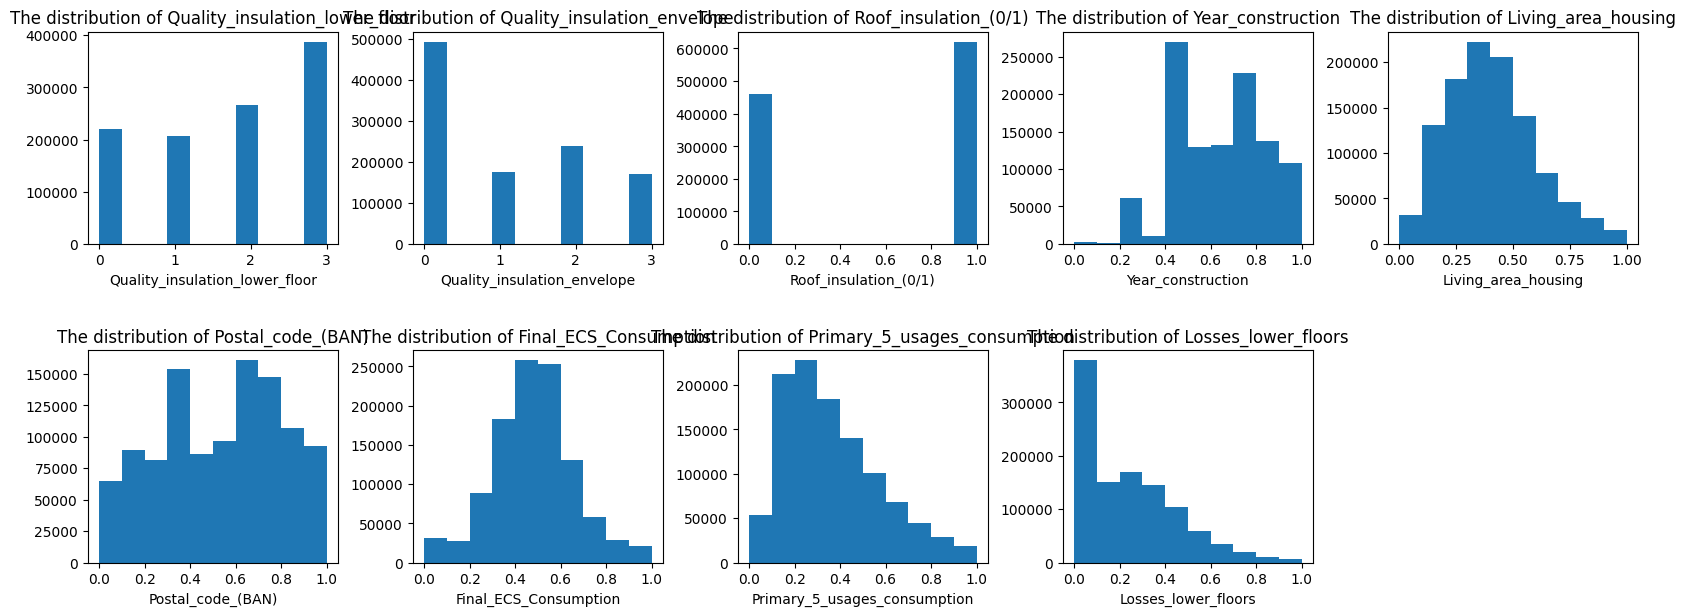

In [ ]:
check_columns = list(df_insulation_floor_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_floor_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

In [ ]:
df_insulation_floor_encoded_no_missing_values_outliers.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                    1.079877e+06                 1.079877e+06   
mean                     1.760968e+00                 1.081370e+00   
std                      1.142579e+00                 1.143351e+00   
min                      0.000000e+00                 0.000000e+00   
25%                      1.000000e+00                 0.000000e+00   
50%                      2.000000e+00                 1.000000e+00   
75%                      3.000000e+00                 2.000000e+00   
max                      3.000000e+00                 3.000000e+00   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count           1.079877e+06       1.079877e+06         1.079877e+06   
mean            5.750303e-01       6.457388e-01         4.064533e-01   
std             4.943386e-01       2.019234e-01         1.929734e-01   
min             0.000000e+00       0.000000e+00         0.000000e+00   
25%             0.000000e+00       4.666667e-01         2.618629e-01   
50%             1.000000e+00       6.666667e-01         3.889865e-01   
75%             1.000000e+00       8.000000e-01         5.213825e-01   
max             1.000000e+00       1.000000e+00         1.000000e+00   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count       1.079877e+06           1.079877e+06                  1.079877e+06   
mean        5.305602e-01           4.811101e-01                  3.657697e-01   
std         2.696480e-01           1.785805e-01                  2.085991e-01   
min         0.000000e+00           0.000000e+00                  0.000000e+00   
25%         3.125000e-01           3.725208e-01                  2.018909e-01   
50%         5.729167e-01           4.826223e-01                  3.228568e-01   
75%         7.708333e-01           5.842290e-01                  4.929453e-01   
max         1.000000e+00           1.000000e+00                  1.000000e+00   

       Losses_lower_floors  
count         1.079877e+06  
mean          2.330467e-01  
std           2.193664e-01  
min           0.000000e+00  
25%           0.000000e+00  
50%           2.044506e-01  
75%           3.755216e-01  
max           1.000000e+00

<Axes: title={'center': 'Spearman Correlation of Features'}>

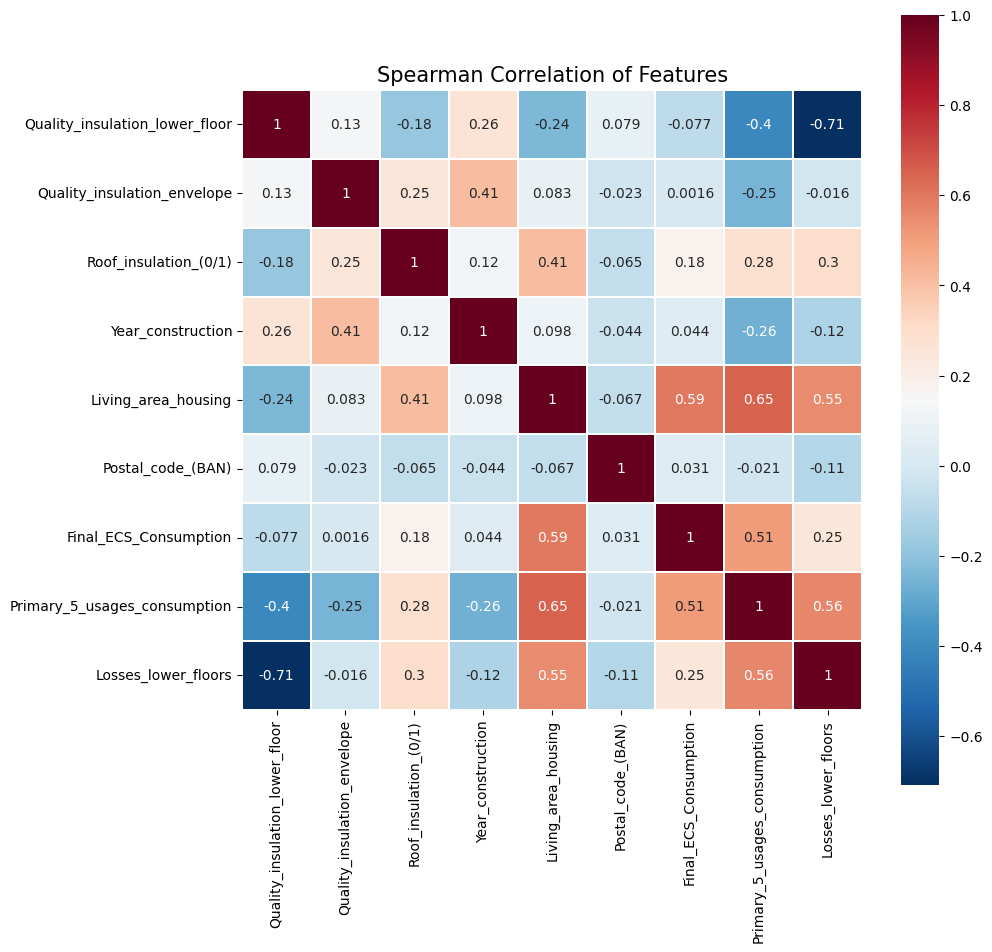

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_floor_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Quality_insulation_walls data

In [ ]:
df_insulation_walls = df_DPE_dataset[['Quality_insulation_walls',
                    'Quality_insulation_envelope',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    'Losses_walls',
                    ]]

In [ ]:
df_insulation_walls

Quality_insulation_walls Quality_insulation_envelope  \
0                   insuffisante                insuffisante   
1                   insuffisante                insuffisante   
2                   insuffisante                insuffisante   
3                   insuffisante                insuffisante   
4                   insuffisante                insuffisante   
...                          ...                         ...   
4277638             insuffisante                  très bonne   
4277639             insuffisante                insuffisante   
4277640             insuffisante                insuffisante   
4277641               très bonne                       bonne   
4277642             insuffisante                insuffisante   

         Year_construction  Living_area_housing  Postal_code_(BAN)  \
0                   1945.0                220.8            25000.0   
1                   1948.0                 70.6            13016.0   
2                   1948.0                109.0            93100.0   
3                   1976.0                 47.5            44800.0   
4                   1948.0                 36.4            92330.0   
...                    ...                  ...                ...   
4277638             2013.0                 46.4            44240.0   
4277639             1960.0                 59.0            25000.0   
4277640             1945.0                 70.0            44530.0   
4277641             2014.0                 49.7            51100.0   
4277642             1961.0                 70.0            91330.0   

         Final_ECS_Consumption  Primary_5_usages_consumption  Losses_walls  
0                       4463.6                       41345.2         191.0  
1                       4522.1                       15403.7         134.9  
2                       7035.3                       63792.5        5368.1  
3                       2576.8                        8334.7           NaN  
4                       1858.2                        8857.1          27.4  
...                        ...                           ...           ...  
4277638                 2486.1                        4365.9           4.3  
4277639                 2771.0                       18778.5        5110.1  
4277640                 1864.7                       36347.2          92.5  
4277641                 1205.3                        3842.7         208.9  
4277642                 2705.7                       14378.6          88.6  

[4277643 rows x 8 columns]

In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_walls)

The type of the features in insulation floor dataset: 

Quality_insulation_walls: object
Quality_insulation_envelope: object
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Losses_walls: float64


In [ ]:
missing_results = check_missing_values(df_insulation_walls)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                        feature  missing_ratio
0      Quality_insulation_walls   5.241204e-04
1             Year_construction   3.183333e-01
2           Living_area_housing   1.102546e-02
3             Postal_code_(BAN)   5.146526e-03
4         Final_ECS_Consumption   9.350944e-07
5  Primary_5_usages_consumption   1.077696e-04
6                  Losses_walls   8.809992e-03


In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_walls, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_walls, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_walls, 3)
print(missing_row_3)

1418284
26320
121


In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_walls_encoded = df_insulation_walls.replace(mapping)

In [ ]:
# Get data without missing values
df_insulation_walls_encoded_no_missing_values = df_insulation_walls_encoded.dropna()

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_walls_encoded_no_missing_values = process_postal_code(df_insulation_walls_encoded_no_missing_values)

<ipython-input-40-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-40-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-40-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_walls_encoded_no_missing_values = process_year(df_insulation_walls_encoded_no_missing_values)

<ipython-input-42-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_walls_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_walls',
                    ]] = scaler.fit_transform(df_insulation_walls_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_walls',
                    ]])

<ipython-input-44-5b0e7a0fcd5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_walls_encoded_no_missing_values[[


In [ ]:
df_insulation_walls_encoded_no_missing_values.describe()

Quality_insulation_walls  Quality_insulation_envelope  \
count              2.832918e+06                 2.832918e+06   
mean               8.102942e-01                 8.863373e-01   
std                1.049266e+00                 1.094617e+00   
min                0.000000e+00                 0.000000e+00   
25%                0.000000e+00                 0.000000e+00   
50%                0.000000e+00                 0.000000e+00   
75%                2.000000e+00                 2.000000e+00   
max                3.000000e+00                 3.000000e+00   

       Year_construction  Living_area_housing  Postal_code_(BAN)  \
count       2.832918e+06         2.832918e+06       2.832918e+06   
mean        1.096450e-15        -1.402880e-17       5.347243e+01   
std         1.000000e+00         1.000000e+00       2.688379e+01   
min        -2.405589e+01        -2.096563e-02       1.000000e+00   
25%        -7.200200e-01        -8.460661e-03       3.200000e+01   
50%        -8.932077e-02        -2.878084e-03       5.700000e+01   
75%         5.413785e-01         3.458140e-03       7.600000e+01   
max         4.010224e+00         1.682855e+03       9.700000e+01   

       Final_ECS_Consumption  Primary_5_usages_consumption  Losses_walls  
count           2.832918e+06                  2.832918e+06  2.832918e+06  
mean            7.579049e-18                 -2.028604e-17 -1.107606e-17  
std             1.000000e+00                  1.000000e+00  1.000000e+00  
min            -8.665989e-02                 -5.534569e-02 -2.518068e-01  
25%            -2.432184e-02                 -2.736861e-02 -2.357705e-01  
50%            -1.074823e-02                 -1.211413e-02 -2.123211e-01  
75%             5.307337e-03                  1.226605e-02 -1.409141e-01  
max             1.655765e+03                  1.361073e+03  4.031810e+01

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_walls',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_walls_encoded_no_missing_values_outliers = remove_outliers(df_insulation_walls_encoded_no_missing_values, test_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_walls_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_walls',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_walls_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_walls',
                    # 'Quality_insulation_envelope',
                    ]])


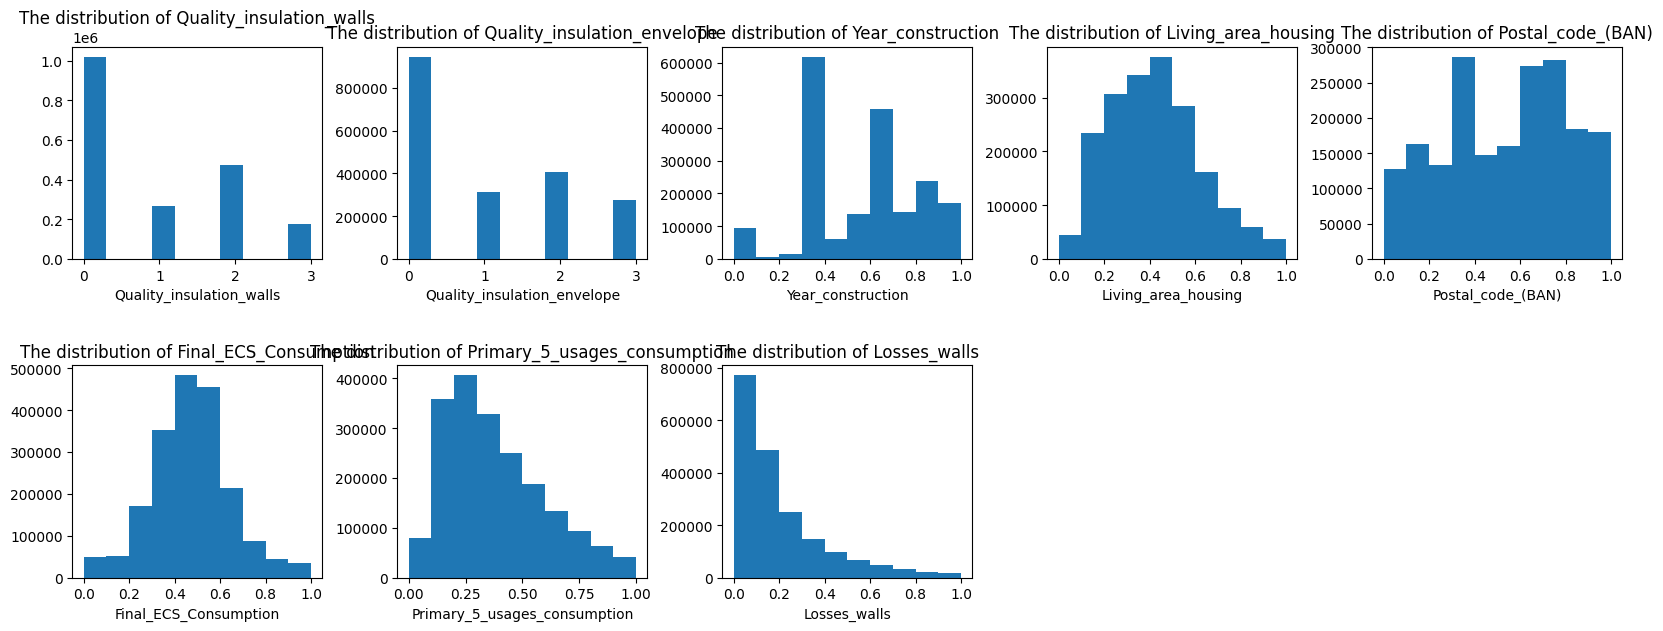

In [ ]:
check_columns = list(df_insulation_walls_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_walls_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

<Axes: title={'center': 'Spearman Correlation of Features'}>

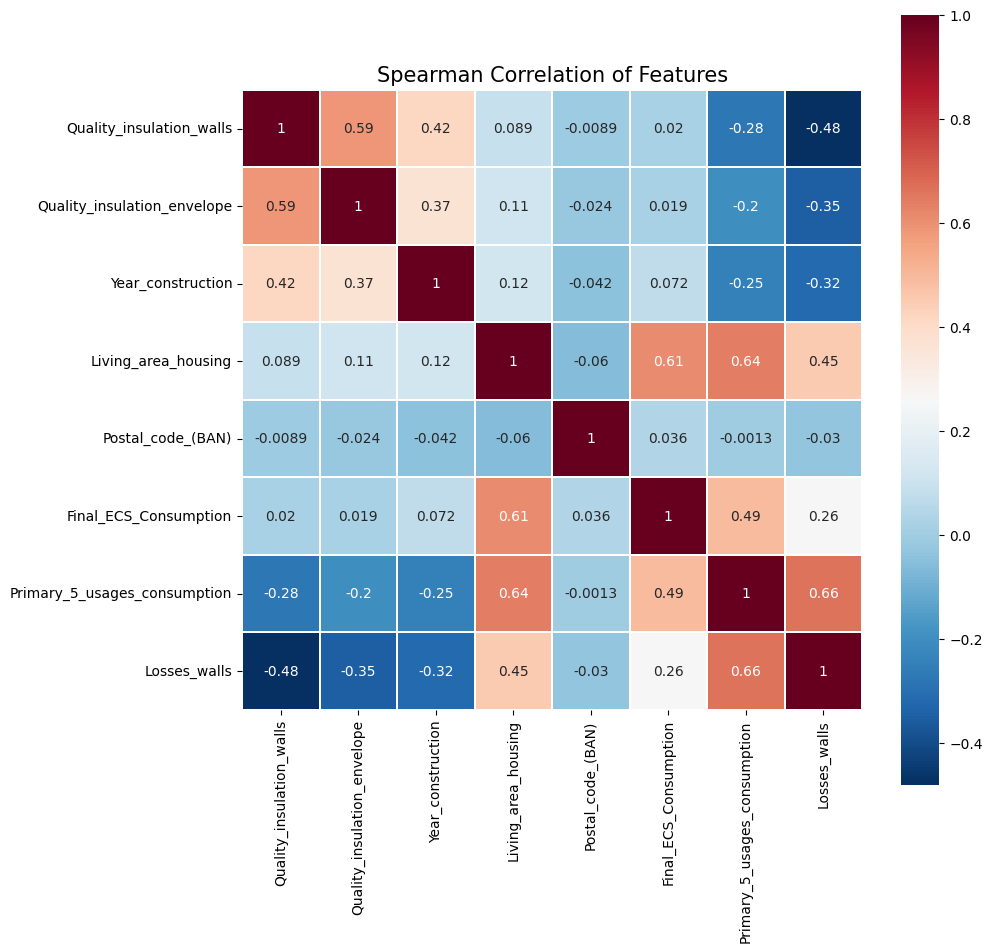

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_walls_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Quality_insulation_carpentry data

In [ ]:
df_insulation_carpentry = df_DPE_dataset[['Quality_insulation_carpentry',
                    'Quality_insulation_envelope',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    ]]

In [ ]:
df_insulation_carpentry

Quality_insulation_carpentry Quality_insulation_envelope  \
0                              bonne                insuffisante   
1                              bonne                insuffisante   
2                            moyenne                insuffisante   
3                            moyenne                insuffisante   
4                       insuffisante                insuffisante   
...                              ...                         ...   
4277638                   très bonne                  très bonne   
4277639                      moyenne                insuffisante   
4277640                 insuffisante                insuffisante   
4277641                   très bonne                       bonne   
4277642                   très bonne                insuffisante   

         Year_construction  Living_area_housing  Postal_code_(BAN)  \
0                   1945.0                220.8            25000.0   
1                   1948.0                 70.6            13016.0   
2                   1948.0                109.0            93100.0   
3                   1976.0                 47.5            44800.0   
4                   1948.0                 36.4            92330.0   
...                    ...                  ...                ...   
4277638             2013.0                 46.4            44240.0   
4277639             1960.0                 59.0            25000.0   
4277640             1945.0                 70.0            44530.0   
4277641             2014.0                 49.7            51100.0   
4277642             1961.0                 70.0            91330.0   

         Final_ECS_Consumption  Primary_5_usages_consumption  Losses_doors  \
0                       4463.6                       41345.2          15.0   
1                       4522.1                       15403.7           4.4   
2                       7035.3                       63792.5          66.1   
3                       2576.8                        8334.7           NaN   
4                       1858.2                        8857.1           0.0   
...                        ...                           ...           ...   
4277638                 2486.1                        4365.9           0.0   
4277639                 2771.0                       18778.5         285.6   
4277640                 1864.7                       36347.2          15.3   
4277641                 1205.3                        3842.7           4.3   
4277642                 2705.7                       14378.6           2.2   

         Losses_glazed_bays  
0                      91.3  
1                      16.1  
2                     764.5  
3                       NaN  
4                      40.2  
...                     ...  
4277638                 7.9  
4277639              2362.8  
4277640                35.5  
4277641               373.2  
4277642                22.4  

[4277643 rows x 9 columns]

In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_carpentry)

The type of the features in insulation floor dataset: 

Quality_insulation_carpentry: object
Quality_insulation_envelope: object
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64
Losses_doors: float64
Losses_glazed_bays: float64


In [ ]:
missing_results = check_missing_values(df_insulation_carpentry)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                        feature  missing_ratio
0             Year_construction   3.183333e-01
1           Living_area_housing   1.102546e-02
2             Postal_code_(BAN)   5.146526e-03
3         Final_ECS_Consumption   9.350944e-07
4  Primary_5_usages_consumption   1.077696e-04
5                  Losses_doors   9.063870e-03
6            Losses_glazed_bays   8.814667e-03


In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_carpentry, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_carpentry, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_carpentry, 3)
print(missing_row_3)

1380650
63288
201


In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_carpentry_encoded = df_insulation_carpentry.replace(mapping)

In [ ]:
# Get data without missing values
df_insulation_carpentry_encoded_no_missing_values = df_insulation_carpentry_encoded.dropna()

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to type float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_carpentry_encoded_no_missing_values = process_postal_code(df_insulation_carpentry_encoded_no_missing_values)

<ipython-input-59-bd64b1fd35f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-59-bd64b1fd35f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-59-bd64b1fd35f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_carpentry_encoded_no_missing_values = process_year(df_insulation_carpentry_encoded_no_missing_values)

<ipython-input-61-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_carpentry_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    ]] = scaler.fit_transform(df_insulation_carpentry_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    ]])

<ipython-input-63-9dc4de24a33d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_carpentry_encoded_no_missing_values[[


In [ ]:
df_insulation_carpentry_encoded_no_missing_values.describe()

Quality_insulation_carpentry  Quality_insulation_envelope  \
count                  2.833502e+06                 2.833502e+06   
mean                   1.251478e+00                 8.858130e-01   
std                    9.000759e-01                 1.094338e+00   
min                    0.000000e+00                 0.000000e+00   
25%                    1.000000e+00                 0.000000e+00   
50%                    1.000000e+00                 0.000000e+00   
75%                    2.000000e+00                 2.000000e+00   
max                    3.000000e+00                 3.000000e+00   

       Year_construction  Living_area_housing  Postal_code_(BAN)  \
count       2.833502e+06         2.833502e+06       2.833502e+06   
mean        1.597352e-15        -3.074377e-18       5.348769e+01   
std         1.000000e+00         1.000000e+00       2.688866e+01   
min        -2.405701e+01        -2.096635e-02       1.000000e+00   
25%        -7.198878e-01        -8.460086e-03       3.200000e+01   
50%        -8.915488e-02        -2.876933e-03       5.700000e+01   
75%         5.415781e-01         3.459944e-03       7.600000e+01   
max         4.010609e+00         1.683029e+03       9.700000e+01   

       Final_ECS_Consumption  Primary_5_usages_consumption  Losses_doors  \
count           2.833502e+06                  2.833502e+06  2.833502e+06   
mean           -7.043985e-17                 -2.160590e-17 -1.641808e-16   
std             1.000000e+00                  1.000000e+00  1.000000e+00   
min            -8.666467e-02                 -5.534284e-02 -2.774665e-01   
25%            -2.432809e-02                 -2.736959e-02 -2.605217e-01   
50%            -1.074912e-02                 -1.211352e-02 -1.965081e-01   
75%             5.308112e-03                  1.226535e-02 -9.295674e-02   
max             1.655937e+03                  1.361215e+03  2.459558e+01   

       Losses_glazed_bays  
count        2.833502e+06  
mean        -1.892171e-16  
std          1.000000e+00  
min         -2.728006e-01  
25%         -2.533548e-01  
50%         -2.393303e-01  
75%         -2.060956e-01  
max          1.285158e+02

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_carpentry_encoded_no_missing_values_outliers = remove_outliers(df_insulation_carpentry_encoded_no_missing_values, test_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_carpentry_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_carpentry_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    'Losses_doors',
                    'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]])


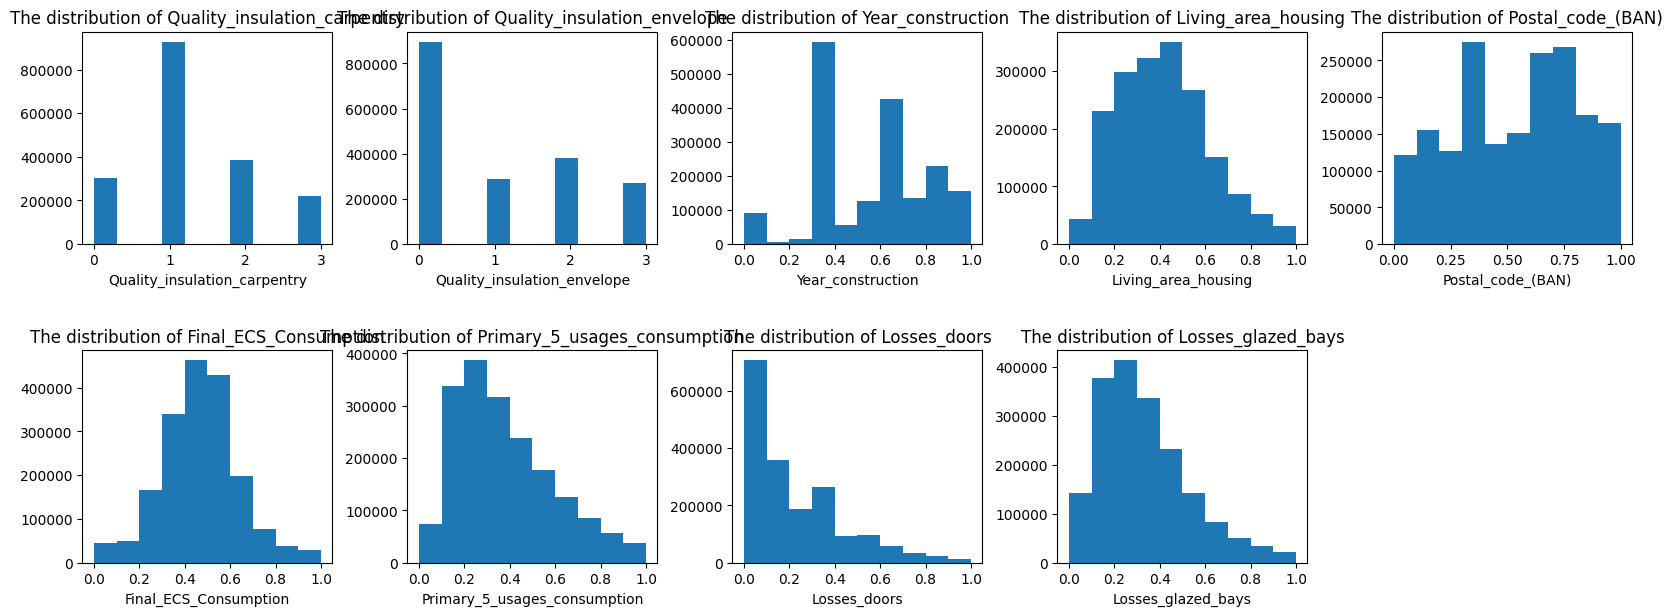

In [ ]:
check_columns = list(df_insulation_carpentry_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_carpentry_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

<Axes: title={'center': 'Spearman Correlation of Features'}>

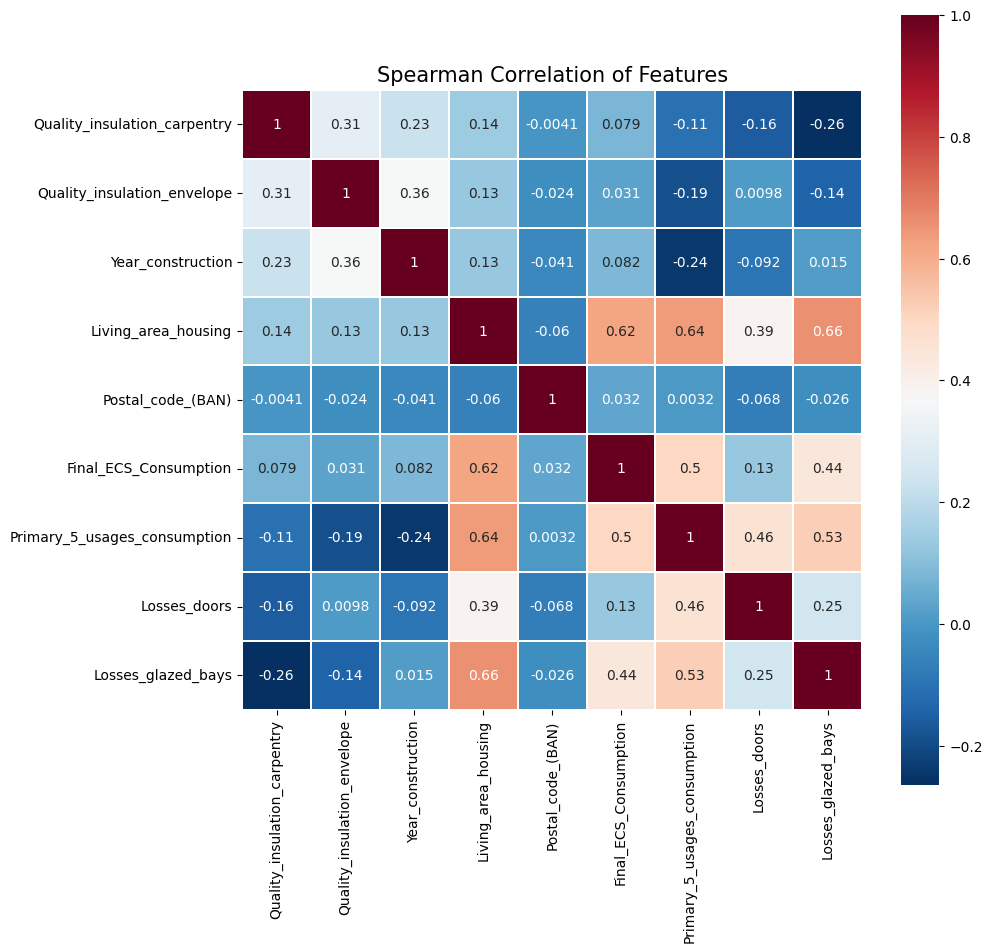

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_carpentry_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Quality_insulation_upper_floor_roof_terrace data

In [ ]:
df_insulation_roof = df_DPE_dataset[['Quality_insulation_upper_floor_roof_terrace',
                    'Quality_insulation_envelope',
                    # 'Quality_insulation_upper_floor_arranged_attic',
                    # 'Quality_insulation_upper_floor_lost_attic',
                    'Roof_insulation_(0/1)',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    ]]

In [ ]:
df_insulation_roof

Quality_insulation_upper_floor_roof_terrace  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
4277638                                  très bonne   
4277639                                         NaN   
4277640                                         NaN   
4277641                                         NaN   
4277642                                         NaN   

        Quality_insulation_envelope  Roof_insulation_(0/1)  Year_construction  \
0                      insuffisante                    0.0             1945.0   
1                      insuffisante                    NaN             1948.0   
2                      insuffisante                    NaN             1948.0   
3                      insuffisante                    NaN             1976.0   
4                      insuffisante                    NaN             1948.0   
...                             ...                    ...                ...   
4277638                  très bonne                    1.0             2013.0   
4277639                insuffisante                    NaN             1960.0   
4277640                insuffisante                    1.0             1945.0   
4277641                       bonne                    NaN             2014.0   
4277642                insuffisante                    0.0             1961.0   

         Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
0                      220.8            25000.0                 4463.6   
1                       70.6            13016.0                 4522.1   
2                      109.0            93100.0                 7035.3   
3                       47.5            44800.0                 2576.8   
4                       36.4            92330.0                 1858.2   
...                      ...                ...                    ...   
4277638                 46.4            44240.0                 2486.1   
4277639                 59.0            25000.0                 2771.0   
4277640                 70.0            44530.0                 1864.7   
4277641                 49.7            51100.0                 1205.3   
4277642                 70.0            91330.0                 2705.7   

         Primary_5_usages_consumption  
0                             41345.2  
1                             15403.7  
2                             63792.5  
3                              8334.7  
4                              8857.1  
...                               ...  
4277638                        4365.9  
4277639                       18778.5  
4277640                       36347.2  
4277641                        3842.7  
4277642                       14378.6  

[4277643 rows x 8 columns]

In [ ]:
print('The type of the features in insulation floor dataset: \n')
print_dtypes(df_insulation_roof)

The type of the features in insulation floor dataset: 

Quality_insulation_upper_floor_roof_terrace: object
Quality_insulation_envelope: object
Roof_insulation_(0/1): float64
Year_construction: float64
Living_area_housing: float64
Postal_code_(BAN): float64
Final_ECS_Consumption: float64
Primary_5_usages_consumption: float64


In [ ]:
missing_results = check_missing_values(df_insulation_roof)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                                       feature  missing_ratio
0  Quality_insulation_upper_floor_roof_terrace   8.391551e-01
1                        Roof_insulation_(0/1)   3.249902e-01
2                            Year_construction   3.183333e-01
3                          Living_area_housing   1.102546e-02
4                            Postal_code_(BAN)   5.146526e-03
5                        Final_ECS_Consumption   9.350944e-07
6                 Primary_5_usages_consumption   1.077696e-04


In [ ]:
def count_rows_with_n_nulls(df, n):
    null_counts = df.isnull().sum(axis=1)
    return (null_counts == n).sum()


In [ ]:
missing_row_1 = count_rows_with_n_nulls(df_insulation_roof, 1)
print(missing_row_1)

missing_row_2 = count_rows_with_n_nulls(df_insulation_roof, 2)
print(missing_row_2)

missing_row_3 = count_rows_with_n_nulls(df_insulation_roof, 3)
print(missing_row_3)

1806648
2123497
103033


In [ ]:
mapping = {'insuffisante': 0, 'moyenne': 1, 'bonne': 2, 'très bonne': 3}
df_insulation_roof_encoded = df_insulation_roof.replace(mapping)

In [ ]:
# Get data without missing values
df_insulation_roof_encoded_no_missing_values = df_insulation_roof_encoded.dropna()

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_insulation_roof_encoded_no_missing_values = process_postal_code(df_insulation_roof_encoded_no_missing_values)

<ipython-input-78-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-78-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-78-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_insulation_roof_encoded_no_missing_values = process_year(df_insulation_roof_encoded_no_missing_values)

<ipython-input-80-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_insulation_roof_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    ]] = scaler.fit_transform(df_insulation_roof_encoded_no_missing_values[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    ]])

<ipython-input-82-75a5146c8afc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insulation_roof_encoded_no_missing_values[[


In [ ]:
df_insulation_roof_encoded_no_missing_values.describe()

Quality_insulation_upper_floor_roof_terrace  \
count                                232369.000000   
mean                                      1.156419   
std                                       1.295134   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       3.000000   
max                                       3.000000   

       Quality_insulation_envelope  Roof_insulation_(0/1)  Year_construction  \
count                232369.000000          232369.000000       2.323690e+05   
mean                      1.000904               0.762869       2.994218e-15   
std                       1.105161               0.425324       1.000002e+00   
min                       0.000000               0.000000      -2.066553e+01   
25%                       0.000000               1.000000      -6.511387e-01   
50%                       1.000000               1.000000       1.602554e-01   
75%                       2.000000               1.000000       7.011849e-01   
max                       3.000000               1.000000       3.405832e+00   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count         2.323690e+05      232369.000000           2.323690e+05   
mean         -1.639298e-16          53.664353          -1.278169e-17   
std           1.000002e+00          27.061485           1.000002e+00   
min          -9.598579e-01           1.000000          -1.008298e+00   
25%          -3.804140e-01          33.000000          -2.881361e-01   
50%          -1.486364e-01          59.000000          -1.308710e-01   
75%           1.563341e-01          76.000000           8.654296e-02   
max           9.668560e+01          97.000000           2.254388e+02   

       Primary_5_usages_consumption  
count                  2.323690e+05  
mean                  -6.635471e-18  
std                    1.000002e+00  
min                   -3.021885e-02  
25%                   -1.664909e-02  
50%                   -8.809874e-03  
75%                    4.767742e-03  
max                    4.818430e+02

In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = [# 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]
df_insulation_roof_encoded_no_missing_values_outliers = remove_outliers(df_insulation_roof_encoded_no_missing_values, test_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_insulation_roof_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]] = scaler.fit_transform(df_insulation_roof_encoded_no_missing_values_outliers[[
                    # 'Quality_insulation_lower_floor',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Roof_insulation_(0/1)',
                    # 'Losses_doors',
                    # 'Losses_glazed_bays',
                    # 'Quality_insulation_envelope',
                    ]])


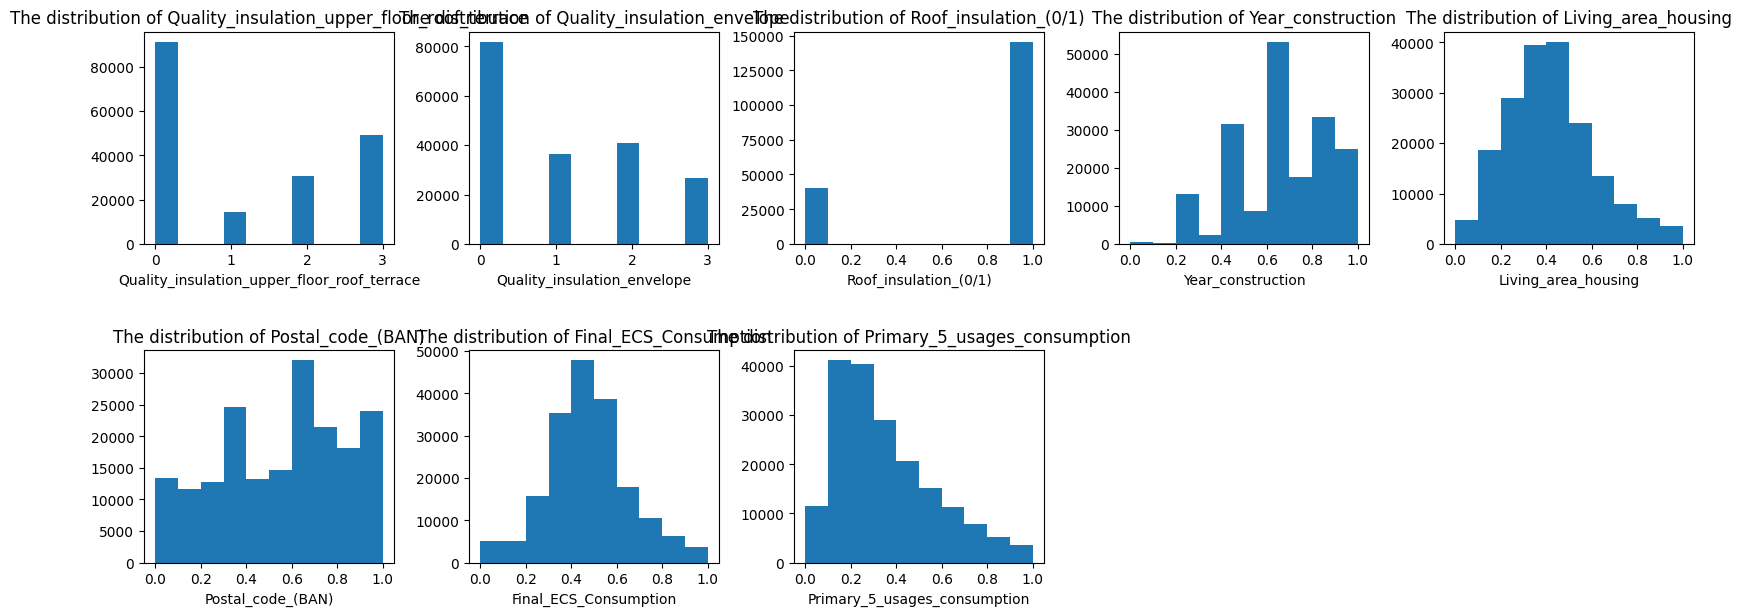

In [ ]:
check_columns = list(df_insulation_roof_encoded_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_insulation_roof_encoded_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

<Axes: title={'center': 'Spearman Correlation of Features'}>

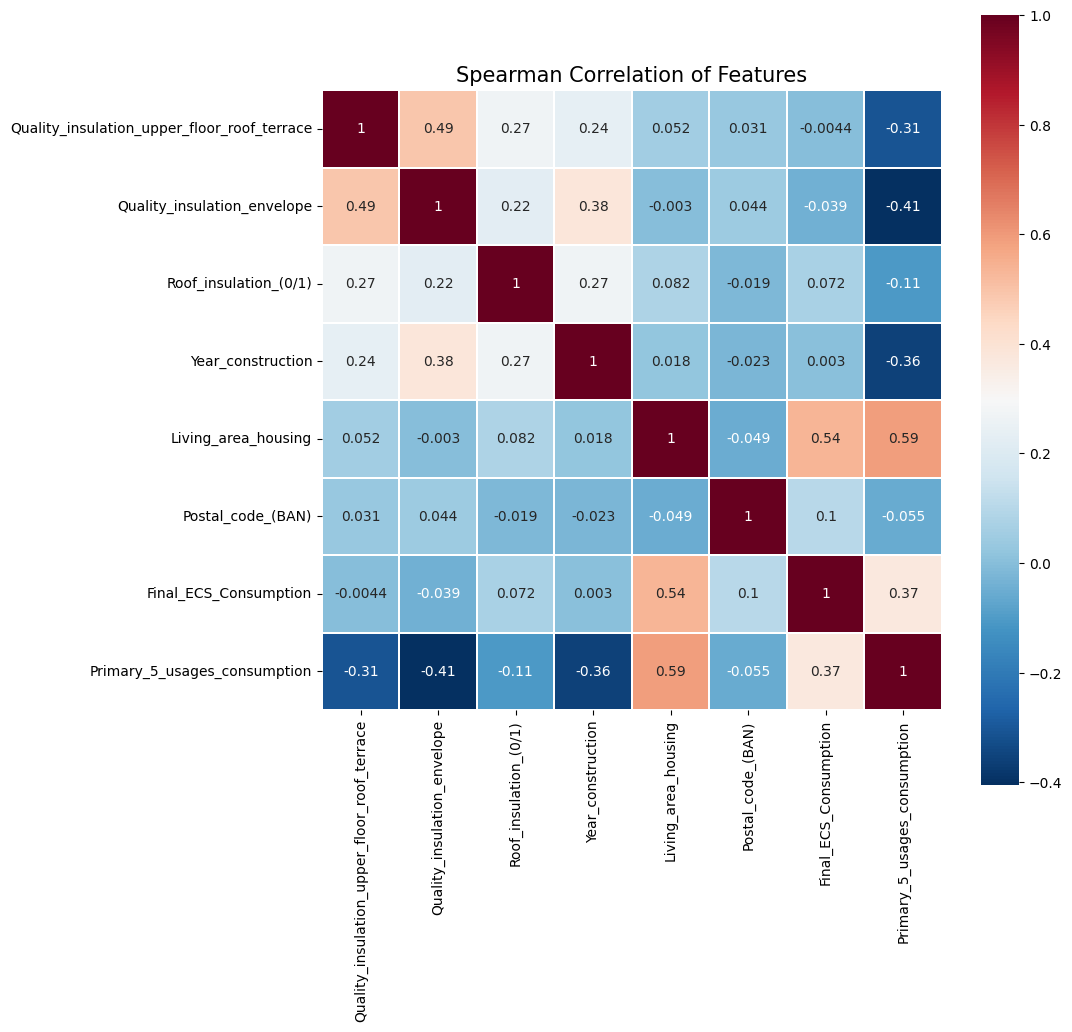

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_insulation_roof_encoded_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### ECS data


In [ ]:
df_ECS_consumption = df_DPE_dataset[['Primary_ECS_Consumption',
                    'Type_main_energy_ECS',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]]

In [ ]:
df_ECS_consumption

Primary_ECS_Consumption Type_main_energy_ECS  Year_construction  \
0                         6600.7          Gaz naturel             1945.0   
1                         4522.1          Gaz naturel             1948.0   
2                        22815.4          Électricité             1948.0   
3                         3633.3                  NaN             1976.0   
4                         1858.2          Gaz naturel             1948.0   
...                          ...                  ...                ...   
4277638                   2486.1          Gaz naturel             2013.0   
4277639                   3907.1          Gaz naturel             1960.0   
4277640                   4288.8          Électricité             1945.0   
4277641                   1699.5          Gaz naturel             2014.0   
4277642                   2705.7          Gaz naturel             1961.0   

         Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
0                      220.8            25000.0                 4463.6   
1                       70.6            13016.0                 4522.1   
2                      109.0            93100.0                 7035.3   
3                       47.5            44800.0                 2576.8   
4                       36.4            92330.0                 1858.2   
...                      ...                ...                    ...   
4277638                 46.4            44240.0                 2486.1   
4277639                 59.0            25000.0                 2771.0   
4277640                 70.0            44530.0                 1864.7   
4277641                 49.7            51100.0                 1205.3   
4277642                 70.0            91330.0                 2705.7   

         Primary_5_usages_consumption  Final_consumption_ECS_generator_no1  
0                             41345.2                               2819.6  
1                             15403.7                                  1.0  
2                             63792.5                               2440.2  
3                              8334.7                                  NaN  
4                              8857.1                                  1.0  
...                               ...                                  ...  
4277638                        4365.9                               2486.1  
4277639                       18778.5                             181757.6  
4277640                       36347.2                               1864.7  
4277641                        3842.7                              32182.9  
4277642                       14378.6                               2705.7  

[4277643 rows x 8 columns]

In [ ]:
unique_values = df_ECS_consumption['Type_main_energy_ECS'].unique()
unique_values

array(['Gaz naturel', 'Électricité', nan,
       'Bois – Granulés (pellets) ou briquettes', 'Fioul domestique',
       'Réseau de Chauffage urbain', 'GPL', 'Propane', 'Bois – Bûches',
       "Électricité d'origine renouvelable utilisée dans le bâtiment",
       'Bois – Plaquettes forestières', 'Bois – Plaquettes d’industrie',
       'Charbon', 'Butane', 'Réseau de Froid Urbain'], dtype=object)

In [ ]:
missing_results = check_missing_values(df_ECS_consumption)
df_missing_results = pd.DataFrame(columns=['feature', 'missing_ratio'])
df_missing_results['feature'] = missing_results.keys()
df_missing_results['missing_ratio'] = missing_results.values()
print('The information about missing values in insulation floor data: \n')
print(df_missing_results)

The information about missing values in insulation floor data: 

                               feature  missing_ratio
0              Primary_ECS_Consumption   9.350944e-07
1                 Type_main_energy_ECS   1.006024e-01
2                    Year_construction   3.183333e-01
3                  Living_area_housing   1.102546e-02
4                    Postal_code_(BAN)   5.146526e-03
5                Final_ECS_Consumption   9.350944e-07
6         Primary_5_usages_consumption   1.077696e-04
7  Final_consumption_ECS_generator_no1   1.006187e-01


In [ ]:
df_ECS_consumption['Type_main_energy_ECS'] = df_ECS_consumption['Type_main_energy_ECS'].replace({
    'Gaz naturel': 0, 'Fioul domestique': 0, 'GPL': 0, 'Propane': 0, 'Charbon': 0, 'Butane': 0,
    'Électricité': 1, "Électricité d'origine renouvelable utilisée dans le bâtiment": 1,
    'Bois – Granulés (pellets) ou briquettes': 2, 'Bois – Bûches': 2, 'Bois – Plaquettes forestières': 2, 'Bois – Plaquettes d’industrie': 2,
    'Réseau de Chauffage urbain': 3, 'Réseau de Froid Urbain': 3
})


<ipython-input-93-fefe2dabfef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ECS_consumption['Type_main_energy_ECS'] = df_ECS_consumption['Type_main_energy_ECS'].replace({


In [ ]:
# Get data without missing values
df_ECS_consumption_no_missing_values = df_ECS_consumption.dropna()

In [ ]:
def process_postal_code(df):
    # Convert the zip code column to a string, and use str.zfill() to complete five digits
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)

    # Create a new column to store the processed zip code
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')

    # Convert the new column to float
    df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: float(x) if x != 'NaN' else float('nan'))

    return df

In [ ]:
df_ECS_consumption_no_missing_values = process_postal_code(df_ECS_consumption_no_missing_values)

<ipython-input-95-977e4c42af8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].astype('Int64').astype(str).str.zfill(5)
<ipython-input-95-977e4c42af8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Postal_code_(BAN)'] = df['Postal_code_(BAN)'].apply(lambda x: x[:2] if x[:2].isdigit() else 'NaN')
<ipython-input-95-977e4c42af8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [ ]:
import math
# Define a function for rounding a year to the nearest 10
def round_to_nearest_decade(year):
    return math.floor(year / 10) * 10

def process_year(df):
    df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)
    return df


In [ ]:
df_ECS_consumption_no_missing_values = process_year(df_ECS_consumption_no_missing_values)

<ipython-input-97-95aec6f7b944>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_construction'] = df['Year_construction'].apply(round_to_nearest_decade)


In [ ]:
# Normalize numeric data
scaler = StandardScaler()
df_ECS_consumption_no_missing_values[['Primary_ECS_Consumption',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Type_main_energy_ECS',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]] = scaler.fit_transform(df_ECS_consumption_no_missing_values[[
                    'Primary_ECS_Consumption',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Type_main_energy_ECS',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]])

<ipython-input-99-e51dab1ed5d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ECS_consumption_no_missing_values[['Primary_ECS_Consumption',


In [ ]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [ ]:
test_columns = ['Primary_ECS_Consumption',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Type_main_energy_ECS',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]
df_ECS_consumption_no_missing_values_outliers = remove_outliers(df_ECS_consumption_no_missing_values, test_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_ECS_consumption_no_missing_values_outliers[[
                    'Primary_ECS_Consumption',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Type_main_energy_ECS',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]] = scaler.fit_transform(df_ECS_consumption_no_missing_values_outliers[[
                    'Primary_ECS_Consumption',
                    'Year_construction',
                    # 'Living_area_building',
                    'Living_area_housing',
                    # 'Postal_code_(BAN)',
                    'Final_ECS_Consumption',
                    'Primary_5_usages_consumption',
                    # 'Type_main_energy_ECS',
                    'Final_consumption_ECS_generator_no1',
                    # 'Final_consumption_ECS_generator_no2',
                    ]])


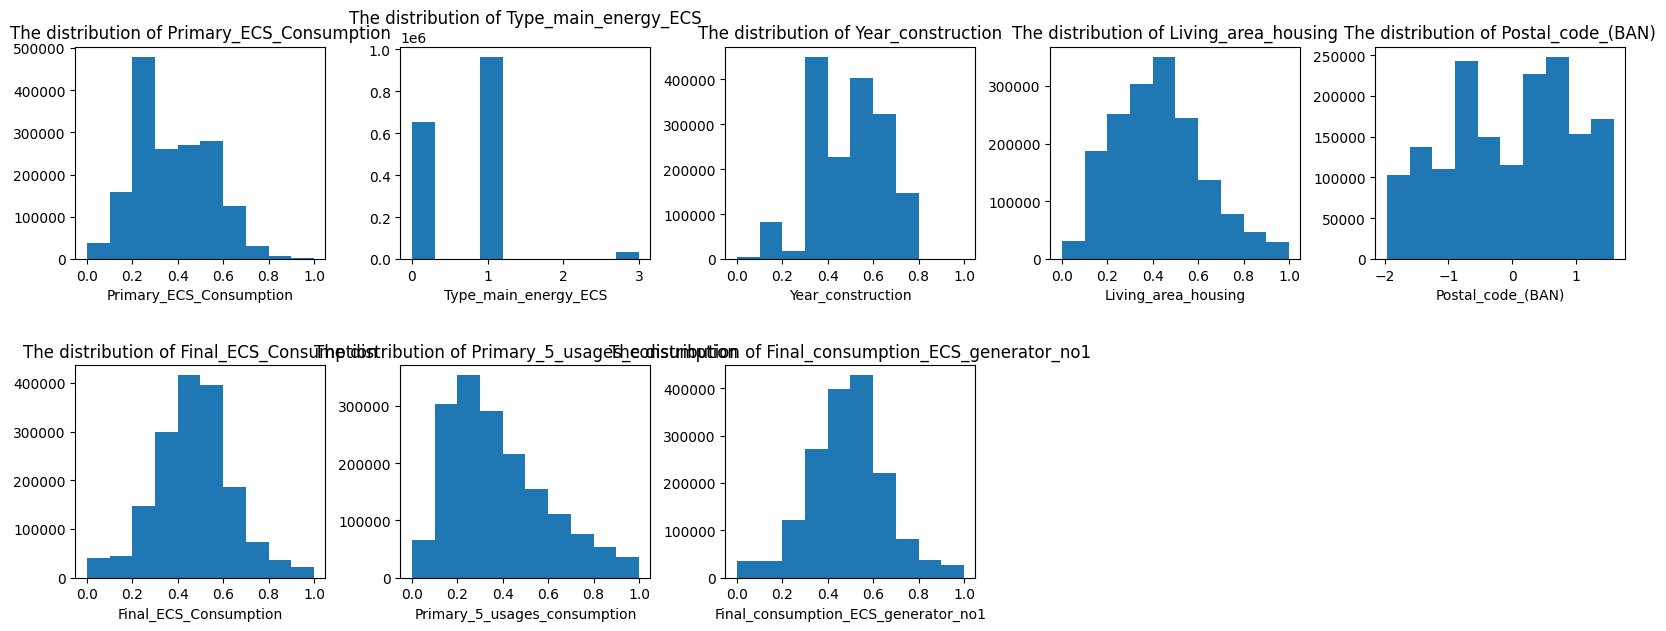

In [ ]:
check_columns = list(df_ECS_consumption_no_missing_values_outliers.columns.values)
# check_class_balance(df_diabetic_data, check_columns)

plt.figure(figsize = (20, 40))
i = 1
column = check_columns

# plot the distributions
for col in column:
    plt.subplot(10, 5, i)
    plt.title('The distribution of {}'.format(col))
    plt.xlabel('{}'.format(col))
    # plt.ylabel('Count')
    plt.hist(df_ECS_consumption_no_missing_values_outliers[col])
    i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

In [ ]:
df_ECS_consumption_no_missing_values_outliers.describe()

Primary_ECS_Consumption  Type_main_energy_ECS  Year_construction  \
count             1.657443e+06          1.657443e+06       1.657443e+06   
mean              3.771526e-01          6.463106e-01       5.017682e-01   
std               1.675464e-01          5.954056e-01       1.543323e-01   
min               0.000000e+00          0.000000e+00       0.000000e+00   
25%               2.363253e-01          0.000000e+00       3.684211e-01   
50%               3.612569e-01          1.000000e+00       5.263158e-01   
75%               5.112185e-01          1.000000e+00       6.315789e-01   
max               1.000000e+00          3.000000e+00       1.000000e+00   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count         1.657443e+06       1.657443e+06           1.657443e+06   
mean          4.249886e-01      -4.759844e-02           4.706922e-01   
std           1.947503e-01       9.811678e-01           1.680267e-01   
min           0.000000e+00      -1.965726e+00           0.000000e+00   
25%           2.834008e-01      -8.514078e-01           3.670536e-01   
50%           4.149798e-01       7.719066e-02           4.730790e-01   
75%           5.445344e-01       7.829255e-01           5.698913e-01   
max           1.000000e+00       1.600092e+00           1.000000e+00   

       Primary_5_usages_consumption  Final_consumption_ECS_generator_no1  
count                  1.657443e+06                         1.657443e+06  
mean                   3.793873e-01                         4.885121e-01  
std                    2.132077e-01                         1.666565e-01  
min                    0.000000e+00                         0.000000e+00  
25%                    2.127863e-01                         3.851863e-01  
50%                    3.337101e-01                         4.919691e-01  
75%                    5.090691e-01                         5.871949e-01  
max                    1.000000e+00                         1.000000e+00

<Axes: title={'center': 'Spearman Correlation of Features'}>

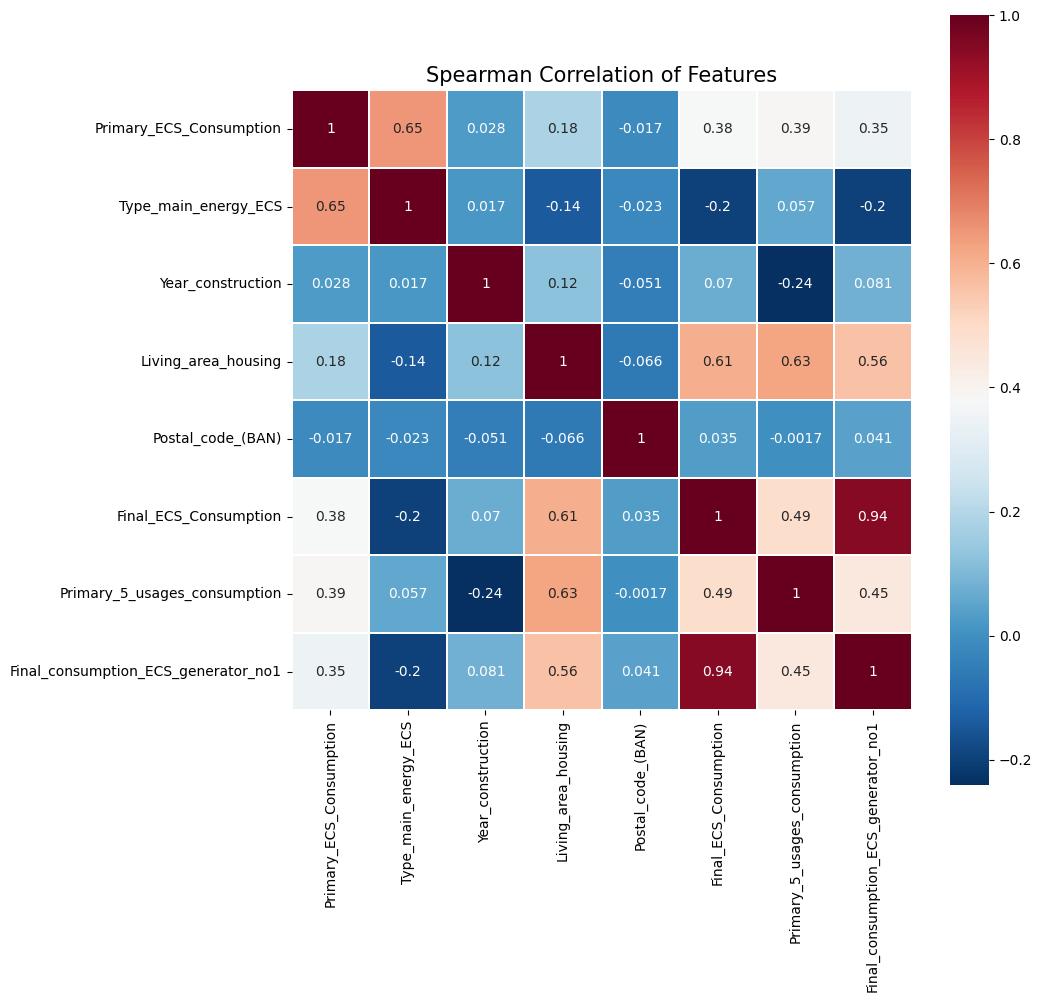

In [ ]:
plt.figure(figsize = (10, 10))
plt.title('Spearman Correlation of Features', size = 15)
sns.heatmap(df_ECS_consumption_no_missing_values_outliers.astype(float).corr(method = 'spearman'), linewidths = 0.1, vmax = 1.0, square = True, cmap = 'RdBu_r', linecolor = 'white', annot = True)

### Plot functions

In [ ]:
def count_and_plot_completed_data(completed_data_numpy):
    '''
    Func:
        Count and plot the frequency of each value before imputation
    Input:
        df : Dataframe, no missing values.(Train set)
    Output:
        No Return

    '''
    # Count unique values in numpy array
    values, counts = np.unique(completed_data_numpy, return_counts = True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize = (10, 5))
    bars = plt.bar(values, counts, color = 'blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in completed data')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, round(percentage, 2), ha = 'center', va = 'bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(missing_data_numpy, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputated data.
    Input:
        df : Dataframe, imputated data.
        mask : The position of the missing value in the array.
    Output:
        No Return

    '''
    # Apply mask to numpy array
    masked_data = missing_data_numpy[mask]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title('Count of unique values in masked numpy array')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


In [ ]:
def count_and_plot_missing_data(df, column_name, mask):
    '''
    Func:
        Count and plot the frequency of each value in imputed data.
    Input:
        df : Dataframe, imputed data.
        mask : The position of the missing value in the array.
        column_name : String, the name of the column to be plotted.
    Output:
        No Return

    '''
    # Get the column index
    column_index = df.columns.get_loc(column_name)

    # Apply mask to the specific column in the numpy array
    masked_data = df.values[mask, column_index]

    # Count unique values in numpy array
    values, counts = np.unique(masked_data, return_counts=True)

    # Calculate frequencies
    frequencies = counts / counts.sum()
    percentages = 100 * frequencies

    # Create bar plot
    plt.figure(figsize=(10,5))
    bars = plt.bar(values, counts, color='blue')

    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.title(f'Count of unique values in masked numpy array for {column_name}')

    # Add percentage on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(percentage, 2), ha='center', va='bottom')

    plt.show()


# Traditional DAE for floor

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
dae_dataset

Quality_insulation_lower_floor  Quality_insulation_envelope  \
11                                  1.0                            1   
14                                  1.0                            2   
17                                  2.0                            2   
20                                  2.0                            1   
25                                  1.0                            0   
...                                 ...                          ...   
4277629                             2.0                            3   
4277630                             3.0                            2   
4277638                             3.0                            3   
4277640                             1.0                            0   
4277642                             3.0                            0   

         Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
11                         1.0           0.733333             0.615114   
14                         1.0           0.733333             0.258934   
17                         0.0           0.866667             0.281195   
20                         1.0           0.533333             0.612185   
25                         0.0           0.466667             0.568248   
...                        ...                ...                  ...   
4277629                    1.0           0.866667             0.497950   
4277630                    1.0           0.933333             0.560633   
4277638                    1.0           0.933333             0.254247   
4277640                    1.0           0.466667             0.392501   
4277642                    0.0           0.600000             0.392501   

         Postal_code_(BAN)  Final_ECS_Consumption  \
11                0.270833               0.738652   
14                0.604167               0.272281   
17                0.343750               0.335808   
20                0.500000               0.037304   
25                0.604167               0.565392   
...                    ...                    ...   
4277629           0.854167               0.305300   
4277630           0.333333               0.607608   
4277638           0.447917               0.707073   
4277640           0.447917               0.477562   
4277642           0.937500               0.788181   

         Primary_5_usages_consumption  Losses_lower_floors  
11                           0.675537             0.456189  
14                           0.290914             0.403338  
17                           0.174100             0.183588  
20                           0.208831             0.279555  
25                           0.432806             0.456189  
...                               ...                  ...  
4277629                      0.152913             0.418637  
4277630                      0.333908             0.133519  
4277638                      0.080797             0.000000  
4277640                      0.881146             0.554937  
4277642                      0.331370             0.000000  

[1079877 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.2829223871231079
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.22692279517650604
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.22251825034618378
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2205297350883484
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.21914678812026978
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2188439667224884
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.21828323602676392
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.21764813363552094
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2156134843826294
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21460537612438202
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.21390655636787415
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.21340766549110413
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2130441665649414
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.21287107467651367
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.21256422996520996
Noise Epoch 1/1, Iterati

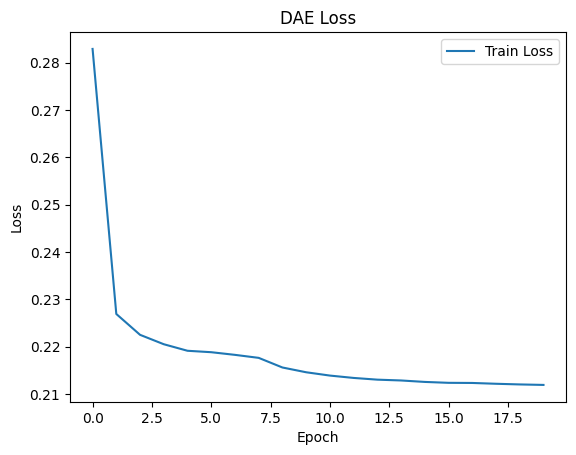

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.65629977, shape=(), dtype=float32)
Loss: tf.Tensor(0.3249616, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.50567114, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6090455, shape=(), dtype=float32)
Loss: tf.Tensor(0.31253037, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.53730446, shape=(), dtype=float32)


# Traditional DAE for floor 20%loss rate in train set

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
dae_dataset

Quality_insulation_lower_floor  Quality_insulation_envelope  \
11                                  1.0                            1   
14                                  1.0                            2   
17                                  2.0                            2   
20                                  2.0                            1   
25                                  1.0                            0   
...                                 ...                          ...   
4277629                             2.0                            3   
4277630                             3.0                            2   
4277638                             3.0                            3   
4277640                             1.0                            0   
4277642                             3.0                            0   

         Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
11                         1.0           0.733333             0.615114   
14                         1.0           0.733333             0.258934   
17                         0.0           0.866667             0.281195   
20                         1.0           0.533333             0.612185   
25                         0.0           0.466667             0.568248   
...                        ...                ...                  ...   
4277629                    1.0           0.866667             0.497950   
4277630                    1.0           0.933333             0.560633   
4277638                    1.0           0.933333             0.254247   
4277640                    1.0           0.466667             0.392501   
4277642                    0.0           0.600000             0.392501   

         Postal_code_(BAN)  Final_ECS_Consumption  \
11                0.270833               0.738652   
14                0.604167               0.272281   
17                0.343750               0.335808   
20                0.500000               0.037304   
25                0.604167               0.565392   
...                    ...                    ...   
4277629           0.854167               0.305300   
4277630           0.333333               0.607608   
4277638           0.447917               0.707073   
4277640           0.447917               0.477562   
4277642           0.937500               0.788181   

         Primary_5_usages_consumption  Losses_lower_floors  
11                           0.675537             0.456189  
14                           0.290914             0.403338  
17                           0.174100             0.183588  
20                           0.208831             0.279555  
25                           0.432806             0.456189  
...                               ...                  ...  
4277629                      0.152913             0.418637  
4277630                      0.333908             0.133519  
4277638                      0.080797             0.000000  
4277640                      0.881146             0.554937  
4277642                      0.331370             0.000000  

[1079877 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.2690107524394989
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.20418599247932434
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.1996212601661682
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.19785213470458984
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.19667211174964905
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.19581764936447144
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.19519974291324615
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1948482096195221
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.1943882703781128
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.19399471580982208
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.19296696782112122
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.19172248244285583
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.19063828885555267
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.18976402282714844
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.18933579325675964
Noise Epoch 1/1, Iterat

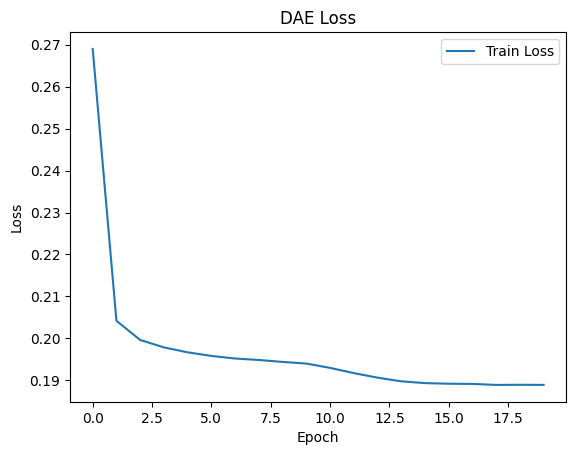

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.80       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8664915, shape=(), dtype=float32)
Loss: tf.Tensor(0.34854296, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.32790178, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8377329, shape=(), dtype=float32)
Loss: tf.Tensor(0.34143123, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.32985792, shape=(), dtype=float32)


# Traditional DAE for floor 40%loss rate in train set

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
dae_dataset

Quality_insulation_lower_floor  Quality_insulation_envelope  \
11                                  1.0                            1   
14                                  1.0                            2   
17                                  2.0                            2   
20                                  2.0                            1   
25                                  1.0                            0   
...                                 ...                          ...   
4277629                             2.0                            3   
4277630                             3.0                            2   
4277638                             3.0                            3   
4277640                             1.0                            0   
4277642                             3.0                            0   

         Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
11                         1.0           0.733333             0.615114   
14                         1.0           0.733333             0.258934   
17                         0.0           0.866667             0.281195   
20                         1.0           0.533333             0.612185   
25                         0.0           0.466667             0.568248   
...                        ...                ...                  ...   
4277629                    1.0           0.866667             0.497950   
4277630                    1.0           0.933333             0.560633   
4277638                    1.0           0.933333             0.254247   
4277640                    1.0           0.466667             0.392501   
4277642                    0.0           0.600000             0.392501   

         Postal_code_(BAN)  Final_ECS_Consumption  \
11                0.270833               0.738652   
14                0.604167               0.272281   
17                0.343750               0.335808   
20                0.500000               0.037304   
25                0.604167               0.565392   
...                    ...                    ...   
4277629           0.854167               0.305300   
4277630           0.333333               0.607608   
4277638           0.447917               0.707073   
4277640           0.447917               0.477562   
4277642           0.937500               0.788181   

         Primary_5_usages_consumption  Losses_lower_floors  
11                           0.675537             0.456189  
14                           0.290914             0.403338  
17                           0.174100             0.183588  
20                           0.208831             0.279555  
25                           0.432806             0.456189  
...                               ...                  ...  
4277629                      0.152913             0.418637  
4277630                      0.333908             0.133519  
4277638                      0.080797             0.000000  
4277640                      0.881146             0.554937  
4277642                      0.331370             0.000000  

[1079877 rows x 9 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.32905313372612
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.2501048445701599
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.245202898979187
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.24237388372421265
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.24026231467723846
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2379164695739746
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23620916903018951
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.23512649536132812
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.23417045176029205
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2335752248764038
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.23293495178222656
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.23234322667121887
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22996388375759125
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22848542034626007
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22789141535758972
Noise Epoch 1/1, Iteration 

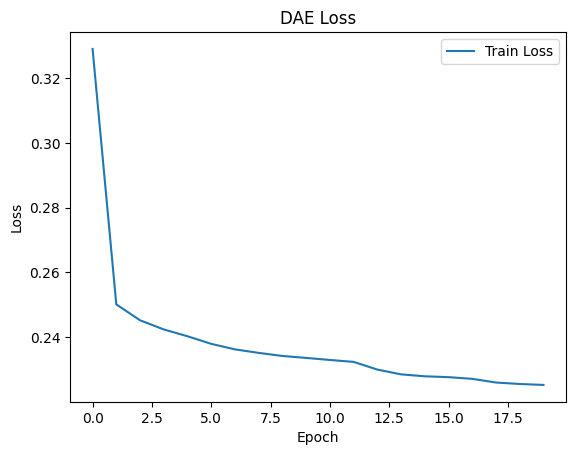

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.60       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6993805, shape=(), dtype=float32)
Loss: tf.Tensor(0.3222498, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.50226444, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6716222, shape=(), dtype=float32)
Loss: tf.Tensor(0.31667852, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.536146, shape=(), dtype=float32)


# Traditional DAE for walls

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.2517344057559967
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.2238369882106781
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.21036548912525177
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.202455073595047
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.19671845436096191
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.19440752267837524
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.19364574551582336
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.19330821931362152
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.1930234581232071
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.19285252690315247
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.192687526345253
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.1925710290670395
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.19252027571201324
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.19240351021289825
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.1923145353794098
Noise Epoch 1/1, Iteration 1

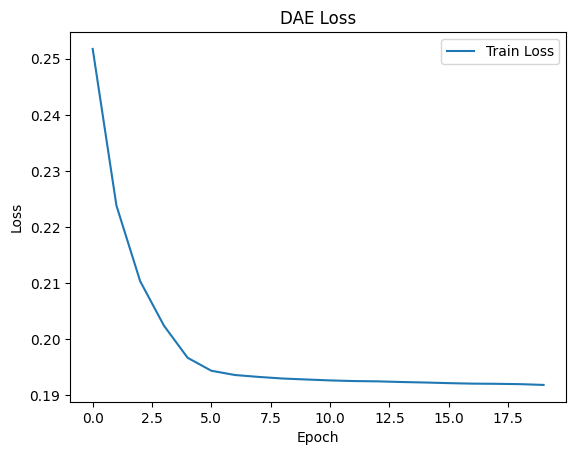

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result_walls.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6149363, shape=(), dtype=float32)
Loss: tf.Tensor(0.28379735, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56755084, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5995553, shape=(), dtype=float32)
Loss: tf.Tensor(0.27763715, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5755654, shape=(), dtype=float32)


# Traditional DAE for carpentry

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.23092973232269287
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.20742717385292053
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2062339335680008
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.20571483671665192
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.20273417234420776
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.18775542080402374
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.18668991327285767
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.18642650544643402
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.18606476485729218
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.18587635457515717
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.18574775755405426
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.18563251197338104
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.18565800786018372
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.1855727583169937
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.18553370237350464
Noise Epoch 1/1, Iter

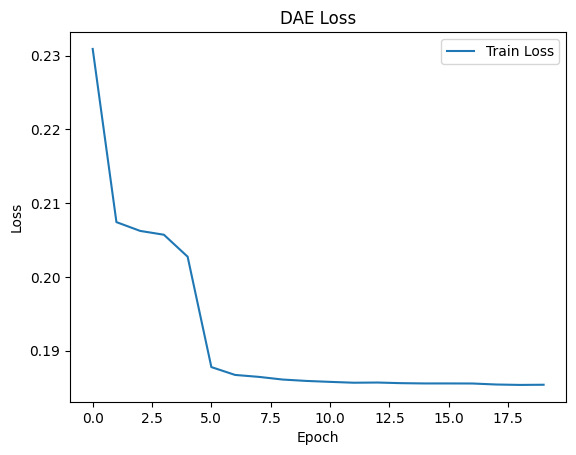

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result_carpentry.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.62019396, shape=(), dtype=float32)
Loss: tf.Tensor(0.27021667, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5060684, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.62289065, shape=(), dtype=float32)
Loss: tf.Tensor(0.26596358, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5053331, shape=(), dtype=float32)


# Traditional DAE for upper_floor_roof_terrace

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.4078138470649719
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.28419795632362366
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2719763517379761
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.26413941383361816
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2514151632785797
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23873257637023926
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23128479719161987
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.22961612045764923
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2283296287059784
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.22800208628177643
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.22719062864780426
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.2267221361398697
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22657091915607452
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2264157235622406
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22615006566047668
Noise Epoch 1/1, Iteratio

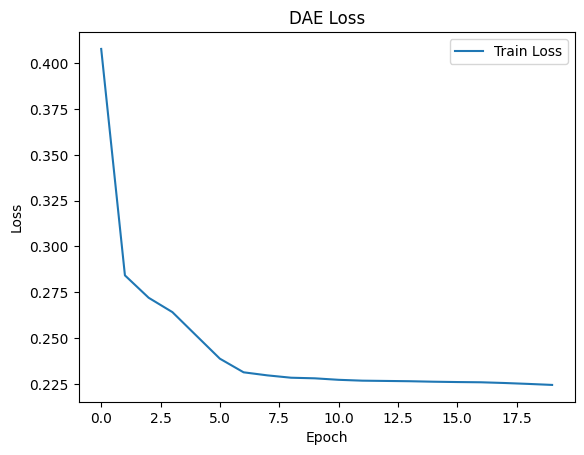

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8425143, shape=(), dtype=float32)
Loss: tf.Tensor(0.33136135, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.46148676, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8603966, shape=(), dtype=float32)
Loss: tf.Tensor(0.33119264, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.46489614, shape=(), dtype=float32)


# Traditional DAE for ECS

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.22702692449092865
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.19665417075157166
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.1940733641386032
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1927998661994934
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.19202080368995667
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.19162215292453766
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.1912563145160675
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.19090460240840912
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.1907566785812378
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.19063431024551392
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.1905761957168579
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.19046106934547424
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.19041581451892853
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.1903962939977646
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.1903078407049179
Noise Epoch 1/1, Iteration

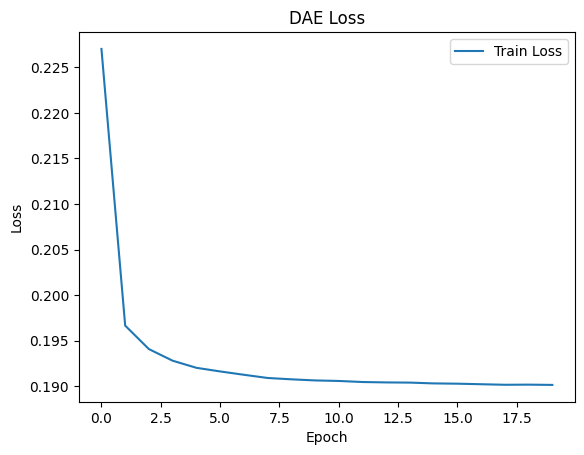

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/dae_result_ECS.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.06980219, shape=(), dtype=float32)
Loss: tf.Tensor(0.20330647, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.47840768, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_traditional_dae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.056292806, shape=(), dtype=float32)
Loss: tf.Tensor(0.19277255, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5385427, shape=(), dtype=float32)


# Experiments on the depth and number of nodes of DAE

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

### 2d latent space

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE2_2(tf.keras.Model):
    def __init__(self, original_dim,  name="dae2_2", **kwargs):
        super(DAE2_2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE2_3(tf.keras.Model):
    def __init__(self, original_dim,  name="dae2_3", **kwargs):
        super(DAE2_3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE2_4(tf.keras.Model):
    def __init__(self, original_dim,  name="dae2_4", **kwargs):
        super(DAE2_4, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE2_5(tf.keras.Model):
    def __init__(self, original_dim,  name="dae2_5", **kwargs):
        super(DAE2_5, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE2_6(tf.keras.Model):
    def __init__(self, original_dim,  name="dae2_6", **kwargs):
        super(DAE2_6, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(2, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


### 3d latent space

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE3_2(tf.keras.Model):
    def __init__(self, original_dim,  name="dae3_2", **kwargs):
        super(DAE3_2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE3_3(tf.keras.Model):
    def __init__(self, original_dim,  name="dae3_3", **kwargs):
        super(DAE3_3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE3_4(tf.keras.Model):
    def __init__(self, original_dim,  name="dae3_4", **kwargs):
        super(DAE3_4, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE3_5(tf.keras.Model):
    def __init__(self, original_dim,  name="dae3_5", **kwargs):
        super(DAE3_5, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE3_6(tf.keras.Model):
    def __init__(self, original_dim,  name="dae3_6", **kwargs):
        super(DAE3_6, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(3, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


### 4d latent space

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE4_2(tf.keras.Model):
    def __init__(self, original_dim,  name="dae4_2", **kwargs):
        super(DAE4_2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE4_3(tf.keras.Model):
    def __init__(self, original_dim,  name="dae4_3", **kwargs):
        super(DAE4_3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE4_4(tf.keras.Model):
    def __init__(self, original_dim,  name="dae4_4", **kwargs):
        super(DAE4_4, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE4_5(tf.keras.Model):
    def __init__(self, original_dim,  name="dae4_5", **kwargs):
        super(DAE4_5, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE4_6(tf.keras.Model):
    def __init__(self, original_dim,  name="dae4_6", **kwargs):
        super(DAE4_6, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),

        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


### shared code

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
dae_dataset

Quality_insulation_lower_floor  Quality_insulation_envelope  \
11                                  1.0                            1   
14                                  1.0                            2   
17                                  2.0                            2   
20                                  2.0                            1   
25                                  1.0                            0   
...                                 ...                          ...   
4277629                             2.0                            3   
4277630                             3.0                            2   
4277638                             3.0                            3   
4277640                             1.0                            0   
4277642                             3.0                            0   

         Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
11                         1.0           0.733333             0.615114   
14                         1.0           0.733333             0.258934   
17                         0.0           0.866667             0.281195   
20                         1.0           0.533333             0.612185   
25                         0.0           0.466667             0.568248   
...                        ...                ...                  ...   
4277629                    1.0           0.866667             0.497950   
4277630                    1.0           0.933333             0.560633   
4277638                    1.0           0.933333             0.254247   
4277640                    1.0           0.466667             0.392501   
4277642                    0.0           0.600000             0.392501   

         Postal_code_(BAN)  Final_ECS_Consumption  \
11                0.270833               0.738652   
14                0.604167               0.272281   
17                0.343750               0.335808   
20                0.500000               0.037304   
25                0.604167               0.565392   
...                    ...                    ...   
4277629           0.854167               0.305300   
4277630           0.333333               0.607608   
4277638           0.447917               0.707073   
4277640           0.447917               0.477562   
4277642           0.937500               0.788181   

         Primary_5_usages_consumption  Losses_lower_floors  
11                           0.675537             0.456189  
14                           0.290914             0.403338  
17                           0.174100             0.183588  
20                           0.208831             0.279555  
25                           0.432806             0.456189  
...                               ...                  ...  
4277629                      0.152913             0.418637  
4277630                      0.333908             0.133519  
4277638                      0.080797             0.000000  
4277640                      0.881146             0.554937  
4277642                      0.331370             0.000000  

[1079877 rows x 9 columns]

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


### 2D training process

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2_2 = DAE2_2(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2_2.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae2_2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.34272488951683044
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.27097901701927185
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.26869630813598633
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.26815348863601685
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2675313651561737
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2670576274394989
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2665182054042816
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2660481929779053
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2658326327800751
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2653330862522125
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.26527222990989685
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.26505693793296814
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2649728059768677
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.26496824622154236
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.2648025453090668
Noise Epoch 1/1, Iteration 

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2_3 = DAE2_3(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2_3.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae2_3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.32781100273132324
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24575777351856232
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2369241714477539
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.23487891256809235
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2343171387910843
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23376454412937164
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23343659937381744
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.23312535881996155
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.23295152187347412
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2327638417482376
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.23241598904132843
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.23226238787174225
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.23206497728824615
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.23189020156860352
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.23172856867313385
Noise Epoch 1/1, Itera

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2_4 = DAE2_4(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2_4.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae2_4.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.3316481113433838
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24974338710308075
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.23564860224723816
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2291191965341568
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.22569294273853302
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2167154997587204
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2115546613931656
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.21032394468784332
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.20949546992778778
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.20924265682697296
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.20908090472221375
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.20894670486450195
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.20871499180793762
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2087489515542984
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.20876151323318481
Noise Epoch 1/1, Iterati

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2_5 = DAE2_5(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2_5.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae2_5.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.30009588599205017
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.23582713305950165
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2305484563112259
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.22774745523929596
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2238442748785019
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.21860533952713013
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.21663369238376617
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2151287943124771
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.21459627151489258
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21449348330497742
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.2141302078962326
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.2138339877128601
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.21365465223789215
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.21354272961616516
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.21338365972042084
Noise Epoch 1/1, Iterati

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2_6 = DAE2_6(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2_6.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae2_6.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.31699082255363464
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.2656104564666748
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.25998419523239136
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2547048032283783
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.23926499485969543
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23628602921962738
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23456721007823944
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2331375926733017
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2320469468832016
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.23114049434661865
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.23069025576114655
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.23023390769958496
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2297113984823227
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22945818305015564
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22901146113872528
Noise Epoch 1/1, Iterati

### 3D training process

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3_2 = DAE3_2(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3_2.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae3_2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.31954994797706604
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24634712934494019
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.23993924260139465
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.23695197701454163
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.23431739211082458
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23336276412010193
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2328210026025772
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2325541228055954
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.2316504269838333
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.23132118582725525
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.23074845969676971
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.2301555722951889
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22956344485282898
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2288762629032135
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22843220829963684
Noise Epoch 1/1, Iterati

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3_3 = DAE3_3(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3_3.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae3_3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.2915928065776825
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24501124024391174
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.24283254146575928
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2403348833322525
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.23757414519786835
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23626329004764557
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2354157418012619
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.23461967706680298
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.23393987119197845
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2329666018486023
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.23230625689029694
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.23197567462921143
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.23169581592082977
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2313786894083023
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.23075760900974274
Noise Epoch 1/1, Iterati

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3_4 = DAE3_4(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3_4.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae3_4.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.29594504833221436
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.23903171718120575
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.23386581242084503
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2324061542749405
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.23142310976982117
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.22912371158599854
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2278779298067093
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.22742301225662231
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.22596615552902222
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.22521336376667023
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.22502785921096802
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.22469110786914825
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22472470998764038
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22431834042072296
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.2239331603050232
Noise Epoch 1/1, Itera

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3_5 = DAE3_5(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3_5.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae3_5.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.291752427816391
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.22817307710647583
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.21898530423641205
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.21627336740493774
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.21323227882385254
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.21211348474025726
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.2114028036594391
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.21075794100761414
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.21052618324756622
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21036683022975922
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.2103051096200943
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.21012605726718903
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2102004587650299
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2100592851638794
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.21004831790924072
Noise Epoch 1/1, Iteratio

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3_6 = DAE3_6(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3_6.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae3_6.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.32123103737831116
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.25865432620048523
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2541781961917877
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.25262072682380676
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2493034303188324
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23923909664154053
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23515835404396057
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2342997044324875
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.232281893491745
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2301623523235321
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.2292245626449585
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.22808513045310974
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22644682228565216
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22515515983104706
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22398501634597778
Noise Epoch 1/1, Iteration

### 4D training process

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae4_2 = DAE4_2(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae4_2.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae4_2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.30015355348587036
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.2481619119644165
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.23452602326869965
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.22899378836154938
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.22728458046913147
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.2261102795600891
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.22416874766349792
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.22273583710193634
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.22243021428585052
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.22214356064796448
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.22212092578411102
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.22206327319145203
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22203116118907928
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22183158993721008
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.22186748683452606
Noise Epoch 1/1, Iter

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae4_3 = DAE4_3(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae4_3.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae4_3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.3265392482280731
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24948258697986603
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.24429355561733246
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.24079464375972748
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.23642539978027344
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23496398329734802
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.23432762920856476
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.23371170461177826
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.23333612084388733
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.2328345626592636
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.2321888655424118
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.23153866827487946
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.2314823865890503
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2312185913324356
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.23115567862987518
Noise Epoch 1/1, Iterati

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae4_4 = DAE4_4(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae4_4.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae4_4.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.28564655780792236
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.232215017080307
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.22448402643203735
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2216583788394928
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2206202745437622
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.21525134146213531
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.21156328916549683
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.21122680604457855
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.21099095046520233
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21105170249938965
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.21100245416164398
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.21085041761398315
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.21058186888694763
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.21057254076004028
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.210462749004364
Noise Epoch 1/1, Iteratio

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae4_5 = DAE4_5(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae4_5.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae4_5.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.3193807005882263
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.24412399530410767
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2327733039855957
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.22745423018932343
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.2250511348247528
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.22248956561088562
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.22057858109474182
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2201174944639206
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.21966785192489624
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.21936732530593872
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.2190602719783783
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.21858900785446167
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.21812936663627625
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.2178584784269333
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.2176131308078766
Noise Epoch 1/1, Iteration

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae4_6 = DAE4_6(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae4_6.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae4_6.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.32794058322906494
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.2637469172477722
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.2608505189418793
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.2603408396244049
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.25186461210250854
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.23140661418437958
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.22753900289535522
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.2264067530632019
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.22553351521492004
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.22466181218624115
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.22400185465812683
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.22314570844173431
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.22252494096755981
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.22148865461349487
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.21936137974262238
Noise Epoch 1/1, Iterat

### 2d Result

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae2_2, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2_2, num_iterations = 1)

Target column loss: tf.Tensor(0.8996076, shape=(), dtype=float32)
Loss: tf.Tensor(0.37205482, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.28472075, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae2_3, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2_3, num_iterations = 1)

Target column loss: tf.Tensor(0.68648773, shape=(), dtype=float32)
Loss: tf.Tensor(0.32860693, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.51628697, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae2_4, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2_4, num_iterations = 1)

Target column loss: tf.Tensor(0.6812081, shape=(), dtype=float32)
Loss: tf.Tensor(0.32133755, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5014213, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae2_5, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2_5, num_iterations = 1)

Target column loss: tf.Tensor(0.6943935, shape=(), dtype=float32)
Loss: tf.Tensor(0.3227987, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.48578733, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae2_6, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2_6, num_iterations = 1)

Target column loss: tf.Tensor(0.6655778, shape=(), dtype=float32)
Loss: tf.Tensor(0.32968453, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5145514, shape=(), dtype=float32)


### 3d Result

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae3_2, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3_2, num_iterations = 1)

Target column loss: tf.Tensor(0.6856138, shape=(), dtype=float32)
Loss: tf.Tensor(0.36177477, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.514199, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae3_3, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3_3, num_iterations = 1)

Target column loss: tf.Tensor(0.8763203, shape=(), dtype=float32)
Loss: tf.Tensor(0.34737054, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.30460346, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae3_4, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3_4, num_iterations = 1)

Target column loss: tf.Tensor(0.7079743, shape=(), dtype=float32)
Loss: tf.Tensor(0.340627, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.48286337, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae3_5, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3_5, num_iterations = 1)

Target column loss: tf.Tensor(0.6705968, shape=(), dtype=float32)
Loss: tf.Tensor(0.31565496, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.51217926, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae3_6, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3_6, num_iterations = 1)

Target column loss: tf.Tensor(0.68593067, shape=(), dtype=float32)
Loss: tf.Tensor(0.32156312, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.51493615, shape=(), dtype=float32)


### 4d Result

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae4_2, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae4_2, num_iterations = 1)

Target column loss: tf.Tensor(0.93711364, shape=(), dtype=float32)
Loss: tf.Tensor(0.35689437, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.2638129, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae4_3, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae4_3, num_iterations = 1)

Target column loss: tf.Tensor(0.69918793, shape=(), dtype=float32)
Loss: tf.Tensor(0.33257967, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.4789883, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae4_4, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae4_4, num_iterations = 1)

Target column loss: tf.Tensor(0.6594327, shape=(), dtype=float32)
Loss: tf.Tensor(0.31779474, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5115734, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae4_5, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae4_5, num_iterations = 1)

Target column loss: tf.Tensor(0.67583126, shape=(), dtype=float32)
Loss: tf.Tensor(0.32171538, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.49597824, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_traditional_dae4_6, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae4_6, num_iterations = 1)

Target column loss: tf.Tensor(0.7094194, shape=(), dtype=float32)
Loss: tf.Tensor(0.32190338, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.49321058, shape=(), dtype=float32)


# Dimension enhanced DAE 128 for floor



In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.22211574018001556
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.18196983635425568
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.1713150441646576
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1672341674566269
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.1639542579650879
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.16215533018112183
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.1612275242805481
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1602424681186676
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.15954071283340454
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.1591910868883133
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.15889179706573486
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.15868012607097626
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.15847940742969513
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.15831342339515686
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.15815864503383636
Noise Epoch 1/1, Iteratio

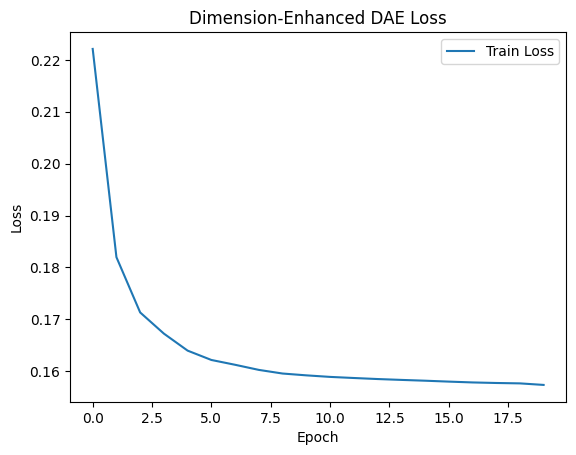

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.58153874, shape=(), dtype=float32)
Loss: tf.Tensor(0.26552594, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5470814, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5507433, shape=(), dtype=float32)
Loss: tf.Tensor(0.25607243, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56831795, shape=(), dtype=float32)


# Dimension enhanced DAE 256

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.21925708651542664
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.17975971102714539
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.17436210811138153
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1722773313522339
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.17099395394325256
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.17016327381134033
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.16611824929714203
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.16073039174079895
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.15930774807929993
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.15866538882255554
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.15829013288021088
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.15787947177886963
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.15770567953586578
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.15746939182281494
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.15721666812896729
Noise Epoch 1/1, Ite

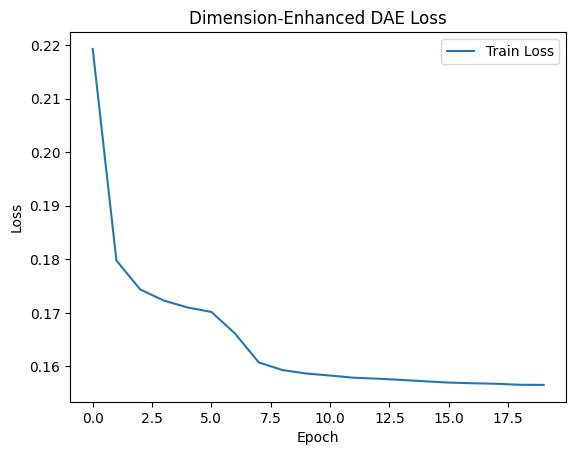

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5679541, shape=(), dtype=float32)
Loss: tf.Tensor(0.26459283, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.53523904, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5438827, shape=(), dtype=float32)
Loss: tf.Tensor(0.2561721, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.54547995, shape=(), dtype=float32)


# Dimension enhanced DAE 64

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            # layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            # layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.22472786903381348
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.18916431069374084
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.1849966198205948
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.18334533274173737
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.18269458413124084
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.18221743404865265
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.18191272020339966
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1814858317375183
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.1810273379087448
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.17964115738868713
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.17388615012168884
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.171289324760437
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.17001353204250336
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.16944919526576996
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.16903218626976013
Noise Epoch 1/1, Iterati

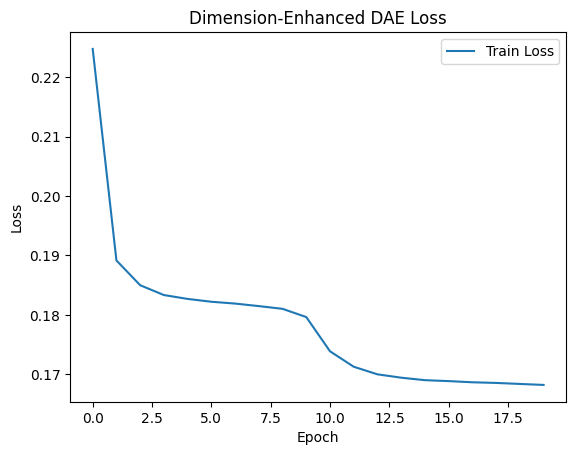

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6090683, shape=(), dtype=float32)
Loss: tf.Tensor(0.28329992, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5249627, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.57379746, shape=(), dtype=float32)
Loss: tf.Tensor(0.27370623, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.54804003, shape=(), dtype=float32)


# Dimension enhanced DAE 128 for walls

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
len(dae_dataset)

1940820

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.17089052498340607
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.14810346066951752
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.14183582365512848
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.14028477668762207
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.13961565494537354
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.13921938836574554
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.1376892477273941
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.13109278678894043
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.12702874839305878
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.12576256692409515
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.12511077523231506
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.12478283047676086
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.12453117966651917
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.12436699867248535
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.12414860725402832
Noise Epoch 1/1, Ite

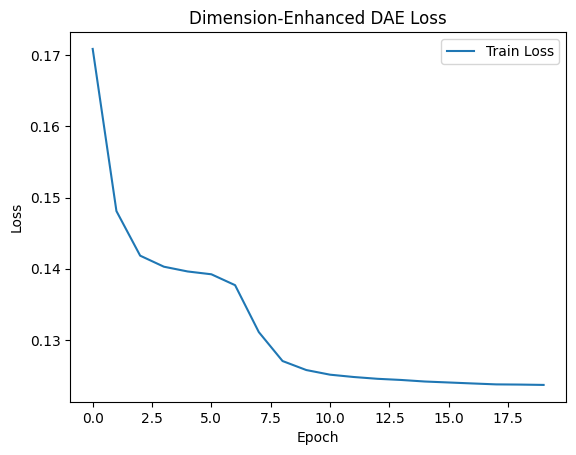

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result_walls.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.50820625, shape=(), dtype=float32)
Loss: tf.Tensor(0.24205627, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.65184087, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.48424152, shape=(), dtype=float32)
Loss: tf.Tensor(0.23452757, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6648059, shape=(), dtype=float32)


# Dimension enhanced DAE 128 for carpentry

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
len(dae_dataset)

1834730

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.1786651611328125
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.1579846441745758
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.15441486239433289
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.15216729044914246
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.15133221447467804
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.15096747875213623
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.1506609469652176
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.15039679408073425
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.15022149682044983
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.14999964833259583
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.14560548961162567
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.1402745395898819
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.13865475356578827
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.13806377351284027
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.13785512745380402
Noise Epoch 1/1, Iterat

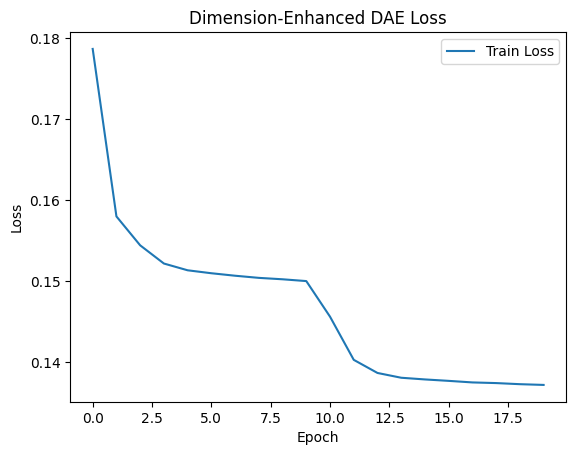

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result_carpentry.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.561454, shape=(), dtype=float32)
Loss: tf.Tensor(0.25535232, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5156829, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.54840475, shape=(), dtype=float32)
Loss: tf.Tensor(0.2483195, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5246849, shape=(), dtype=float32)


# Dimension enhanced DAE 128 for upper_floor_roof_terrace

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.30802664160728455
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.22727438807487488
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.20847274363040924
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.19292791187763214
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.18333807587623596
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.17954136431217194
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.17789116501808167
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.1770409345626831
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.17649796605110168
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.17575578391551971
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.17538033425807953
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.1749812215566635
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.17484141886234283
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.1746513694524765
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.17445077002048492
Noise Epoch 1/1, Itera

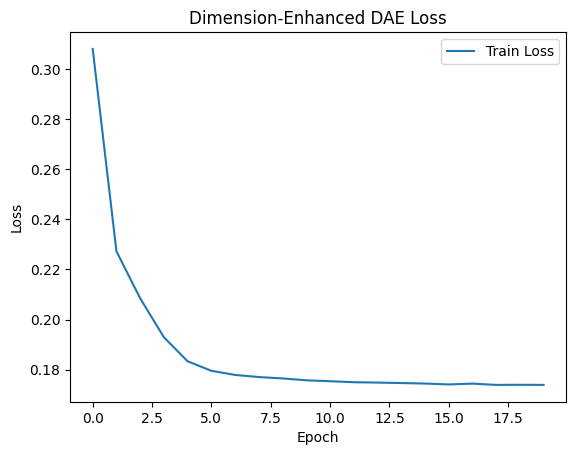

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.5)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.82504773, shape=(), dtype=float32)
Loss: tf.Tensor(0.30612072, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.47633296, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.7874048, shape=(), dtype=float32)
Loss: tf.Tensor(0.30177546, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.49667466, shape=(), dtype=float32)


# Dimension enhanced DAE 128 for ECS

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(original_dim, activation = 'leaky_relu')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)

        return decoded


In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
len(dae_dataset)

1657443

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.14310382306575775
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.11340007185935974
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.10914143919944763
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1072765588760376
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.10632602870464325
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.10543130338191986
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.10473615676164627
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.10412196815013885
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.10369542241096497
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.10332189500331879
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.10302934795618057
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.1026969775557518
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.10248778015375137
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.10230446606874466
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.10205203294754028
Noise Epoch 1/1, Iter

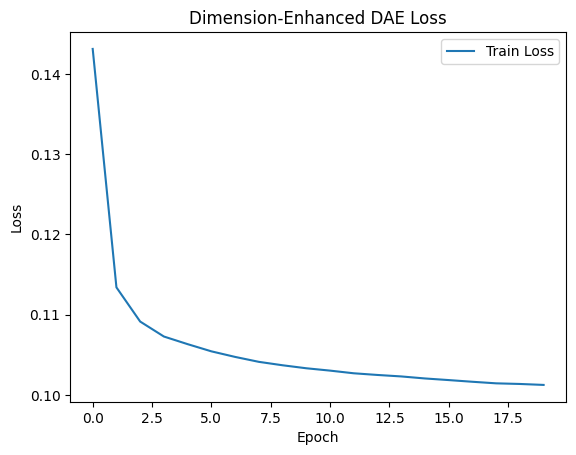

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=tf.keras.losses.MeanAbsoluteError())

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        # imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.057316016, shape=(), dtype=float32)
Loss: tf.Tensor(0.18107873, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.52257174, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_dedae, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.046670686, shape=(), dtype=float32)
Loss: tf.Tensor(0.17304614, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5860307, shape=(), dtype=float32)


# Single ultra DAE for floor

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  1.0235704183578491
Noise Epoch 1/1, Iteration 2/20
Train loss:  2.165642023086548
Noise Epoch 1/1, Iteration 3/20
Train loss:  2.683579206466675
Noise Epoch 1/1, Iteration 4/20
Train loss:  2.6675119400024414
Noise Epoch 1/1, Iteration 5/20
Train loss:  1.4375076293945312
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.8507830500602722
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.8481425642967224
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.844870924949646
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.8446981906890869
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.841569721698761
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.841194748878479
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.839937150478363
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.8374980688095093
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.8374836444854736
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.8365365862846375
Noise Epoch 1/1, Iteration 16/20
Train l

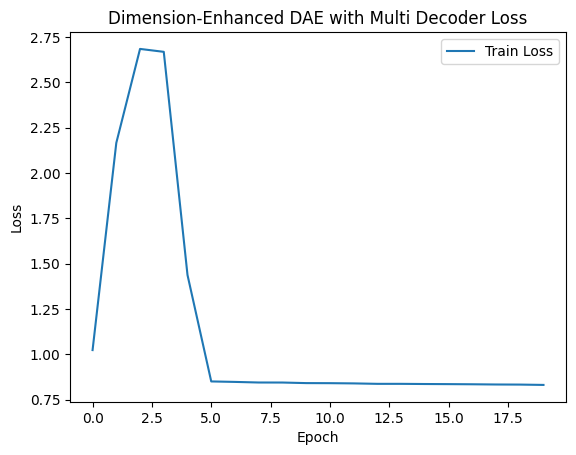

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6083152, shape=(), dtype=float32)
Loss: tf.Tensor(0.28178316, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57121754, shape=(), dtype=float32)


<ipython-input-153-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.55666375, shape=(), dtype=float32)
Loss: tf.Tensor(0.27042234, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5952591, shape=(), dtype=float32)


<ipython-input-153-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Single ultra DAE for walls

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.677904486656189
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.599091112613678
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.5845687389373779
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.5787010192871094
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.5765308737754822
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.573648989200592
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.5723327398300171
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.5712411403656006
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.5705933570861816
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.569458544254303
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.5692273378372192
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.5683161616325378
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.5677419900894165
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.5674565434455872
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.5670096278190613
Noise Epoch 1/1, Iteration 16/20
Train

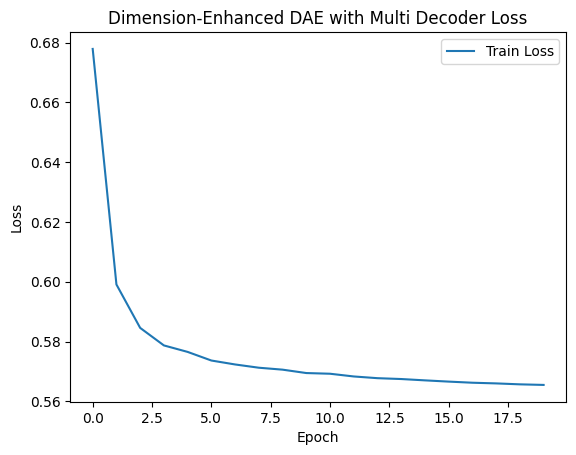

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result_walls.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.46521553, shape=(), dtype=float32)
Loss: tf.Tensor(0.24846184, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.67981166, shape=(), dtype=float32)


<ipython-input-170-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.43934706, shape=(), dtype=float32)
Loss: tf.Tensor(0.23958588, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.69064933, shape=(), dtype=float32)


<ipython-input-170-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Single ultra DAE for carpentry

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.7771246433258057
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.7160220146179199
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.7112997770309448
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.7078080773353577
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.7089159488677979
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.7056753039360046
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.7040013074874878
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.7014195919036865
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.6873237490653992
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.6821814775466919
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.6784937977790833
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.6772474050521851
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.6762480139732361
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.6754369735717773
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.6749902963638306
Noise Epoch 1/1, Iteration 16/20
T

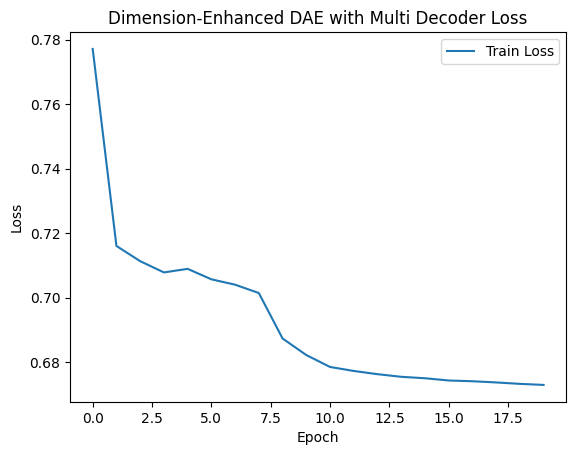

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result_carpentry.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.53633505, shape=(), dtype=float32)
Loss: tf.Tensor(0.25148085, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.552859, shape=(), dtype=float32)


<ipython-input-181-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5250495, shape=(), dtype=float32)
Loss: tf.Tensor(0.24426323, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5589804, shape=(), dtype=float32)


<ipython-input-181-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Single ultra DAE for upper_floor_roof_terrace

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  1.2492352724075317
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.8753988742828369
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.879883348941803
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.8613423109054565
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.8577783703804016
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.8540551662445068
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.8518862128257751
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.8505139350891113
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.8382092714309692
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.8354290723800659
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.8456061482429504
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.8328760862350464
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.8306522965431213
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.8297014832496643
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.8282233476638794
Noise Epoch 1/1, Iteration 16/20
Tr

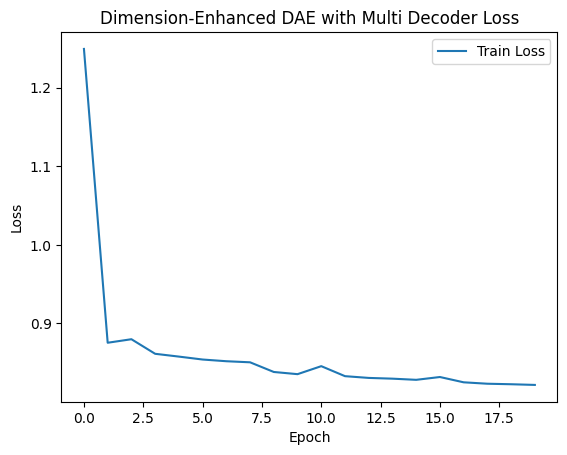

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result_upper_floor_roof_terrace.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.9168449, shape=(), dtype=float32)
Loss: tf.Tensor(0.32690224, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5735294, shape=(), dtype=float32)


<ipython-input-192-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.891258, shape=(), dtype=float32)
Loss: tf.Tensor(0.32027066, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57649255, shape=(), dtype=float32)


<ipython-input-192-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Single ultra DAE for ECS

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_continuous_target = y_true[:, 0]
    y_true_categorical_1 = y_true[:, 1]
    y_true_continuous = y_true[:, 2:]

    y_pred_continuous_target = y_pred[:, 0:1]
    y_pred_categorical_1 = y_pred[:, 1:5]
    y_pred_continuous = y_pred[:, 5:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)

    # Use mean squared error for the continuous variables.
    continuous_target_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous_target, y_pred_continuous_target)
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + continuous_target_loss + continuous_loss

In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history, save_path, fig_title):
    plt.plot(history)
    plt.title(fig_title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss'], loc='upper right')
    plt.savefig(save_path)
    plt.show()


Noise Epoch 1/1, Iteration 1/20
Train loss:  0.24751171469688416
Noise Epoch 1/1, Iteration 2/20
Train loss:  0.17326685786247253
Noise Epoch 1/1, Iteration 3/20
Train loss:  0.17089322209358215
Noise Epoch 1/1, Iteration 4/20
Train loss:  0.1657097041606903
Noise Epoch 1/1, Iteration 5/20
Train loss:  0.1620962768793106
Noise Epoch 1/1, Iteration 6/20
Train loss:  0.16020743548870087
Noise Epoch 1/1, Iteration 7/20
Train loss:  0.15940958261489868
Noise Epoch 1/1, Iteration 8/20
Train loss:  0.15800124406814575
Noise Epoch 1/1, Iteration 9/20
Train loss:  0.15775327384471893
Noise Epoch 1/1, Iteration 10/20
Train loss:  0.15693986415863037
Noise Epoch 1/1, Iteration 11/20
Train loss:  0.15660294890403748
Noise Epoch 1/1, Iteration 12/20
Train loss:  0.15621626377105713
Noise Epoch 1/1, Iteration 13/20
Train loss:  0.1559177190065384
Noise Epoch 1/1, Iteration 14/20
Train loss:  0.1554267257452011
Noise Epoch 1/1, Iteration 15/20
Train loss:  0.15531493723392487
Noise Epoch 1/1, Iterat

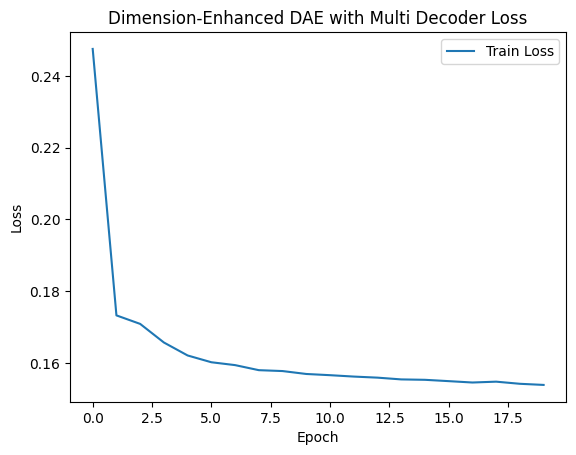

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20
loss_history = []
fig_title = 'Dimension-Enhanced DAE with Multi Decoder Loss'
save_path = '/content/gdrive/MyDrive/Colab Notebooks/DPE_code/result/de_dae_md_result_ECS.png'

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        # dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])
        history = dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop], verbose=0)
        print("Train loss: ",history.history['loss'][0])
        loss_history.append(history.history['loss'][0])

plot_loss(loss_history, save_path, fig_title)

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_continuous_target = dae_output[:, 0:1]
    dae_output_categorical_1 = tf.argmax(dae_output[:, 1:5], 1)
    dae_output_continuous = dae_output[:, 5:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_continuous_target, dae_output_categorical_1, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.04972567, shape=(), dtype=float32)
Loss: tf.Tensor(0.1854251, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.65120995, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 10%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.038139865, shape=(), dtype=float32)
Loss: tf.Tensor(0.1786235, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7472628, shape=(), dtype=float32)


# A new trainig method

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3375/3375 [==============================] - 42s 10ms/step - loss: 1.0218
Noise Epoch 2/20, Iteration 1/1
3375/3375 [==============================] - 35s 10ms/step - loss: 0.9047
Noise Epoch 3/20, Iteration 1/1
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8811
Noise Epoch 4/20, Iteration 1/1
3375/3375 [==============================] - 34s 10ms/step - loss: 0.8576
Noise Epoch 5/20, Iteration 1/1
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8453
Noise Epoch 6/20, Iteration 1/1
3375/3375 [==============================] - 34s 10ms/step - loss: 0.8384
Noise Epoch 7/20, Iteration 1/1
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8320
Noise Epoch 8/20, Iteration 1/1
3375/3375 [==============================] - 34s 10ms/step - loss: 0.8291
Noise Epoch 9/20, Iteration 1/1
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8235
Noise Epoch 10/20, Iteration 1/1
3375/3375 [==

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6039583, shape=(), dtype=float32)
Loss: tf.Tensor(0.2755486, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5797142, shape=(), dtype=float32)


<ipython-input-173-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# Iterative Single ultra DAE

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)
    imputed_data = x_train_np_noisy

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(imputed_data, x_train_np, batch_size = 256, callbacks=[early_stop])
        imputed_data = dae(imputed_data)
        imputed_data = reshape_dae_output(imputed_data)



Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 41s 10ms/step - loss: 1.0201
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 37s 10ms/step - loss: 1.3322
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 35s 10ms/step - loss: 1.2181
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 34s 10ms/step - loss: 1.2014
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 35s 10ms/step - loss: 1.2020
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 34s 10ms/step - loss: 1.2030
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 34s 10ms/step - loss: 1.2125
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 34s 10ms/step - loss: 1.2102
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 35s 10ms/step - loss: 1.2132
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed_single_dedaemd, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(1.6789178, shape=(), dtype=float32)
Loss: tf.Tensor(0.5847096, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.21393943, shape=(), dtype=float32)


<ipython-input-164-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


# DAE for floor

In this part, I want to explain that I have tried many DAE structures during these three weeks, including traditional DAEs using fully linked networks and DAEs using CNNs. None of these models had an imputation accuracy of more than 25% for the target column. So the DAE structure I present below is the best structure I have come up with after numerous attempts during these three weeks.

The final performance of the model is comparable to models trained and predicted using a dataset without missing values.

I have made major changes to the last DAE. At present, only the Encoder part is the same as the last DAE, and the idea of dimension increase is still retained. Because I have tried many times, the performance is always better than that after dimension reduction and then restoration. For this DAE, I adopted an integration method to improve the performance of the model, and divided the DAE decoder into different parts according to the data type. The composition of a single DAE is as follows:


1. Encoder, all Decoders share this encoder, and the encoder upgrades the data.
2. Decoder f1, decodes the target column Quality_insulation_lower_floor, and its last layer is a softmax network with 4 nodes.
3. Decoder f2, decodes Quality_insulation_envelope, and its last layer is a softmax network with 4 nodes.
4. Decoder f3, decodes Roof_insulation_(0/1), the last layer of which is a softmax network with 2 nodes.
5. Decoder f4, to decode the remaining continuous variables.


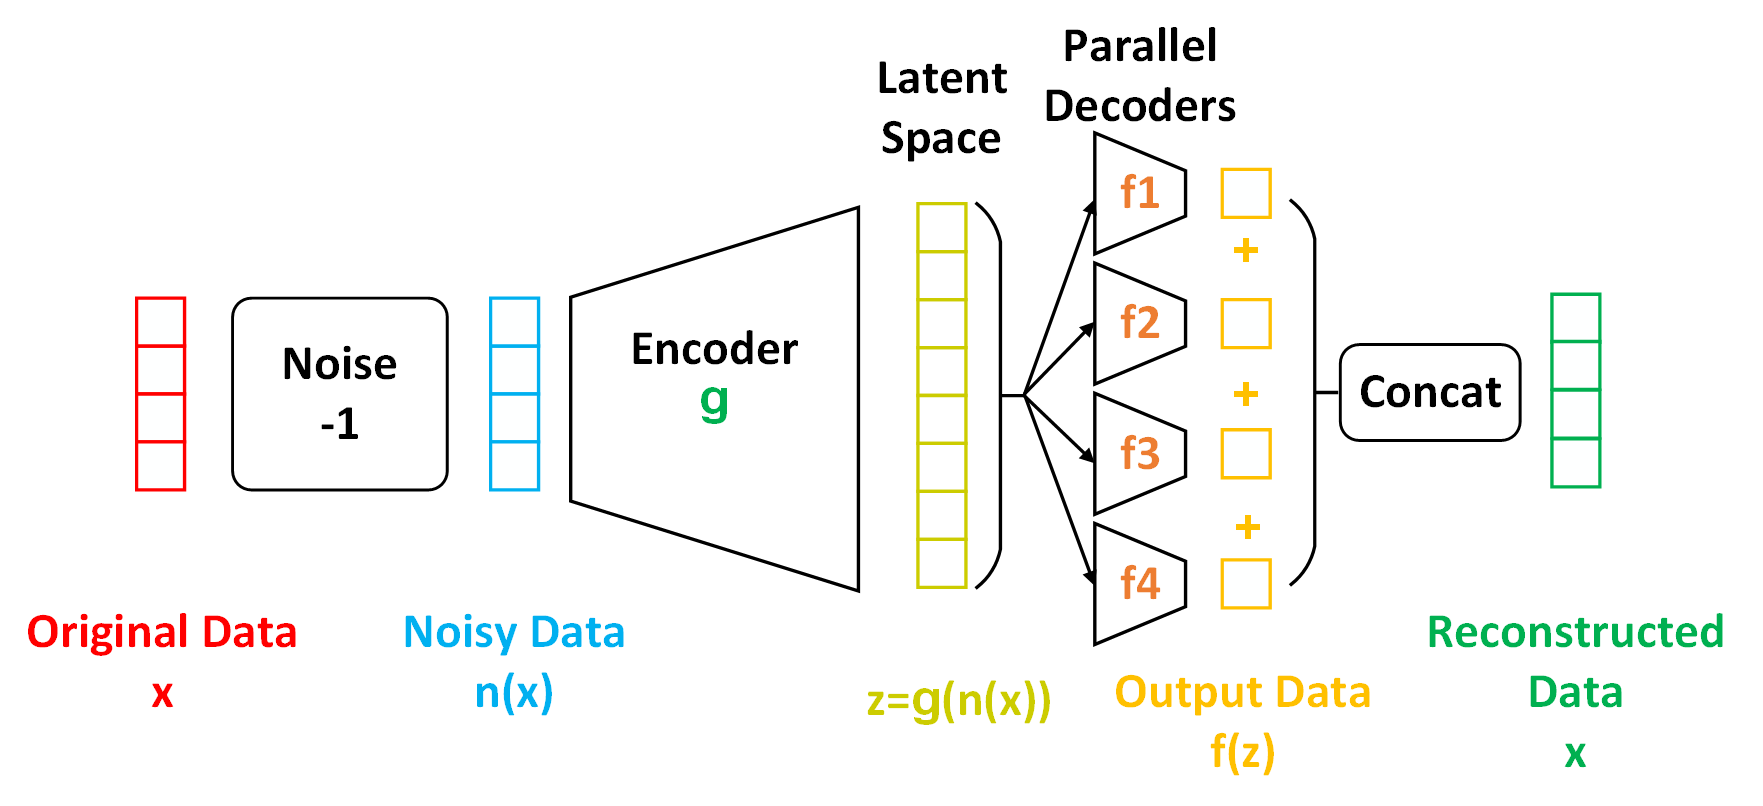




At the same time, in order to improve the performance of my model, I used the above DAE and trained three DAE networks under different activation functions to gain the advantage of the ensemble method. The three DAEs mainly use the activation functions Leaky_ReLU, Swish, and ELU.
The schematic diagram of the integration method is as follows:

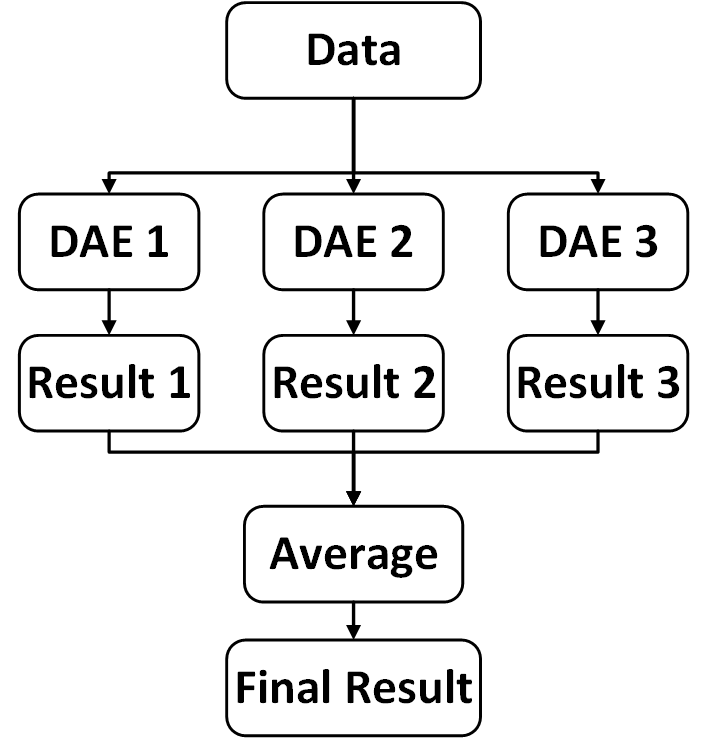

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                   863901.000000                863901.000000   
mean                         1.761512                     1.081326   
std                          1.142205                     1.143455   
min                          0.000000                     0.000000   
25%                          1.000000                     0.000000   
50%                          2.000000                     1.000000   
75%                          3.000000                     2.000000   
max                          3.000000                     3.000000   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count          863901.000000      863901.000000        863901.000000   
mean                0.575030           0.645630             0.406467   
std                 0.494339           0.202022             0.192926   
min                 0.000000           0.000000             0.000000   
25%                 0.000000           0.466667             0.261863   
50%                 1.000000           0.666667             0.388987   
75%                 1.000000           0.800000             0.521383   
max                 1.000000           1.000000             1.000000   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count      863901.000000          863901.000000                 863901.000000   
mean            0.530602               0.481110                      0.365648   
std             0.269561               0.178542                      0.208470   
min             0.000000               0.000000                      0.000000   
25%             0.312500               0.372595                      0.201893   
50%             0.572917               0.482622                      0.322844   
75%             0.770833               0.584081                      0.492773   
max             1.000000               1.000000                      1.000000   

       Losses_lower_floors  
count        863901.000000  
mean              0.233128  
std               0.219461  
min               0.000000  
25%               0.000000  
50%               0.204451  
75%               0.375522  
max               1.000000

In [ ]:
len(x_train)

863901

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3375/3375 [==============================] - 50s 13ms/step - loss: 1.0437
Noise Epoch 2/20, Iteration 1/1
3375/3375 [==============================] - 35s 10ms/step - loss: 0.9055
Noise Epoch 3/20, Iteration 1/1
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8752
Noise Epoch 4/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8627
Noise Epoch 5/20, Iteration 1/1
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8554
Noise Epoch 6/20, Iteration 1/1
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8498
Noise Epoch 7/20, Iteration 1/1
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8460
Noise Epoch 8/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8464
Noise Epoch 9/20, Iteration 1/1
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8441
Noise Epoch 10/20, Iteration 1/1
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3375/3375 [==============================] - 47s 12ms/step - loss: 1.0512
Noise Epoch 2/20, Iteration 1/1
3375/3375 [==============================] - 39s 12ms/step - loss: 0.9120
Noise Epoch 3/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.9041
Noise Epoch 4/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8835
Noise Epoch 5/20, Iteration 1/1
3375/3375 [==============================] - 39s 11ms/step - loss: 0.8761
Noise Epoch 6/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8628
Noise Epoch 7/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8613
Noise Epoch 8/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8555
Noise Epoch 9/20, Iteration 1/1
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8521
Noise Epoch 10/20, Iteration 1/1
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3375/3375 [==============================] - 45s 12ms/step - loss: 0.9945
Noise Epoch 2/20, Iteration 1/1
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8913
Noise Epoch 3/20, Iteration 1/1
3375/3375 [==============================] - 39s 11ms/step - loss: 0.8634
Noise Epoch 4/20, Iteration 1/1
3375/3375 [==============================] - 39s 11ms/step - loss: 0.8369
Noise Epoch 5/20, Iteration 1/1
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8259
Noise Epoch 6/20, Iteration 1/1
3375/3375 [==============================] - 43s 13ms/step - loss: 0.8214
Noise Epoch 7/20, Iteration 1/1
3375/3375 [==============================] - 41s 12ms/step - loss: 0.8200
Noise Epoch 8/20, Iteration 1/1
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8155
Noise Epoch 9/20, Iteration 1/1
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8137
Noise Epoch 10/20, Iteration 1/1
3375/3375 [==

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')

I added a Classifier constructed using MLP below. This classifier is trained on data without missing values and predicts the target column using data without missing values.

The purpose of my doing this is to use this classifier as a baseline model to judge the imputation performance of my DAE. If DAE can approach or reach the performance of MLP using the full data set for prediction, then the DAE model I constructed is meaningful.

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
26997/26997 [==============================] - 67s 2ms/step - loss: 0.8608 - accuracy: 0.5838 - val_loss: 0.8358 - val_accuracy: 0.5906
Epoch 2/10
26997/26997 [==============================] - 67s 2ms/step - loss: 0.8274 - accuracy: 0.5930 - val_loss: 0.8261 - val_accuracy: 0.5914
Epoch 3/10
26997/26997 [==============================] - 65s 2ms/step - loss: 0.8207 - accuracy: 0.5957 - val_loss: 0.8228 - val_accuracy: 0.5941
Epoch 4/10
26997/26997 [==============================] - 66s 2ms/step - loss: 0.8160 - accuracy: 0.5971 - val_loss: 0.8138 - val_accuracy: 0.5974
Epoch 5/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8114 - accuracy: 0.5979 - val_loss: 0.8089 - val_accuracy: 0.5978
Epoch 6/10
26997/26997 [==============================] - 66s 2ms/step - loss: 0.8067 - accuracy: 0.5997 - val_loss: 0.8075 - val_accuracy: 0.5940
Epoch 7/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8029 - accuracy: 0.6015 - val_loss: 0

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


The following is my imputation performance results. I have listed the table to calculate the performance of the model. You can directly look at the table to observe the results.

In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_lower_floor'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5991228, shape=(), dtype=float32)
Loss: tf.Tensor(0.27688354, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57506925, shape=(), dtype=float32)


<ipython-input-223-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.5975536, shape=(), dtype=float32)
Loss: tf.Tensor(0.272095, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5794149, shape=(), dtype=float32)


<ipython-input-223-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.583204, shape=(), dtype=float32)
Loss: tf.Tensor(0.26416218, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5909207, shape=(), dtype=float32)


<ipython-input-223-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.54241216, shape=(), dtype=float32)
Loss: tf.Tensor(0.25491476, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6150459, shape=(), dtype=float32)


<ipython-input-223-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.56712776, shape=(), dtype=float32)
Loss: tf.Tensor(0.26062924, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.60109264, shape=(), dtype=float32)


<ipython-input-224-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5285111, shape=(), dtype=float32)
Loss: tf.Tensor(0.25032616, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.62056327, shape=(), dtype=float32)


<ipython-input-224-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


By analyzing the above results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.598|0.591|0.558|0.562|
|total loss|0.279|0.350|0.339|0.303|
|target col acc|0.584|0.589|0.613|0.611|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10% (note that the missing rate of 10% is very close to the missing rate of the real dataset, and the missing rate of the target column in the real dataset 8.5%)

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.512|0.504|
|total loss|0.328|0.287|
|target col acc|0.638|0.642|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

At the same time, compared with the MLP classification network trained without missing values: the correct rate of the ensemble method is 0.6424, while the correct rate of the MLP classifier is 0.6342.

It should be noted that this MLP classifier is only trained for 10 rounds in the report, while DAE is trained for 50 rounds. However, when I tested the MLP alone, after the number of training rounds reached 50 rounds, the correct rate could not exceed 0.65.

Note that this MLP is trained without missing values and predicts target col using data without missing values. The DAE and ensemble methods used in the experiment can already achieve or even slightly exceed the effect of MLP. I think this result has some value.

In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_lower_floor')], 'Quality_insulation_lower_floor']

3887846    2.0
1975400    3.0
1749817    1.0
3465227    2.0
1203275    2.0
          ... 
452932     3.0
1025368    2.0
2992036    1.0
2708182    0.0
388351     2.0
Name: Quality_insulation_lower_floor, Length: 43320, dtype: float64

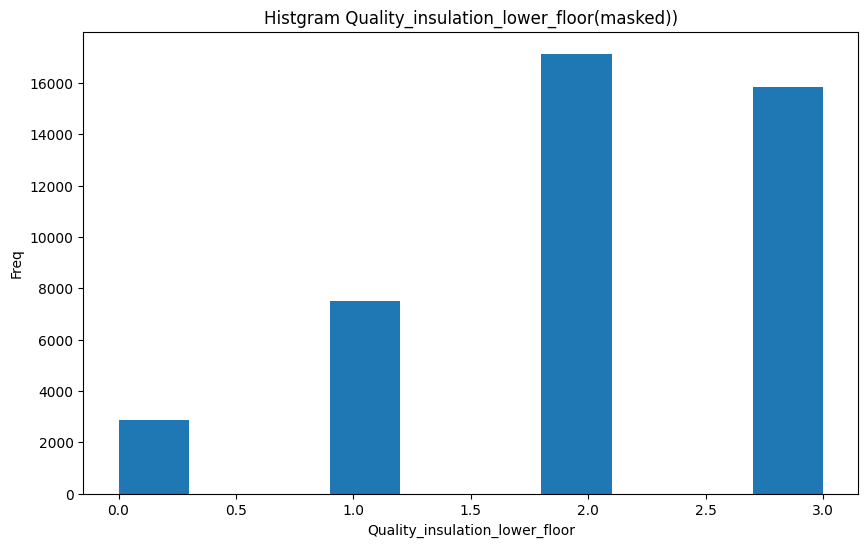

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_walls

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
len(dae_dataset)

1940820

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_walls  Quality_insulation_envelope  \
count             970410.000000                970410.000000   
mean                   0.902570                     1.008407   
std                    1.061518                     1.126350   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     1.000000   
75%                    2.000000                     2.000000   
max                    3.000000                     3.000000   

       Year_construction  Living_area_housing  Postal_code_(BAN)  \
count      970410.000000        970410.000000      970410.000000   
mean            0.575744             0.422855           0.530620   
std             0.225716             0.199523           0.274332   
min             0.000000             0.001326           0.000000   
25%             0.384615             0.271883           0.312500   
50%             0.615385             0.411141           0.572917   
75%             0.769231             0.547745           0.770833   
max             1.000000             1.000000           1.000000   

       Final_ECS_Consumption  Primary_5_usages_consumption   Losses_walls  
count          970410.000000                 970410.000000  970410.000000  
mean                0.473272                      0.380946       0.202319  
std                 0.172156                      0.214968       0.197898  
min                 0.000000                      0.000879       0.000000  
25%                 0.367137                      0.211233       0.060629  
50%                 0.473573                      0.335070       0.132626  
75%                 0.571637                      0.515955       0.273967  
max                 1.000000                      0.999980       1.000000

In [ ]:
len(x_train)

970410

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3791/3791 [==============================] - 39s 9ms/step - loss: 0.7139
Noise Epoch 2/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.6095
Noise Epoch 3/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5892
Noise Epoch 4/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5824
Noise Epoch 5/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5815
Noise Epoch 6/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5784
Noise Epoch 7/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5772
Noise Epoch 8/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5745
Noise Epoch 9/20, Iteration 1/1
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5732
Noise Epoch 10/20, Iteration 1/1
3791/3791 [===========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3791/3791 [==============================] - 43s 10ms/step - loss: 0.7611
Noise Epoch 2/20, Iteration 1/1
3791/3791 [==============================] - 37s 10ms/step - loss: 0.6377
Noise Epoch 3/20, Iteration 1/1
3791/3791 [==============================] - 37s 10ms/step - loss: 0.6156
Noise Epoch 4/20, Iteration 1/1
3791/3791 [==============================] - 37s 10ms/step - loss: 0.6056
Noise Epoch 5/20, Iteration 1/1
3791/3791 [==============================] - 36s 10ms/step - loss: 0.6015
Noise Epoch 6/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5968
Noise Epoch 7/20, Iteration 1/1
3791/3791 [==============================] - 36s 10ms/step - loss: 0.5930
Noise Epoch 8/20, Iteration 1/1
3791/3791 [==============================] - 36s 10ms/step - loss: 0.5889
Noise Epoch 9/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5844
Noise Epoch 10/20, Iteration 1/1
3791/3791 [====

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3791/3791 [==============================] - 41s 9ms/step - loss: 0.7081
Noise Epoch 2/20, Iteration 1/1
3791/3791 [==============================] - 35s 9ms/step - loss: 0.6254
Noise Epoch 3/20, Iteration 1/1
3791/3791 [==============================] - 35s 9ms/step - loss: 0.5990
Noise Epoch 4/20, Iteration 1/1
3791/3791 [==============================] - 36s 10ms/step - loss: 0.5856
Noise Epoch 5/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5809
Noise Epoch 6/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5778
Noise Epoch 7/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5758
Noise Epoch 8/20, Iteration 1/1
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5766
Noise Epoch 9/20, Iteration 1/1
3791/3791 [==============================] - 35s 9ms/step - loss: 0.5738
Noise Epoch 10/20, Iteration 1/1
3791/3791 [==========

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_walls_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_walls_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_walls_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
30326/30326 [==============================] - 104s 3ms/step - loss: 0.7661 - accuracy: 0.6801 - val_loss: 0.7270 - val_accuracy: 0.6903
Epoch 2/10
30326/30326 [==============================] - 101s 3ms/step - loss: 0.7083 - accuracy: 0.7009 - val_loss: 0.6939 - val_accuracy: 0.7089
Epoch 3/10
30326/30326 [==============================] - 101s 3ms/step - loss: 0.6887 - accuracy: 0.7127 - val_loss: 0.6814 - val_accuracy: 0.7187
Epoch 4/10
30326/30326 [==============================] - 100s 3ms/step - loss: 0.6786 - accuracy: 0.7212 - val_loss: 0.6735 - val_accuracy: 0.7261
Epoch 5/10
30326/30326 [==============================] - 103s 3ms/step - loss: 0.6716 - accuracy: 0.7264 - val_loss: 0.6706 - val_accuracy: 0.7270
Epoch 6/10
30326/30326 [==============================] - 101s 3ms/step - loss: 0.6669 - accuracy: 0.7287 - val_loss: 0.6638 - val_accuracy: 0.7300
Epoch 7/10
30326/30326 [==============================] - 100s 3ms/step - loss: 0.6623 - accuracy: 0.7315 - val_

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_walls'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.43138656, shape=(), dtype=float32)
Loss: tf.Tensor(0.2414016, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.701117, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.45936167, shape=(), dtype=float32)
Loss: tf.Tensor(0.2462426, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.690216, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.45983028, shape=(), dtype=float32)
Loss: tf.Tensor(0.24307732, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6836883, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.43423378, shape=(), dtype=float32)
Loss: tf.Tensor(0.23444526, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6949105, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.43330964, shape=(), dtype=float32)
Loss: tf.Tensor(0.23881204, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7014247, shape=(), dtype=float32)


<ipython-input-181-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.39993188, shape=(), dtype=float32)
Loss: tf.Tensor(0.2297474, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.71845484, shape=(), dtype=float32)


<ipython-input-181-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_walls')], 'Quality_insulation_walls']

158861     0.0
1940813    2.0
4270947    0.0
976270     2.0
1761581    0.0
          ... 
3212068    0.0
558706     0.0
667806     2.0
1261768    2.0
1367041    3.0
Name: Quality_insulation_walls, Length: 193293, dtype: float64

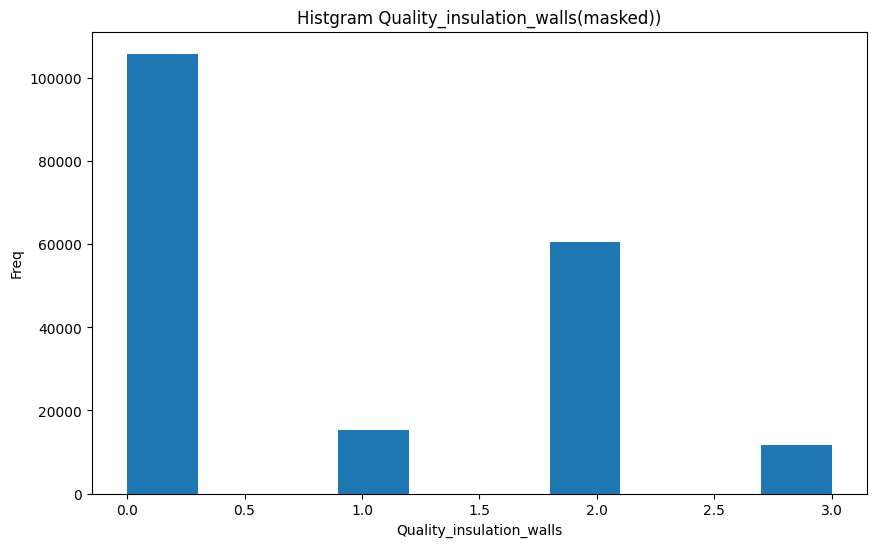

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_carpentry

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(18, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
len(dae_dataset)

1834730

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# dataset and target column
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

# Identify the classes
classes = x_train[target_column].unique()

# Find the class with the smallest number of samples
min_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)

# Balance the classes
x_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],
                                       replace = False,    # sample without replacement
                                       n_samples = min_class_size,     # to match minority class
                                       random_state = 0) # reproducible results
                              for c in classes])

# Reset the index
x_train_balanced.reset_index(drop=True, inplace=True)
x_train = x_train_balanced
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.utils import resample\nimport pandas as pd\n\n# dataset and target column\ndae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers\ntarget_column = 'Quality_insulation_carpentry'\n\n# Divide the dataset into training and validation sets\nx_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)\nx_true = x_val.copy()\n\n# Identify the classes\nclasses = x_train[target_column].unique()\n\n# Find the class with the smallest number of samples\nmin_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)\n\n# Balance the classes\nx_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],\n                                       replace = False,    # sample without replacement\n                                       n_samples = min_class_size,     # to match minority class\n                                       random_state = 0) # reproduci

In [ ]:
len(x_train)

917365

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3584/3584 [==============================] - 37s 9ms/step - loss: 0.8037
Noise Epoch 2/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7361
Noise Epoch 3/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7210
Noise Epoch 4/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7112
Noise Epoch 5/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7094
Noise Epoch 6/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7085
Noise Epoch 7/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7060
Noise Epoch 8/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7039
Noise Epoch 9/20, Iteration 1/1
3584/3584 [==============================] - 32s 9ms/step - loss: 0.7015
Noise Epoch 10/20, Iteration 1/1
3584/3584 [===========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3584/3584 [==============================] - 40s 10ms/step - loss: 0.8319
Noise Epoch 2/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7338
Noise Epoch 3/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7163
Noise Epoch 4/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7129
Noise Epoch 5/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7060
Noise Epoch 6/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7063
Noise Epoch 7/20, Iteration 1/1
3584/3584 [==============================] - 36s 10ms/step - loss: 0.7062
Noise Epoch 8/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7017
Noise Epoch 9/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7011
Noise Epoch 10/20, Iteration 1/1
3584/3584 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
3584/3584 [==============================] - 38s 9ms/step - loss: 0.7803
Noise Epoch 2/20, Iteration 1/1
3584/3584 [==============================] - 34s 9ms/step - loss: 0.7211
Noise Epoch 3/20, Iteration 1/1
3584/3584 [==============================] - 34s 9ms/step - loss: 0.7028
Noise Epoch 4/20, Iteration 1/1
3584/3584 [==============================] - 34s 10ms/step - loss: 0.6840
Noise Epoch 5/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.6771
Noise Epoch 6/20, Iteration 1/1
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6681
Noise Epoch 7/20, Iteration 1/1
3584/3584 [==============================] - 33s 9ms/step - loss: 0.8099
Noise Epoch 8/20, Iteration 1/1
3584/3584 [==============================] - 34s 10ms/step - loss: 2.0252
Noise Epoch 9/20, Iteration 1/1
3584/3584 [==============================] - 34s 9ms/step - loss: 2.0250
Noise Epoch 10/20, Iteration 1/1
3584/3584 [========

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_carpentry_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_carpentry_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_carpentry_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data=(x_test_clf, y_test_clf))


Epoch 1/5
28668/28668 [==============================] - 94s 3ms/step - loss: 0.9874 - accuracy: 0.5732 - val_loss: 0.9704 - val_accuracy: 0.5789
Epoch 2/5
28668/28668 [==============================] - 93s 3ms/step - loss: 0.9646 - accuracy: 0.5804 - val_loss: 0.9578 - val_accuracy: 0.5844
Epoch 3/5
28668/28668 [==============================] - 94s 3ms/step - loss: 0.9566 - accuracy: 0.5837 - val_loss: 0.9535 - val_accuracy: 0.5853
Epoch 4/5
28668/28668 [==============================] - 93s 3ms/step - loss: 0.9519 - accuracy: 0.5862 - val_loss: 0.9486 - val_accuracy: 0.5880
Epoch 5/5
28668/28668 [==============================] - 98s 3ms/step - loss: 0.9471 - accuracy: 0.5886 - val_loss: 0.9446 - val_accuracy: 0.5904


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_carpentry'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.58476406, shape=(), dtype=float32)
Loss: tf.Tensor(0.2678724, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.52814716, shape=(), dtype=float32)


<ipython-input-209-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.57712126, shape=(), dtype=float32)
Loss: tf.Tensor(0.26635626, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.52520615, shape=(), dtype=float32)


<ipython-input-209-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.52161884, shape=(), dtype=float32)
Loss: tf.Tensor(0.24845631, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5651348, shape=(), dtype=float32)


<ipython-input-209-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5054188, shape=(), dtype=float32)
Loss: tf.Tensor(0.24197459, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57421285, shape=(), dtype=float32)


<ipython-input-209-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5486163, shape=(), dtype=float32)
Loss: tf.Tensor(0.25577772, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5497939, shape=(), dtype=float32)


<ipython-input-210-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5255126, shape=(), dtype=float32)
Loss: tf.Tensor(0.24753071, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5617556, shape=(), dtype=float32)


<ipython-input-210-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_carpentry')], 'Quality_insulation_carpentry']

1854263    1.0
221983     1.0
1962494    0.0
2609718    1.0
787903     1.0
          ... 
3238771    1.0
964272     1.0
3401388    1.0
1903960    1.0
4227188    1.0
Name: Quality_insulation_carpentry, Length: 182949, dtype: float64

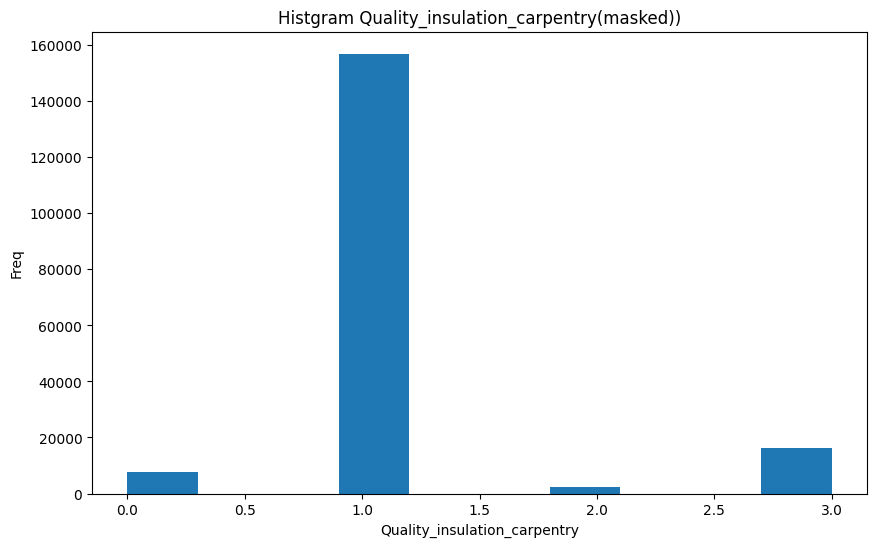

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_upper_floor_roof_terrace

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_upper_floor_roof_terrace  \
count                                148822.000000   
mean                                      1.205581   
std                                       1.294332   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                       3.000000   

       Quality_insulation_envelope  Roof_insulation_(0/1)  Year_construction  \
count                148822.000000           148822.00000      148822.000000   
mean                      1.064426                0.78305           0.649285   
std                       1.108516                0.41217           0.207831   
min                       0.000000                0.00000           0.000000   
25%                       0.000000                1.00000           0.466667   
50%                       1.000000                1.00000           0.666667   
75%                       2.000000                1.00000           0.800000   
max                       3.000000                1.00000           1.000000   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count        148822.000000      148822.000000          148822.000000   
mean              0.418883           0.551313               0.475572   
std               0.191705           0.278161               0.179310   
min               0.000000           0.000000               0.000000   
25%               0.283259           0.333333               0.366148   
50%               0.402928           0.604167               0.468013   
75%               0.525780           0.781250               0.572477   
max               1.000000           1.000000               1.000000   

       Primary_5_usages_consumption  
count                 148822.000000  
mean                       0.354479  
std                        0.215750  
min                        0.000000  
25%                        0.186964  
50%                        0.300377  
75%                        0.482204  
max                        1.000000

In [ ]:
len(x_train)

148822

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
582/582 [==============================] - 13s 10ms/step - loss: 1.3755
Noise Epoch 2/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 2.3978
Noise Epoch 3/20, Iteration 1/1
582/582 [==============================] - 7s 11ms/step - loss: 2.4858
Noise Epoch 4/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 2.4631
Noise Epoch 5/20, Iteration 1/1
582/582 [==============================] - 7s 11ms/step - loss: 2.4552
Noise Epoch 6/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 2.4567
Noise Epoch 7/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 2.4378
Noise Epoch 8/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 2.4411
Noise Epoch 9/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 2.4320
Noise Epoch 10/20, Iteration 1/1
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
582/582 [==============================] - 13s 11ms/step - loss: 1.4559
Noise Epoch 2/20, Iteration 1/1
582/582 [==============================] - 7s 12ms/step - loss: 0.8798
Noise Epoch 3/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.8720
Noise Epoch 4/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.8739
Noise Epoch 5/20, Iteration 1/1
582/582 [==============================] - 7s 12ms/step - loss: 0.8626
Noise Epoch 6/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.8535
Noise Epoch 7/20, Iteration 1/1
582/582 [==============================] - 7s 12ms/step - loss: 0.8544
Noise Epoch 8/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.8406
Noise Epoch 9/20, Iteration 1/1
582/582 [==============================] - 7s 11ms/step - loss: 0.8360
Noise Epoch 10/20, Iteration 1/1
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
582/582 [==============================] - 12s 12ms/step - loss: 1.1258
Noise Epoch 2/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.9206
Noise Epoch 3/20, Iteration 1/1
582/582 [==============================] - 6s 11ms/step - loss: 0.8619
Noise Epoch 4/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 0.8392
Noise Epoch 5/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 0.8381
Noise Epoch 6/20, Iteration 1/1
582/582 [==============================] - 7s 12ms/step - loss: 0.8333
Noise Epoch 7/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 0.8394
Noise Epoch 8/20, Iteration 1/1
582/582 [==============================] - 7s 11ms/step - loss: 0.8250
Noise Epoch 9/20, Iteration 1/1
582/582 [==============================] - 6s 10ms/step - loss: 0.8244
Noise Epoch 10/20, Iteration 1/1
582/582 [==============================

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
4651/4651 [==============================] - 12s 2ms/step - loss: 1.0234 - accuracy: 0.5807 - val_loss: 1.0003 - val_accuracy: 0.5872
Epoch 2/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9833 - accuracy: 0.5978 - val_loss: 0.9595 - val_accuracy: 0.6184
Epoch 3/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9549 - accuracy: 0.6177 - val_loss: 0.9458 - val_accuracy: 0.6268
Epoch 4/10
4651/4651 [==============================] - 12s 3ms/step - loss: 0.9462 - accuracy: 0.6246 - val_loss: 0.9375 - val_accuracy: 0.6323
Epoch 5/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9377 - accuracy: 0.6305 - val_loss: 0.9359 - val_accuracy: 0.6298
Epoch 6/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9223 - accuracy: 0.6397 - val_loss: 0.9089 - val_accuracy: 0.6482
Epoch 7/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9089 - accuracy: 0.6452 - val_loss: 0.8974 - val_ac

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.8013708, shape=(), dtype=float32)
Loss: tf.Tensor(0.30944067, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.60452366, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.9148711, shape=(), dtype=float32)
Loss: tf.Tensor(0.33859864, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56787837, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.7964566, shape=(), dtype=float32)
Loss: tf.Tensor(0.30652377, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.61008924, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.7352227, shape=(), dtype=float32)
Loss: tf.Tensor(0.29378667, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.63589746, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.78440243, shape=(), dtype=float32)
Loss: tf.Tensor(0.30825216, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6136545, shape=(), dtype=float32)


<ipython-input-240-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.7551901, shape=(), dtype=float32)
Loss: tf.Tensor(0.29747093, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.62146133, shape=(), dtype=float32)


<ipython-input-240-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_upper_floor_roof_terrace')], 'Quality_insulation_upper_floor_roof_terrace']

3833774    0.0
2646308    0.0
1984756    2.0
3382703    2.0
2058749    0.0
          ... 
1986428    0.0
3898343    0.0
3174923    0.0
1409638    0.0
2811969    0.0
Name: Quality_insulation_upper_floor_roof_terrace, Length: 7295, dtype: float64

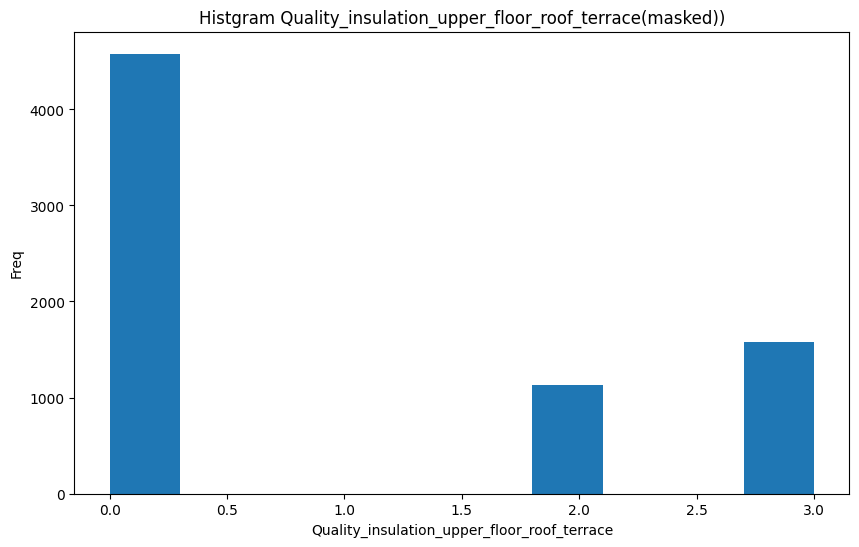

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for ECS

It's important to note that when calculating the imputation accuracy for the ECS feature, I normalized the ECS data to fall within the [0, 1] range. Any error within ±0.03 was considered as a correct imputation.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(1, activation='elu')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_continuous_target = y_true[:, 0]
    y_true_categorical_1 = y_true[:, 1]
    y_true_continuous = y_true[:, 2:]

    y_pred_continuous_target = y_pred[:, 0:1]
    y_pred_categorical_1 = y_pred[:, 1:5]
    y_pred_continuous = y_pred[:, 5:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)

    # Use mean squared error for the continuous variables.
    continuous_target_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous_target, y_pred_continuous_target)
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + continuous_target_loss + continuous_loss

In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
len(dae_dataset)

1657443

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Primary_ECS_Consumption  Type_main_energy_ECS  Year_construction  \
count             1.325954e+06          1.325954e+06       1.325954e+06   
mean              3.771437e-01          6.462999e-01       5.017834e-01   
std               1.675623e-01          5.950492e-01       1.543359e-01   
min               0.000000e+00          0.000000e+00       0.000000e+00   
25%               2.363497e-01          0.000000e+00       3.684211e-01   
50%               3.612812e-01          1.000000e+00       5.263158e-01   
75%               5.111698e-01          1.000000e+00       6.315789e-01   
max               1.000000e+00          3.000000e+00       1.000000e+00   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count         1.325954e+06       1.325954e+06           1.325954e+06   
mean          4.249033e-01      -4.740429e-02           4.706429e-01   
std           1.947660e-01       9.811603e-01           1.680849e-01   
min           1.349528e-03      -1.965726e+00           0.000000e+00   
25%           2.827260e-01      -8.514078e-01           3.670168e-01   
50%           4.149798e-01       7.719066e-02           4.730422e-01   
75%           5.445344e-01       7.829255e-01           5.699281e-01   
max           1.000000e+00       1.600092e+00           1.000000e+00   

       Primary_5_usages_consumption  Final_consumption_ECS_generator_no1  
count                  1.325954e+06                         1.325954e+06  
mean                   3.793450e-01                         4.884689e-01  
std                    2.131845e-01                         1.666881e-01  
min                    0.000000e+00                         4.430824e-04  
25%                    2.127129e-01                         3.851124e-01  
50%                    3.337159e-01                         4.919322e-01  
75%                    5.089282e-01                         5.872318e-01  
max                    1.000000e+00                         1.000000e+00

In [ ]:
len(x_train)

1325954

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
5180/5180 [==============================] - 62s 10ms/step - loss: 0.4596
Noise Epoch 2/20, Iteration 1/1
5180/5180 [==============================] - 48s 9ms/step - loss: 0.4129
Noise Epoch 3/20, Iteration 1/1
5180/5180 [==============================] - 49s 9ms/step - loss: 0.4029
Noise Epoch 4/20, Iteration 1/1
5180/5180 [==============================] - 48s 9ms/step - loss: 0.3266
Noise Epoch 5/20, Iteration 1/1
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1656
Noise Epoch 6/20, Iteration 1/1
5180/5180 [==============================] - 47s 9ms/step - loss: 0.1643
Noise Epoch 7/20, Iteration 1/1
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1640
Noise Epoch 8/20, Iteration 1/1
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1640
Noise Epoch 9/20, Iteration 1/1
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1633
Noise Epoch 10/20, Iteration 1/1
5180/5180 [==========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
5180/5180 [==============================] - 56s 10ms/step - loss: 0.2845
Noise Epoch 2/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2183
Noise Epoch 3/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.2077
Noise Epoch 4/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2047
Noise Epoch 5/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2035
Noise Epoch 6/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2068
Noise Epoch 7/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2023
Noise Epoch 8/20, Iteration 1/1
5180/5180 [==============================] - 52s 10ms/step - loss: 0.1982
Noise Epoch 9/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1961
Noise Epoch 10/20, Iteration 1/1
5180/5180 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 1

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/20, Iteration 1/1
5180/5180 [==============================] - 54s 10ms/step - loss: 0.2261
Noise Epoch 2/20, Iteration 1/1
5180/5180 [==============================] - 51s 10ms/step - loss: 0.1823
Noise Epoch 3/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1697
Noise Epoch 4/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1666
Noise Epoch 5/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1675
Noise Epoch 6/20, Iteration 1/1
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1649
Noise Epoch 7/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1631
Noise Epoch 8/20, Iteration 1/1
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1625
Noise Epoch 9/20, Iteration 1/1
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1618
Noise Epoch 10/20, Iteration 1/1
5180/5180 [====

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data = (x_test_clf, y_test_clf))


Epoch 1/5
41437/41437 [==============================] - 93s 2ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 2/5
41437/41437 [==============================] - 91s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3/5
41437/41437 [==============================] - 90s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/5
41437/41437 [==============================] - 98s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/5
41437/41437 [==============================] - 100s 2ms/step - loss: 0.0040 - val_loss: 0.0039


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_continuous_target = dae_output[:, 0:1]
    dae_output_categorical_1 = tf.argmax(dae_output[:, 1:5], 1)
    dae_output_continuous = dae_output[:, 5:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_continuous_target, dae_output_categorical_1, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Primary_ECS_Consumption'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.05077287, shape=(), dtype=float32)
Loss: tf.Tensor(0.184581, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6202809, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.046949737, shape=(), dtype=float32)
Loss: tf.Tensor(0.18420476, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7134161, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.047809392, shape=(), dtype=float32)
Loss: tf.Tensor(0.18478255, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6787252, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.035986178, shape=(), dtype=float32)
Loss: tf.Tensor(0.17705728, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7704869, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.046351943, shape=(), dtype=float32)
Loss: tf.Tensor(0.18121687, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6925069, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.034095727, shape=(), dtype=float32)
Loss: tf.Tensor(0.17360105, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7915466, shape=(), dtype=float32)


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Primary_ECS_Consumption')], 'Primary_ECS_Consumption']

4253017    0.321522
3833050    0.461729
2141544    0.263120
3430877    0.401931
4030008    0.252987
             ...   
2244939    0.302193
46347      0.410942
3788843    0.244049
590235     0.288582
3103891    0.641677
Name: Primary_ECS_Consumption, Length: 66565, dtype: float64

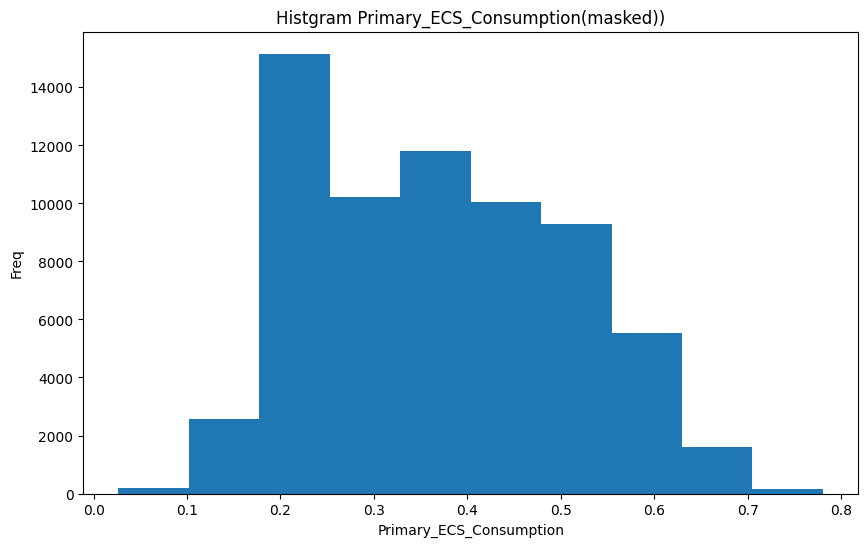

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for floor single noise

In this part, I want to explain that I have tried many DAE structures during these three weeks, including traditional DAEs using fully linked networks and DAEs using CNNs. None of these models had an imputation accuracy of more than 25% for the target column. So the DAE structure I present below is the best structure I have come up with after numerous attempts during these three weeks.

The final performance of the model is comparable to models trained and predicted using a dataset without missing values.

I have made major changes to the last DAE. At present, only the Encoder part is the same as the last DAE, and the idea of dimension increase is still retained. Because I have tried many times, the performance is always better than that after dimension reduction and then restoration. For this DAE, I adopted an integration method to improve the performance of the model, and divided the DAE decoder into different parts according to the data type. The composition of a single DAE is as follows:


1. Encoder, all Decoders share this encoder, and the encoder upgrades the data.
2. Decoder f1, decodes the target column Quality_insulation_lower_floor, and its last layer is a softmax network with 4 nodes.
3. Decoder f2, decodes Quality_insulation_envelope, and its last layer is a softmax network with 4 nodes.
4. Decoder f3, decodes Roof_insulation_(0/1), the last layer of which is a softmax network with 2 nodes.
5. Decoder f4, to decode the remaining continuous variables.


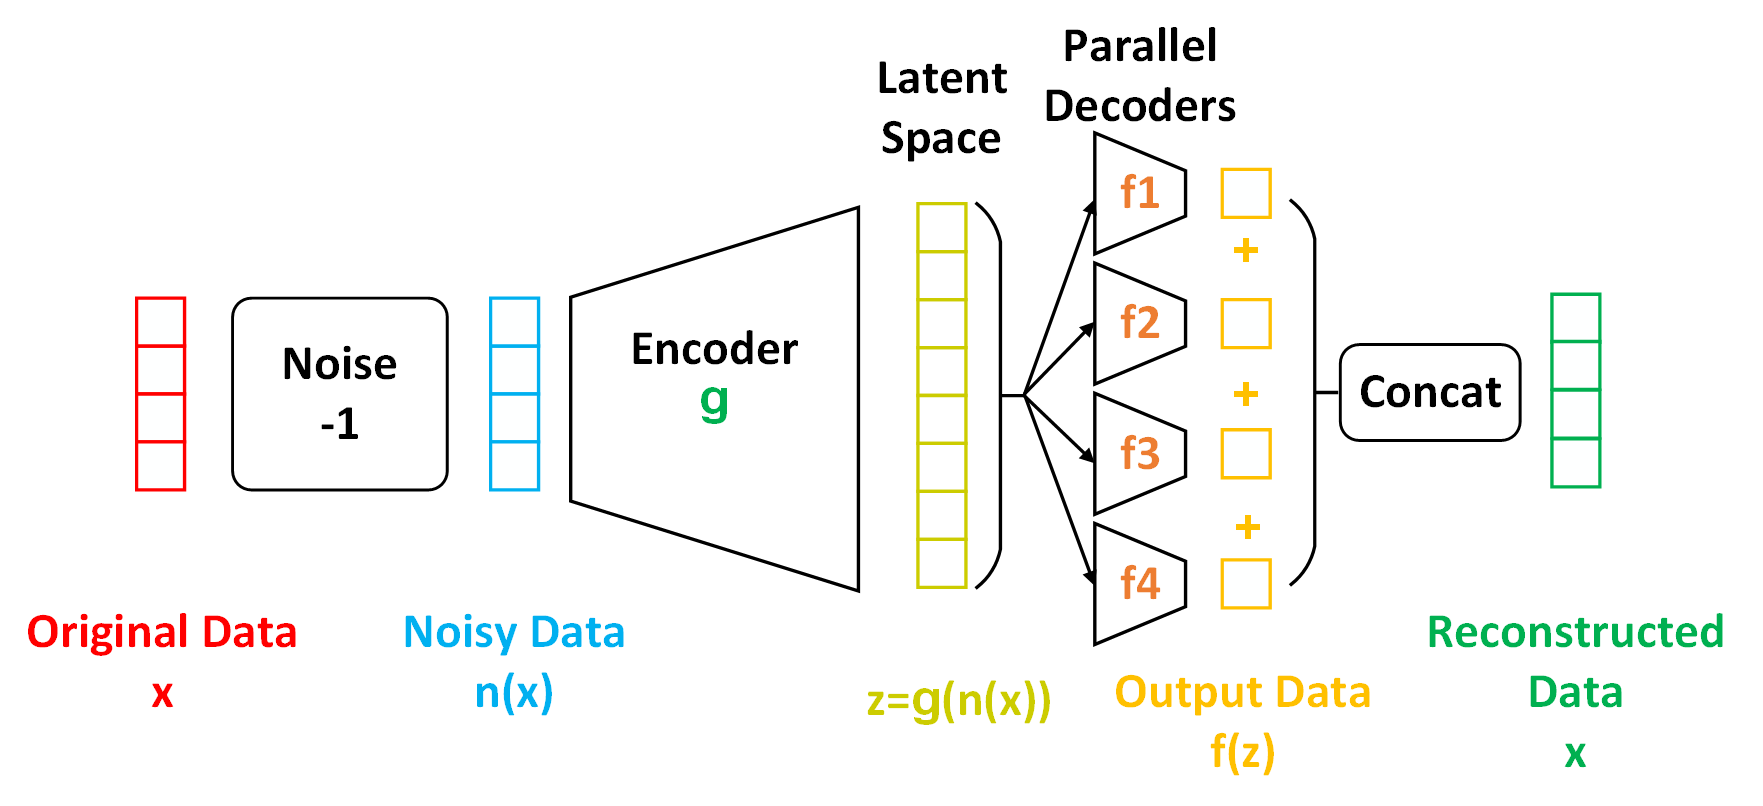




At the same time, in order to improve the performance of my model, I used the above DAE and trained three DAE networks under different activation functions to gain the advantage of the ensemble method. The three DAEs mainly use the activation functions Leaky_ReLU, Swish, and ELU.
The schematic diagram of the integration method is as follows:

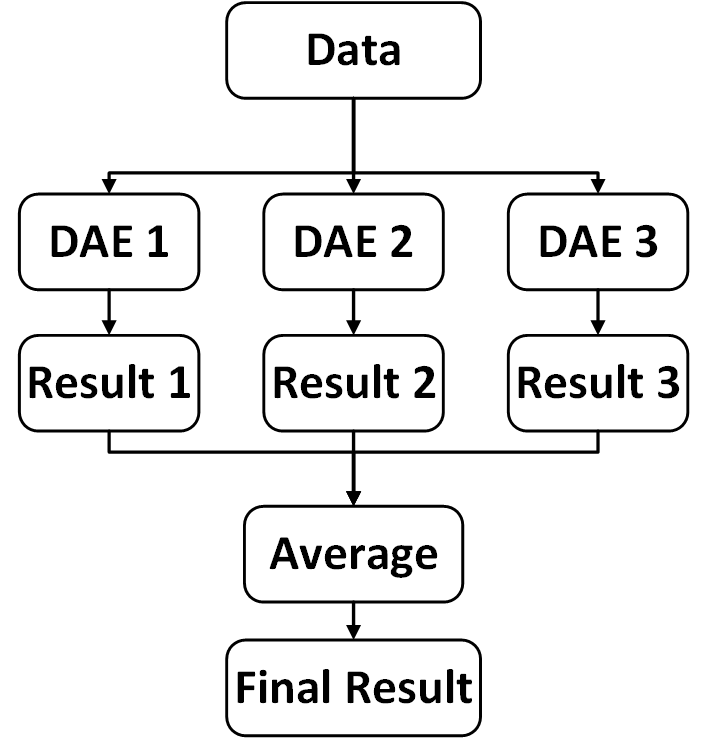

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                   863901.000000                863901.000000   
mean                         1.761512                     1.081326   
std                          1.142205                     1.143455   
min                          0.000000                     0.000000   
25%                          1.000000                     0.000000   
50%                          2.000000                     1.000000   
75%                          3.000000                     2.000000   
max                          3.000000                     3.000000   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count          863901.000000      863901.000000        863901.000000   
mean                0.575030           0.645630             0.406467   
std                 0.494339           0.202022             0.192926   
min                 0.000000           0.000000             0.000000   
25%                 0.000000           0.466667             0.261863   
50%                 1.000000           0.666667             0.388987   
75%                 1.000000           0.800000             0.521383   
max                 1.000000           1.000000             1.000000   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count      863901.000000          863901.000000                 863901.000000   
mean            0.530602               0.481110                      0.365648   
std             0.269561               0.178542                      0.208470   
min             0.000000               0.000000                      0.000000   
25%             0.312500               0.372595                      0.201893   
50%             0.572917               0.482622                      0.322844   
75%             0.770833               0.584081                      0.492773   
max             1.000000               1.000000                      1.000000   

       Losses_lower_floors  
count        863901.000000  
mean              0.233128  
std               0.219461  
min               0.000000  
25%               0.000000  
50%               0.204451  
75%               0.375522  
max               1.000000

In [ ]:
len(x_train)

863901

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 42s 11ms/step - loss: 1.0629
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8964
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8741
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8549
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8424
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 35s 10ms/step - loss: 0.8349
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8278
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 36s 11ms/step - loss: 0.8245
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 35s 11ms/step - loss: 0.8210
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 45s 11ms/step - loss: 1.0496
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8911
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4594
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8640
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8603
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 37s 11ms/step - loss: 0.8545
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8534
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8507
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8492
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 45s 12ms/step - loss: 0.9850
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8831
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8661
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 38s 11ms/step - loss: 0.8397
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8276
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 40s 12ms/step - loss: 0.8215
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8134
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.8004
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 39s 12ms/step - loss: 0.7927
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')

I added a Classifier constructed using MLP below. This classifier is trained on data without missing values and predicts the target column using data without missing values.

The purpose of my doing this is to use this classifier as a baseline model to judge the imputation performance of my DAE. If DAE can approach or reach the performance of MLP using the full data set for prediction, then the DAE model I constructed is meaningful.

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8670 - accuracy: 0.5894 - val_loss: 0.8382 - val_accuracy: 0.6020
Epoch 2/10
26997/26997 [==============================] - 64s 2ms/step - loss: 0.8249 - accuracy: 0.6097 - val_loss: 0.8161 - val_accuracy: 0.6109
Epoch 3/10
26997/26997 [==============================] - 65s 2ms/step - loss: 0.8066 - accuracy: 0.6177 - val_loss: 0.8021 - val_accuracy: 0.6187
Epoch 4/10
26997/26997 [==============================] - 66s 2ms/step - loss: 0.7946 - accuracy: 0.6226 - val_loss: 0.7908 - val_accuracy: 0.6262
Epoch 5/10
26997/26997 [==============================] - 71s 3ms/step - loss: 0.7876 - accuracy: 0.6245 - val_loss: 0.7880 - val_accuracy: 0.6216
Epoch 6/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.7840 - accuracy: 0.6252 - val_loss: 0.7987 - val_accuracy: 0.6173
Epoch 7/10
26997/26997 [==============================] - 71s 3ms/step - loss: 0.7817 - accuracy: 0.6262 - val_loss: 0

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


The following is my imputation performance results. I have listed the table to calculate the performance of the model. You can directly look at the table to observe the results.

In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_lower_floor'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6049727, shape=(), dtype=float32)
Loss: tf.Tensor(0.27291393, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.58952016, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.5988577, shape=(), dtype=float32)
Loss: tf.Tensor(0.2737684, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5712904, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5686864, shape=(), dtype=float32)
Loss: tf.Tensor(0.26152965, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6015495, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5241467, shape=(), dtype=float32)
Loss: tf.Tensor(0.249835, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.62795025, shape=(), dtype=float32)


<ipython-input-253-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.578025, shape=(), dtype=float32)
Loss: tf.Tensor(0.26203886, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5991742, shape=(), dtype=float32)


<ipython-input-254-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.52976793, shape=(), dtype=float32)
Loss: tf.Tensor(0.25246388, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6254969, shape=(), dtype=float32)


<ipython-input-254-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


By analyzing the above results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.598|0.591|0.558|0.562|
|total loss|0.279|0.350|0.339|0.303|
|target col acc|0.584|0.589|0.613|0.611|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10% (note that the missing rate of 10% is very close to the missing rate of the real dataset, and the missing rate of the target column in the real dataset 8.5%)

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.512|0.504|
|total loss|0.328|0.287|
|target col acc|0.638|0.642|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

At the same time, compared with the MLP classification network trained without missing values: the correct rate of the ensemble method is 0.6424, while the correct rate of the MLP classifier is 0.6342.

It should be noted that this MLP classifier is only trained for 10 rounds in the report, while DAE is trained for 50 rounds. However, when I tested the MLP alone, after the number of training rounds reached 50 rounds, the correct rate could not exceed 0.65.

Note that this MLP is trained without missing values and predicts target col using data without missing values. The DAE and ensemble methods used in the experiment can already achieve or even slightly exceed the effect of MLP. I think this result has some value.

In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_lower_floor')], 'Quality_insulation_lower_floor']

192300     3.0
3615450    3.0
3887846    2.0
3531871    3.0
1605559    0.0
          ... 
1025368    0.0
2992036    0.0
1004793    3.0
1817177    3.0
4150430    3.0
Name: Quality_insulation_lower_floor, Length: 43035, dtype: float64

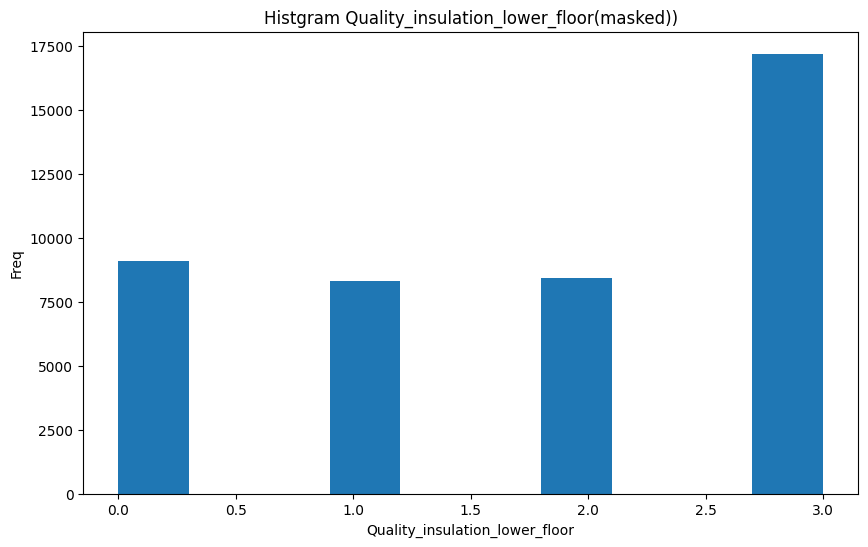

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_walls single noise

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
len(dae_dataset)

1940820

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_walls  Quality_insulation_envelope  \
count             970410.000000                970410.000000   
mean                   0.902570                     1.008407   
std                    1.061518                     1.126350   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     1.000000   
75%                    2.000000                     2.000000   
max                    3.000000                     3.000000   

       Year_construction  Living_area_housing  Postal_code_(BAN)  \
count      970410.000000        970410.000000      970410.000000   
mean            0.575744             0.422855           0.530620   
std             0.225716             0.199523           0.274332   
min             0.000000             0.001326           0.000000   
25%             0.384615             0.271883           0.312500   
50%             0.615385             0.411141           0.572917   
75%             0.769231             0.547745           0.770833   
max             1.000000             1.000000           1.000000   

       Final_ECS_Consumption  Primary_5_usages_consumption   Losses_walls  
count          970410.000000                 970410.000000  970410.000000  
mean                0.473272                      0.380946       0.202319  
std                 0.172156                      0.214968       0.197898  
min                 0.000000                      0.000879       0.000000  
25%                 0.367137                      0.211233       0.060629  
50%                 0.473573                      0.335070       0.132626  
75%                 0.571637                      0.515955       0.273967  
max                 1.000000                      0.999980       1.000000

In [ ]:
len(x_train)

970410

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 39s 9ms/step - loss: 0.7289
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 34s 9ms/step - loss: 0.6333
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.6101
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.6000
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5974
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5903
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5900
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5883
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 34s 9ms/step - loss: 0.5868
Noise Epoch 1/1, Iteration 10/20
3791/3791 [===========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 42s 10ms/step - loss: 0.7415
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.6366
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 36s 10ms/step - loss: 0.6213
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.6096
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.5961
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.5915
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5895
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.5846
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 36s 10ms/step - loss: 0.5808
Noise Epoch 1/1, Iteration 10/20
3791/3791 [=======

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 41s 9ms/step - loss: 0.6942
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.6204
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.5952
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 36s 9ms/step - loss: 1.4194
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 35s 9ms/step - loss: 1.6112
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 35s 9ms/step - loss: 1.6095
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 36s 9ms/step - loss: 1.6075
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 38s 10ms/step - loss: 0.7734
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.5724
Noise Epoch 1/1, Iteration 10/20
3791/3791 [=========

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_walls_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_walls_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_walls_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
30326/30326 [==============================] - 99s 3ms/step - loss: 0.7845 - accuracy: 0.6742 - val_loss: 0.7388 - val_accuracy: 0.6879
Epoch 2/10
30326/30326 [==============================] - 101s 3ms/step - loss: 0.7293 - accuracy: 0.6912 - val_loss: 0.7170 - val_accuracy: 0.6950
Epoch 3/10
30326/30326 [==============================] - 102s 3ms/step - loss: 0.7113 - accuracy: 0.6999 - val_loss: 0.7017 - val_accuracy: 0.7032
Epoch 4/10
30326/30326 [==============================] - 105s 3ms/step - loss: 0.6993 - accuracy: 0.7060 - val_loss: 0.6911 - val_accuracy: 0.7086
Epoch 5/10
30326/30326 [==============================] - 148s 5ms/step - loss: 0.6808 - accuracy: 0.7162 - val_loss: 0.6711 - val_accuracy: 0.7210
Epoch 6/10
30326/30326 [==============================] - 108s 4ms/step - loss: 0.6690 - accuracy: 0.7256 - val_loss: 0.6669 - val_accuracy: 0.7270
Epoch 7/10
30326/30326 [==============================] - 151s 5ms/step - loss: 0.6637 - accuracy: 0.7298 - val_l

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_walls'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.46421903, shape=(), dtype=float32)
Loss: tf.Tensor(0.24858323, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6851037, shape=(), dtype=float32)


<ipython-input-283-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.4448898, shape=(), dtype=float32)
Loss: tf.Tensor(0.239449, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.691183, shape=(), dtype=float32)


<ipython-input-283-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.45000955, shape=(), dtype=float32)
Loss: tf.Tensor(0.24055414, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6876638, shape=(), dtype=float32)


<ipython-input-283-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.42219776, shape=(), dtype=float32)
Loss: tf.Tensor(0.23053868, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7004925, shape=(), dtype=float32)


<ipython-input-283-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.44030088, shape=(), dtype=float32)
Loss: tf.Tensor(0.23779823, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6944656, shape=(), dtype=float32)


<ipython-input-284-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.41009063, shape=(), dtype=float32)
Loss: tf.Tensor(0.22864954, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.71054125, shape=(), dtype=float32)


<ipython-input-284-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_walls')], 'Quality_insulation_walls']

703189     2.0
2276003    2.0
608982     0.0
1210156    0.0
1761581    0.0
          ... 
345563     0.0
3240051    2.0
1129303    0.0
3541776    2.0
4126862    2.0
Name: Quality_insulation_walls, Length: 194391, dtype: float64

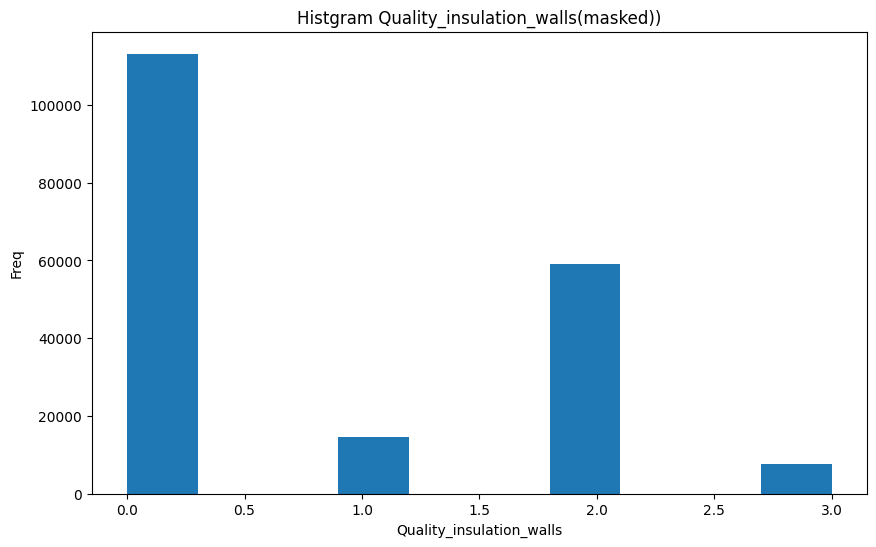

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_carpentry single noise

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(18, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
len(dae_dataset)

1834730

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# dataset and target column
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

# Identify the classes
classes = x_train[target_column].unique()

# Find the class with the smallest number of samples
min_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)

# Balance the classes
x_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],
                                       replace = False,    # sample without replacement
                                       n_samples = min_class_size,     # to match minority class
                                       random_state = 0) # reproducible results
                              for c in classes])

# Reset the index
x_train_balanced.reset_index(drop=True, inplace=True)
x_train = x_train_balanced
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.utils import resample\nimport pandas as pd\n\n# dataset and target column\ndae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers\ntarget_column = 'Quality_insulation_carpentry'\n\n# Divide the dataset into training and validation sets\nx_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)\nx_true = x_val.copy()\n\n# Identify the classes\nclasses = x_train[target_column].unique()\n\n# Find the class with the smallest number of samples\nmin_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)\n\n# Balance the classes\nx_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],\n                                       replace = False,    # sample without replacement\n                                       n_samples = min_class_size,     # to match minority class\n                                       random_state = 0) # reproduci

In [ ]:
len(x_train)

917365

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 39s 10ms/step - loss: 0.8161
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 34s 9ms/step - loss: 0.7331
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7212
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 33s 9ms/step - loss: 0.7199
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7089
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 37s 10ms/step - loss: 0.7109
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7070
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 36s 10ms/step - loss: 0.7036
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 36s 10ms/step - loss: 0.7053
Noise Epoch 1/1, Iteration 10/20
3584/3584 [====

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 39s 9ms/step - loss: 0.8253
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7462
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.7152
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 34s 10ms/step - loss: 0.7067
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 36s 10ms/step - loss: 0.7044
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 34s 10ms/step - loss: 0.6972
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6957
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 36s 10ms/step - loss: 0.6936
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6945
Noise Epoch 1/1, Iteration 10/20
3584/3584 [===

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 38s 9ms/step - loss: 0.7924
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 34s 9ms/step - loss: 0.7158
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 34s 9ms/step - loss: 0.6952
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6854
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6823
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 38s 10ms/step - loss: 0.6782
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6772
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.6764
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 36s 10ms/step - loss: 0.6746
Noise Epoch 1/1, Iteration 10/20
3584/3584 [=====

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_carpentry_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_carpentry_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_carpentry_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data=(x_test_clf, y_test_clf))


Epoch 1/5
28668/28668 [==============================] - 112s 4ms/step - loss: 0.9834 - accuracy: 0.5722 - val_loss: 0.9655 - val_accuracy: 0.5790
Epoch 2/5
28668/28668 [==============================] - 106s 4ms/step - loss: 0.9647 - accuracy: 0.5791 - val_loss: 0.9598 - val_accuracy: 0.5817
Epoch 3/5
28668/28668 [==============================] - 122s 4ms/step - loss: 0.9597 - accuracy: 0.5812 - val_loss: 0.9627 - val_accuracy: 0.5804
Epoch 4/5
28668/28668 [==============================] - 152s 5ms/step - loss: 0.9552 - accuracy: 0.5835 - val_loss: 0.9524 - val_accuracy: 0.5850
Epoch 5/5
28668/28668 [==============================] - 111s 4ms/step - loss: 0.9512 - accuracy: 0.5863 - val_loss: 0.9495 - val_accuracy: 0.5855


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_carpentry'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.58399785, shape=(), dtype=float32)
Loss: tf.Tensor(0.2708332, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.52710056, shape=(), dtype=float32)


<ipython-input-312-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.5266811, shape=(), dtype=float32)
Loss: tf.Tensor(0.2574249, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5587225, shape=(), dtype=float32)


<ipython-input-312-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5294401, shape=(), dtype=float32)
Loss: tf.Tensor(0.25181288, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56230205, shape=(), dtype=float32)


<ipython-input-312-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5027998, shape=(), dtype=float32)
Loss: tf.Tensor(0.24378192, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.580353, shape=(), dtype=float32)


<ipython-input-312-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5293322, shape=(), dtype=float32)
Loss: tf.Tensor(0.25438, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5621441, shape=(), dtype=float32)


<ipython-input-313-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.50642556, shape=(), dtype=float32)
Loss: tf.Tensor(0.24710509, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57637095, shape=(), dtype=float32)


<ipython-input-313-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_carpentry')], 'Quality_insulation_carpentry']

3376943    1.0
900431     1.0
3085921    1.0
685868     1.0
1015998    1.0
          ... 
1364864    1.0
30753      1.0
1042681    1.0
818883     1.0
241886     1.0
Name: Quality_insulation_carpentry, Length: 183963, dtype: float64

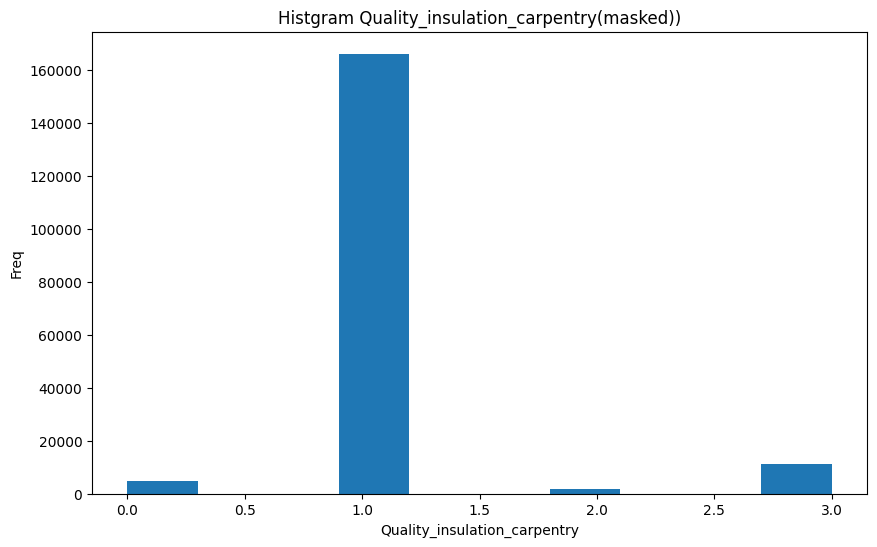

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_upper_floor_roof_terrace single noise

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_upper_floor_roof_terrace  \
count                                148822.000000   
mean                                      1.205581   
std                                       1.294332   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                       3.000000   

       Quality_insulation_envelope  Roof_insulation_(0/1)  Year_construction  \
count                148822.000000           148822.00000      148822.000000   
mean                      1.064426                0.78305           0.649285   
std                       1.108516                0.41217           0.207831   
min                       0.000000                0.00000           0.000000   
25%                       0.000000                1.00000           0.466667   
50%                       1.000000                1.00000           0.666667   
75%                       2.000000                1.00000           0.800000   
max                       3.000000                1.00000           1.000000   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count        148822.000000      148822.000000          148822.000000   
mean              0.418883           0.551313               0.475572   
std               0.191705           0.278161               0.179310   
min               0.000000           0.000000               0.000000   
25%               0.283259           0.333333               0.366148   
50%               0.402928           0.604167               0.468013   
75%               0.525780           0.781250               0.572477   
max               1.000000           1.000000               1.000000   

       Primary_5_usages_consumption  
count                 148822.000000  
mean                       0.354479  
std                        0.215750  
min                        0.000000  
25%                        0.186964  
50%                        0.300377  
75%                        0.482204  
max                        1.000000

In [ ]:
len(x_train)

148822

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 14s 11ms/step - loss: 1.2843
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8772
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8681
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 7s 12ms/step - loss: 0.9078
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8525
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8453
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8397
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8332
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 7s 13ms/step - loss: 0.8277
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 14s 12ms/step - loss: 1.4844
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8871
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8716
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8696
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8624
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8581
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8659
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8484
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8439
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 13s 11ms/step - loss: 1.1370
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 0.9075
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8583
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8478
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8373
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 11ms/step - loss: 0.8421
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8337
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 12ms/step - loss: 0.8263
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 7s 11ms/step - loss: 0.8242
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
4651/4651 [==============================] - 15s 3ms/step - loss: 1.0270 - accuracy: 0.5834 - val_loss: 0.9940 - val_accuracy: 0.5850
Epoch 2/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9781 - accuracy: 0.6025 - val_loss: 0.9690 - val_accuracy: 0.6109
Epoch 3/10
4651/4651 [==============================] - 15s 3ms/step - loss: 0.9673 - accuracy: 0.6088 - val_loss: 0.9605 - val_accuracy: 0.6145
Epoch 4/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9588 - accuracy: 0.6149 - val_loss: 0.9520 - val_accuracy: 0.6201
Epoch 5/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9485 - accuracy: 0.6238 - val_loss: 0.9404 - val_accuracy: 0.6333
Epoch 6/10
4651/4651 [==============================] - 15s 3ms/step - loss: 0.9347 - accuracy: 0.6322 - val_loss: 0.9264 - val_accuracy: 0.6370
Epoch 7/10
4651/4651 [==============================] - 14s 3ms/step - loss: 0.9204 - accuracy: 0.6390 - val_loss: 0.9122 - val_ac

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.77989274, shape=(), dtype=float32)
Loss: tf.Tensor(0.32147506, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.613941, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.93012404, shape=(), dtype=float32)
Loss: tf.Tensor(0.33267924, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5655421, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.90030986, shape=(), dtype=float32)
Loss: tf.Tensor(0.33234558, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57308364, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.88205403, shape=(), dtype=float32)
Loss: tf.Tensor(0.32848695, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5790318, shape=(), dtype=float32)


<ipython-input-342-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.82884204, shape=(), dtype=float32)
Loss: tf.Tensor(0.31938615, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.59324974, shape=(), dtype=float32)


<ipython-input-343-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.82300884, shape=(), dtype=float32)
Loss: tf.Tensor(0.31085962, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.60579246, shape=(), dtype=float32)


<ipython-input-343-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_upper_floor_roof_terrace')], 'Quality_insulation_upper_floor_roof_terrace']

3833774    0.0
2646308    0.0
2056320    0.0
615092     0.0
3835703    0.0
          ... 
827324     0.0
1624091    0.0
1635658    0.0
3646983    0.0
3655147    0.0
Name: Quality_insulation_upper_floor_roof_terrace, Length: 7460, dtype: float64

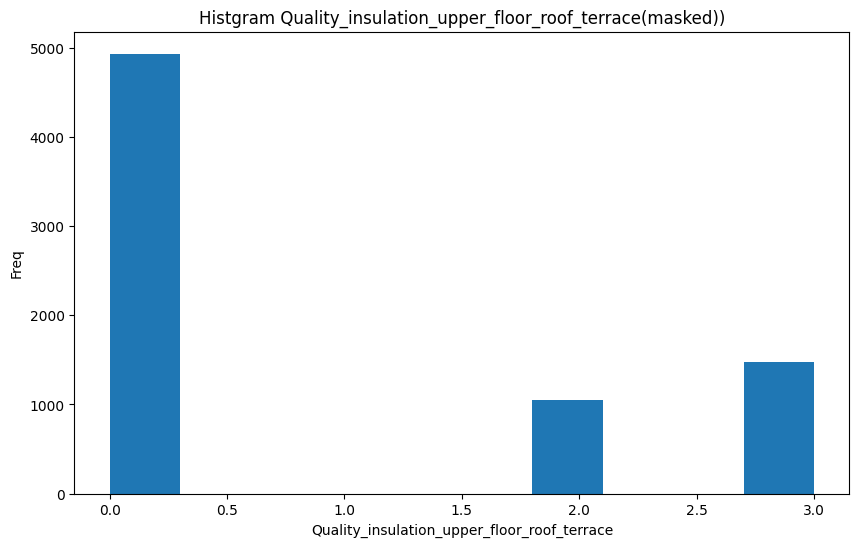

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for ECS single noise

It's important to note that when calculating the imputation accuracy for the ECS feature, I normalized the ECS data to fall within the [0, 1] range. Any error within ±0.03 was considered as a correct imputation.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(1, activation='elu')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_continuous_target = y_true[:, 0]
    y_true_categorical_1 = y_true[:, 1]
    y_true_continuous = y_true[:, 2:]

    y_pred_continuous_target = y_pred[:, 0:1]
    y_pred_categorical_1 = y_pred[:, 1:5]
    y_pred_continuous = y_pred[:, 5:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)

    # Use mean squared error for the continuous variables.
    continuous_target_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous_target, y_pred_continuous_target)
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + continuous_target_loss + continuous_loss

In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
len(dae_dataset)

1657443

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Primary_ECS_Consumption  Type_main_energy_ECS  Year_construction  \
count             1.325954e+06          1.325954e+06       1.325954e+06   
mean              3.771437e-01          6.462999e-01       5.017834e-01   
std               1.675623e-01          5.950492e-01       1.543359e-01   
min               0.000000e+00          0.000000e+00       0.000000e+00   
25%               2.363497e-01          0.000000e+00       3.684211e-01   
50%               3.612812e-01          1.000000e+00       5.263158e-01   
75%               5.111698e-01          1.000000e+00       6.315789e-01   
max               1.000000e+00          3.000000e+00       1.000000e+00   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count         1.325954e+06       1.325954e+06           1.325954e+06   
mean          4.249033e-01      -4.740429e-02           4.706429e-01   
std           1.947660e-01       9.811603e-01           1.680849e-01   
min           1.349528e-03      -1.965726e+00           0.000000e+00   
25%           2.827260e-01      -8.514078e-01           3.670168e-01   
50%           4.149798e-01       7.719066e-02           4.730422e-01   
75%           5.445344e-01       7.829255e-01           5.699281e-01   
max           1.000000e+00       1.600092e+00           1.000000e+00   

       Primary_5_usages_consumption  Final_consumption_ECS_generator_no1  
count                  1.325954e+06                         1.325954e+06  
mean                   3.793450e-01                         4.884689e-01  
std                    2.131845e-01                         1.666881e-01  
min                    0.000000e+00                         4.430824e-04  
25%                    2.127129e-01                         3.851124e-01  
50%                    3.337159e-01                         4.919322e-01  
75%                    5.089282e-01                         5.872318e-01  
max                    1.000000e+00                         1.000000e+00

In [ ]:
len(x_train)

1325954

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 57s 10ms/step - loss: 0.2443
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 53s 10ms/step - loss: 0.1687
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1633
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 53s 10ms/step - loss: 0.1611
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.1595
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.1582
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1575
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1568
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1562
Noise Epoch 1/1, Iteration 10/20
5180/5180 [=====

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 61s 11ms/step - loss: 0.2891
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.2168
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.2763
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.4427
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 55s 11ms/step - loss: 0.4426
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.4388
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.4372
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.4356
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 54s 10ms/step - loss: 0.4347
Noise Epoch 1/1, Iteration 10/20
5180/5180 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 53s 9ms/step - loss: 0.2488
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1840
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1734
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.1682
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1661
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1650
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1638
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1634
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1632
Noise Epoch 1/1, Iteration 10/20
5180/5180 [=======

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data = (x_test_clf, y_test_clf))


Epoch 1/5
41437/41437 [==============================] - 99s 2ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 2/5
41437/41437 [==============================] - 95s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 3/5
41437/41437 [==============================] - 93s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/5
41437/41437 [==============================] - 94s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 5/5
41437/41437 [==============================] - 96s 2ms/step - loss: 0.0040 - val_loss: 0.0040


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_continuous_target = dae_output[:, 0:1]
    dae_output_categorical_1 = tf.argmax(dae_output[:, 1:5], 1)
    dae_output_continuous = dae_output[:, 5:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_continuous_target, dae_output_categorical_1, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Primary_ECS_Consumption'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.047268428, shape=(), dtype=float32)
Loss: tf.Tensor(0.1837097, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.681925, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.046528034, shape=(), dtype=float32)
Loss: tf.Tensor(0.18433894, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7233427, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.048986696, shape=(), dtype=float32)
Loss: tf.Tensor(0.18149936, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.66498137, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.03426108, shape=(), dtype=float32)
Loss: tf.Tensor(0.1720947, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7805639, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.04427619, shape=(), dtype=float32)
Loss: tf.Tensor(0.17977962, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7100099, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.03158977, shape=(), dtype=float32)
Loss: tf.Tensor(0.17242146, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.8104688, shape=(), dtype=float32)


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Primary_ECS_Consumption')], 'Primary_ECS_Consumption']

4253017    0.295532
3250715    0.496466
901538     0.484477
1994540    0.341061
1875243    0.428653
             ...   
4164421    0.443612
2120127    0.219531
2400653    0.528181
4102836    0.228581
3037385    0.160612
Name: Primary_ECS_Consumption, Length: 66390, dtype: float64

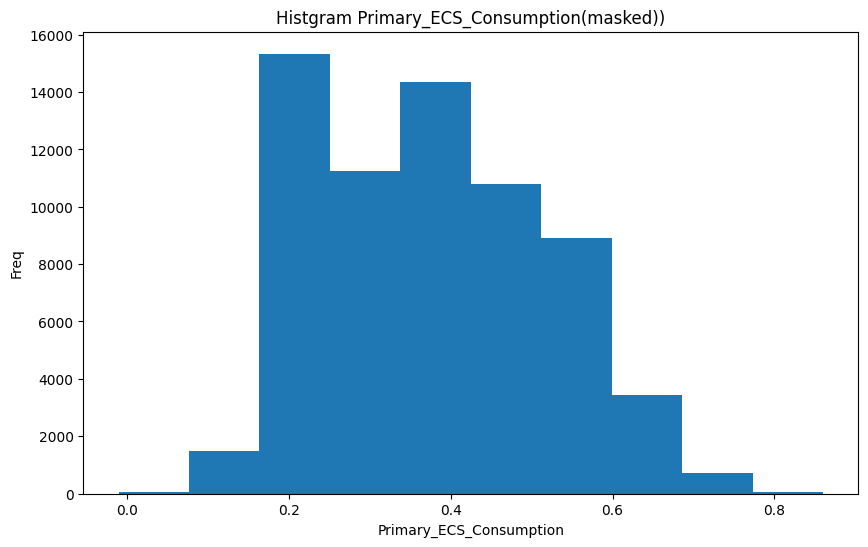

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# weighted loss fuction

# DAE for floor single noise weighted loss fuction

In this part, I want to explain that I have tried many DAE structures during these three weeks, including traditional DAEs using fully linked networks and DAEs using CNNs. None of these models had an imputation accuracy of more than 25% for the target column. So the DAE structure I present below is the best structure I have come up with after numerous attempts during these three weeks.

The final performance of the model is comparable to models trained and predicted using a dataset without missing values.

I have made major changes to the last DAE. At present, only the Encoder part is the same as the last DAE, and the idea of dimension increase is still retained. Because I have tried many times, the performance is always better than that after dimension reduction and then restoration. For this DAE, I adopted an integration method to improve the performance of the model, and divided the DAE decoder into different parts according to the data type. The composition of a single DAE is as follows:


1. Encoder, all Decoders share this encoder, and the encoder upgrades the data.
2. Decoder f1, decodes the target column Quality_insulation_lower_floor, and its last layer is a softmax network with 4 nodes.
3. Decoder f2, decodes Quality_insulation_envelope, and its last layer is a softmax network with 4 nodes.
4. Decoder f3, decodes Roof_insulation_(0/1), the last layer of which is a softmax network with 2 nodes.
5. Decoder f4, to decode the remaining continuous variables.


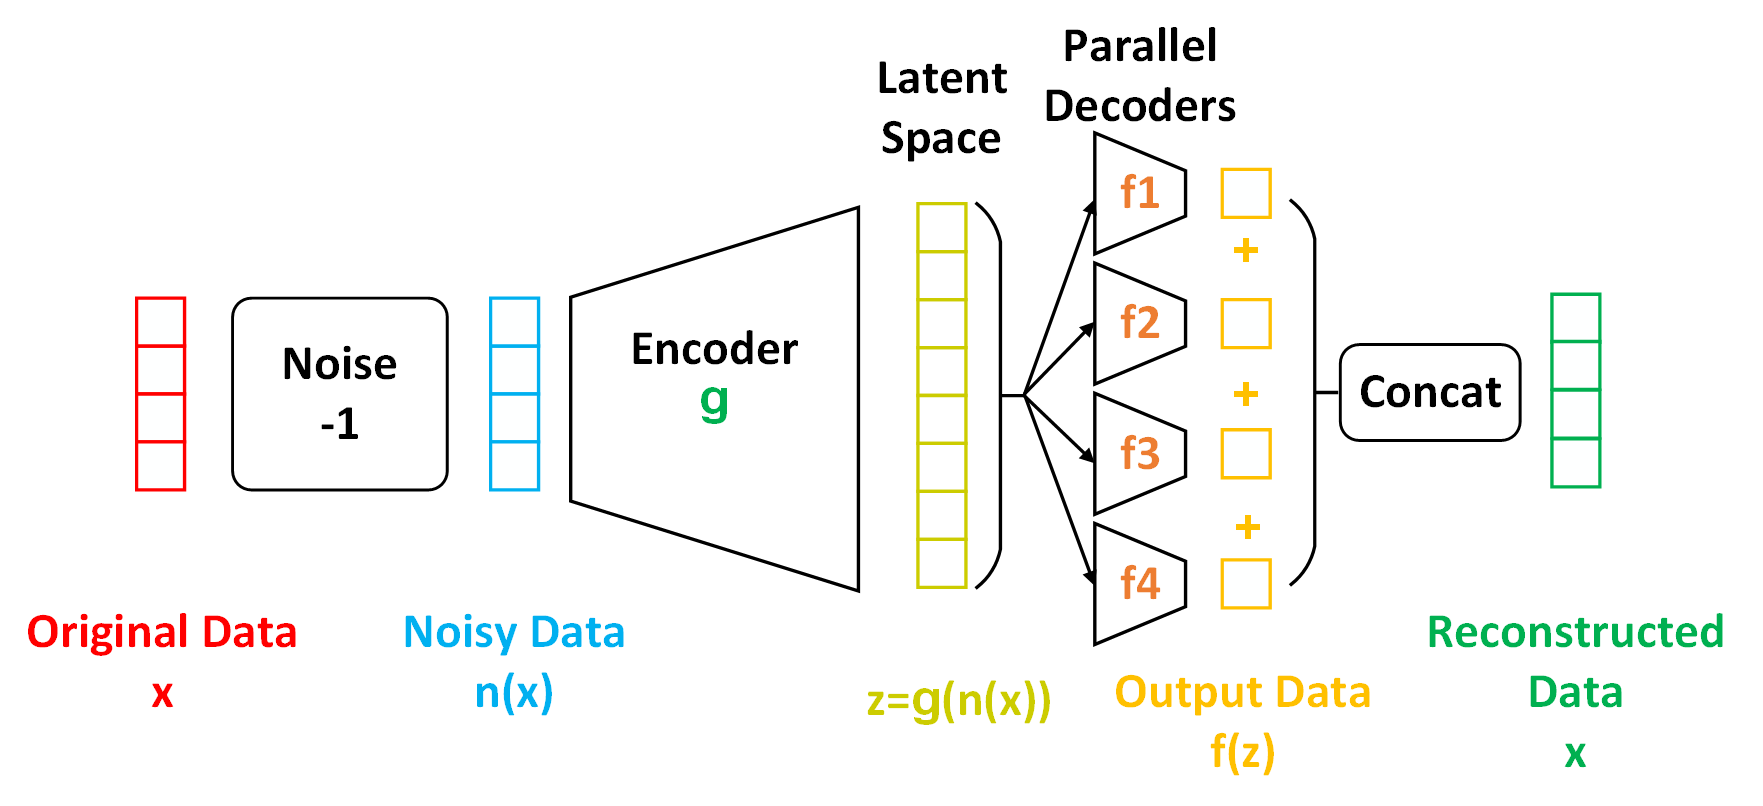




At the same time, in order to improve the performance of my model, I used the above DAE and trained three DAE networks under different activation functions to gain the advantage of the ensemble method. The three DAEs mainly use the activation functions Leaky_ReLU, Swish, and ELU.
The schematic diagram of the integration method is as follows:

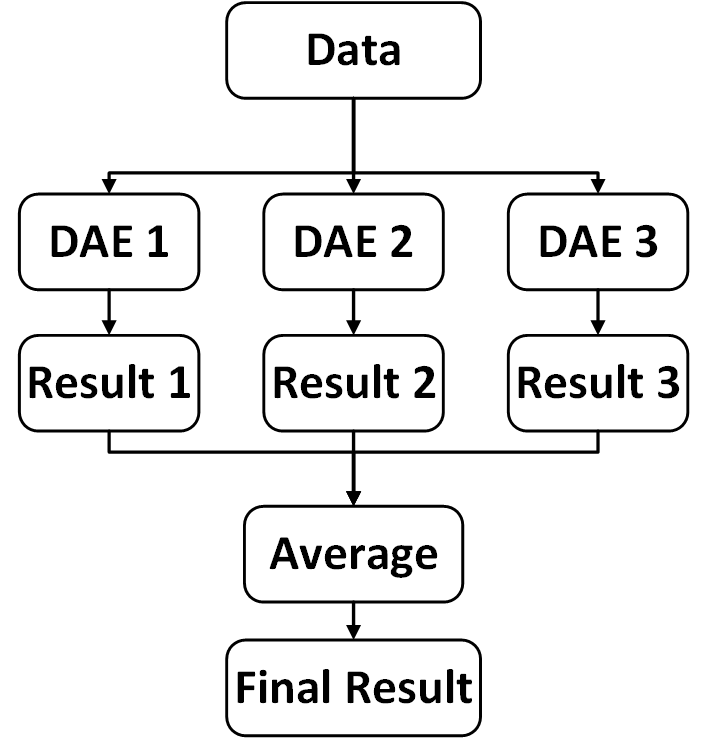

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return 3 * categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_floor_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_lower_floor'

In [ ]:
len(dae_dataset)

1079877

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_lower_floor  Quality_insulation_envelope  \
count                   863901.000000                863901.000000   
mean                         1.761512                     1.081326   
std                          1.142205                     1.143455   
min                          0.000000                     0.000000   
25%                          1.000000                     0.000000   
50%                          2.000000                     1.000000   
75%                          3.000000                     2.000000   
max                          3.000000                     3.000000   

       Roof_insulation_(0/1)  Year_construction  Living_area_housing  \
count          863901.000000      863901.000000        863901.000000   
mean                0.575030           0.645630             0.406467   
std                 0.494339           0.202022             0.192926   
min                 0.000000           0.000000             0.000000   
25%                 0.000000           0.466667             0.261863   
50%                 1.000000           0.666667             0.388987   
75%                 1.000000           0.800000             0.521383   
max                 1.000000           1.000000             1.000000   

       Postal_code_(BAN)  Final_ECS_Consumption  Primary_5_usages_consumption  \
count      863901.000000          863901.000000                 863901.000000   
mean            0.530602               0.481110                      0.365648   
std             0.269561               0.178542                      0.208470   
min             0.000000               0.000000                      0.000000   
25%             0.312500               0.372595                      0.201893   
50%             0.572917               0.482622                      0.322844   
75%             0.770833               0.584081                      0.492773   
max             1.000000               1.000000                      1.000000   

       Losses_lower_floors  
count        863901.000000  
mean              0.233128  
std               0.219461  
min               0.000000  
25%               0.000000  
50%               0.204451  
75%               0.375522  
max               1.000000

In [ ]:
len(x_train)

863901

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 43s 11ms/step - loss: 1.7809
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.5429
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.5344
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.5030
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.5028
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 36s 11ms/step - loss: 1.4856
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 36s 11ms/step - loss: 1.4777
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4742
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 40s 12ms/step - loss: 1.4679
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 45s 11ms/step - loss: 1.8191
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 39s 11ms/step - loss: 1.5854
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.5424
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.5202
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 39s 11ms/step - loss: 1.5079
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.5007
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.4750
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 39s 11ms/step - loss: 1.4516
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.4359
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3375/3375 [==============================] - 44s 11ms/step - loss: 1.6832
Noise Epoch 1/1, Iteration 2/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.5322
Noise Epoch 1/1, Iteration 3/20
3375/3375 [==============================] - 38s 11ms/step - loss: 1.4839
Noise Epoch 1/1, Iteration 4/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4809
Noise Epoch 1/1, Iteration 5/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4499
Noise Epoch 1/1, Iteration 6/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4420
Noise Epoch 1/1, Iteration 7/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4332
Noise Epoch 1/1, Iteration 8/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4297
Noise Epoch 1/1, Iteration 9/20
3375/3375 [==============================] - 37s 11ms/step - loss: 1.4285
Noise Epoch 1/1, Iteration 10/20
3375/3375 [==

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_leaky_relu_128_epoch50_insulation_floor_dataset1.h5')

I added a Classifier constructed using MLP below. This classifier is trained on data without missing values and predicts the target column using data without missing values.

The purpose of my doing this is to use this classifier as a baseline model to judge the imputation performance of my DAE. If DAE can approach or reach the performance of MLP using the full data set for prediction, then the DAE model I constructed is meaningful.

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
26997/26997 [==============================] - 67s 2ms/step - loss: 0.8524 - accuracy: 0.5977 - val_loss: 0.8197 - val_accuracy: 0.6141
Epoch 2/10
26997/26997 [==============================] - 66s 2ms/step - loss: 0.8162 - accuracy: 0.6152 - val_loss: 0.8182 - val_accuracy: 0.6129
Epoch 3/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.8111 - accuracy: 0.6142 - val_loss: 0.8086 - val_accuracy: 0.6154
Epoch 4/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.8083 - accuracy: 0.6125 - val_loss: 0.8083 - val_accuracy: 0.6071
Epoch 5/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.8062 - accuracy: 0.6113 - val_loss: 0.8061 - val_accuracy: 0.6072
Epoch 6/10
26997/26997 [==============================] - 70s 3ms/step - loss: 0.8041 - accuracy: 0.6117 - val_loss: 0.8052 - val_accuracy: 0.6090
Epoch 7/10
26997/26997 [==============================] - 68s 3ms/step - loss: 0.8022 - accuracy: 0.6141 - val_loss: 0

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


The following is my imputation performance results. I have listed the table to calculate the performance of the model. You can directly look at the table to observe the results.

In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_lower_floor'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.6260125, shape=(), dtype=float32)
Loss: tf.Tensor(0.2776218, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5751619, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.59646636, shape=(), dtype=float32)
Loss: tf.Tensor(0.275703, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5787284, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5881412, shape=(), dtype=float32)
Loss: tf.Tensor(0.27080885, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5970457, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.53844017, shape=(), dtype=float32)
Loss: tf.Tensor(0.2578642, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6203164, shape=(), dtype=float32)


<ipython-input-180-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5884931, shape=(), dtype=float32)
Loss: tf.Tensor(0.26602313, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.59654427, shape=(), dtype=float32)


<ipython-input-181-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5347369, shape=(), dtype=float32)
Loss: tf.Tensor(0.253645, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6245767, shape=(), dtype=float32)


<ipython-input-181-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


By analyzing the above results, we can see that DAE3 and ensemble are the best

In the case of a missing rate of 20%, the performance of each model is as follows:

| metrics |DAE1|DAE2|DAE3|Ensemble|
|----|----|----|----|--------|
|target col loss|0.598|0.591|0.558|0.562|
|total loss|0.279|0.350|0.339|0.303|
|target col acc|0.584|0.589|0.613|0.611|


Since DAE3 and ensemble performed best, we tested the imputation accuracy at a missing rate of 10% (note that the missing rate of 10% is very close to the missing rate of the real dataset, and the missing rate of the target column in the real dataset 8.5%)

| metrics |DAE3|Ensemble|
|----|-----|--------|
|target col loss|0.512|0.504|
|total loss|0.328|0.287|
|target col acc|0.638|0.642|

As can be seen from the above experimental results, the best model is ensemble. When the missing rate is 10%, it exceeds DAE3 in three different metrics.

At the same time, compared with the MLP classification network trained without missing values: the correct rate of the ensemble method is 0.6424, while the correct rate of the MLP classifier is 0.6342.

It should be noted that this MLP classifier is only trained for 10 rounds in the report, while DAE is trained for 50 rounds. However, when I tested the MLP alone, after the number of training rounds reached 50 rounds, the correct rate could not exceed 0.65.

Note that this MLP is trained without missing values and predicts target col using data without missing values. The DAE and ensemble methods used in the experiment can already achieve or even slightly exceed the effect of MLP. I think this result has some value.

In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_lower_floor')], 'Quality_insulation_lower_floor']

3191513    2.0
2346849    2.0
3615450    3.0
3887846    2.0
1209278    2.0
          ... 
452932     3.0
4206864    3.0
350979     2.0
1817177    0.0
4150430    3.0
Name: Quality_insulation_lower_floor, Length: 43087, dtype: float64

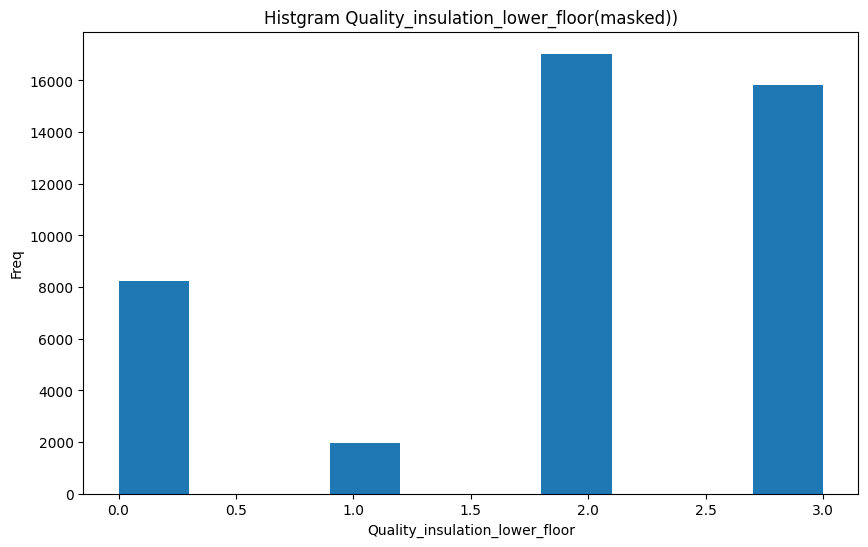

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_walls single noise weighted loss fuction

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return 2 * categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_walls_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_walls'

In [ ]:
len(dae_dataset)

1940820

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_walls  Quality_insulation_envelope  \
count             970410.000000                970410.000000   
mean                   0.902570                     1.008407   
std                    1.061518                     1.126350   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     1.000000   
75%                    2.000000                     2.000000   
max                    3.000000                     3.000000   

       Year_construction  Living_area_housing  Postal_code_(BAN)  \
count      970410.000000        970410.000000      970410.000000   
mean            0.575744             0.422855           0.530620   
std             0.225716             0.199523           0.274332   
min             0.000000             0.001326           0.000000   
25%             0.384615             0.271883           0.312500   
50%             0.615385             0.411141           0.572917   
75%             0.769231             0.547745           0.770833   
max             1.000000             1.000000           1.000000   

       Final_ECS_Consumption  Primary_5_usages_consumption   Losses_walls  
count          970410.000000                 970410.000000  970410.000000  
mean                0.473272                      0.380946       0.202319  
std                 0.172156                      0.214968       0.197898  
min                 0.000000                      0.000879       0.000000  
25%                 0.367137                      0.211233       0.060629  
50%                 0.473573                      0.335070       0.132626  
75%                 0.571637                      0.515955       0.273967  
max                 1.000000                      0.999980       1.000000

In [ ]:
len(x_train)

970410

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 40s 9ms/step - loss: 2.1727
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 36s 9ms/step - loss: 2.7898
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.8666
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.8574
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 36s 10ms/step - loss: 0.8518
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8507
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.8484
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8471
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8508
Noise Epoch 1/1, Iteration 10/20
3791/3791 [==========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 42s 10ms/step - loss: 1.0782
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.9399
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.9050
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8708
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8529
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8403
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8338
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8306
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 39s 10ms/step - loss: 0.8281
Noise Epoch 1/1, Iteration 10/20
3791/3791 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3791/3791 [==============================] - 42s 10ms/step - loss: 0.9984
Noise Epoch 1/1, Iteration 2/20
3791/3791 [==============================] - 37s 10ms/step - loss: 0.8775
Noise Epoch 1/1, Iteration 3/20
3791/3791 [==============================] - 46s 12ms/step - loss: 0.8479
Noise Epoch 1/1, Iteration 4/20
3791/3791 [==============================] - 35s 9ms/step - loss: 0.8329
Noise Epoch 1/1, Iteration 5/20
3791/3791 [==============================] - 38s 10ms/step - loss: 0.8268
Noise Epoch 1/1, Iteration 6/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8263
Noise Epoch 1/1, Iteration 7/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8265
Noise Epoch 1/1, Iteration 8/20
3791/3791 [==============================] - 36s 9ms/step - loss: 0.8204
Noise Epoch 1/1, Iteration 9/20
3791/3791 [==============================] - 36s 10ms/step - loss: 0.8190
Noise Epoch 1/1, Iteration 10/20
3791/3791 [======

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_walls_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_walls_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_walls_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
30326/30326 [==============================] - 104s 3ms/step - loss: 0.7782 - accuracy: 0.6776 - val_loss: 0.7226 - val_accuracy: 0.6948
Epoch 2/10
30326/30326 [==============================] - 104s 3ms/step - loss: 0.7129 - accuracy: 0.6984 - val_loss: 0.6996 - val_accuracy: 0.7069
Epoch 3/10
30326/30326 [==============================] - 104s 3ms/step - loss: 0.6944 - accuracy: 0.7081 - val_loss: 0.6860 - val_accuracy: 0.7151
Epoch 4/10
30326/30326 [==============================] - 105s 3ms/step - loss: 0.6814 - accuracy: 0.7183 - val_loss: 0.6764 - val_accuracy: 0.7221
Epoch 5/10
30326/30326 [==============================] - 105s 3ms/step - loss: 0.6710 - accuracy: 0.7255 - val_loss: 0.6683 - val_accuracy: 0.7249
Epoch 6/10
30326/30326 [==============================] - 107s 4ms/step - loss: 0.6619 - accuracy: 0.7305 - val_loss: 0.6583 - val_accuracy: 0.7318
Epoch 7/10
30326/30326 [==============================] - 107s 4ms/step - loss: 0.6566 - accuracy: 0.7331 - val_

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_walls'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.48707944, shape=(), dtype=float32)
Loss: tf.Tensor(0.2571301, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6800182, shape=(), dtype=float32)


<ipython-input-210-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.45555475, shape=(), dtype=float32)
Loss: tf.Tensor(0.24312694, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6900346, shape=(), dtype=float32)


<ipython-input-210-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.43395585, shape=(), dtype=float32)
Loss: tf.Tensor(0.2367955, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.70030653, shape=(), dtype=float32)


<ipython-input-210-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.4096199, shape=(), dtype=float32)
Loss: tf.Tensor(0.22867295, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7119083, shape=(), dtype=float32)


<ipython-input-210-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.4440024, shape=(), dtype=float32)
Loss: tf.Tensor(0.24084948, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6997231, shape=(), dtype=float32)


<ipython-input-211-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.41442177, shape=(), dtype=float32)
Loss: tf.Tensor(0.2322426, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.71378547, shape=(), dtype=float32)


<ipython-input-211-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_walls')], 'Quality_insulation_walls']

3063891    0.0
2276003    2.0
1610180    0.0
1210156    0.0
3967644    0.0
          ... 
3811301    0.0
3399920    0.0
808308     2.0
4126862    2.0
1261935    3.0
Name: Quality_insulation_walls, Length: 193761, dtype: float64

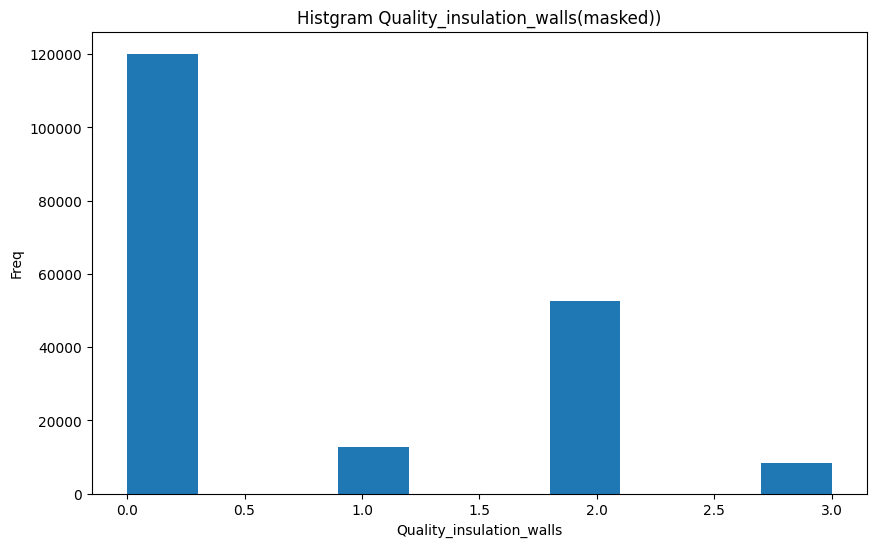

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_carpentry single noise weighted loss fuction

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(18, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_true_continuous = y_true[:, 2:]
    y_pred_continuous = y_pred[:, 8:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return 2 * categorical_loss_1 + categorical_loss_2  + continuous_loss

In [ ]:
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

In [ ]:
len(dae_dataset)

1834730

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# dataset and target column
dae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_carpentry'

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)
x_true = x_val.copy()

# Identify the classes
classes = x_train[target_column].unique()

# Find the class with the smallest number of samples
min_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)

# Balance the classes
x_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],
                                       replace = False,    # sample without replacement
                                       n_samples = min_class_size,     # to match minority class
                                       random_state = 0) # reproducible results
                              for c in classes])

# Reset the index
x_train_balanced.reset_index(drop=True, inplace=True)
x_train = x_train_balanced
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.utils import resample\nimport pandas as pd\n\n# dataset and target column\ndae_dataset = df_insulation_carpentry_encoded_no_missing_values_outliers\ntarget_column = 'Quality_insulation_carpentry'\n\n# Divide the dataset into training and validation sets\nx_train, x_val = train_test_split(dae_dataset, test_size = 0.5, random_state = 1)\nx_true = x_val.copy()\n\n# Identify the classes\nclasses = x_train[target_column].unique()\n\n# Find the class with the smallest number of samples\nmin_class_size = min(x_train[x_train[target_column] == c].shape[0] for c in classes)\n\n# Balance the classes\nx_train_balanced = pd.concat([resample(x_train[x_train[target_column] == c],\n                                       replace = False,    # sample without replacement\n                                       n_samples = min_class_size,     # to match minority class\n                                       random_state = 0) # reproduci

In [ ]:
len(x_train)

917365

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 40s 10ms/step - loss: 1.1995
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 33s 9ms/step - loss: 1.0937
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 34s 9ms/step - loss: 1.0731
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 33s 9ms/step - loss: 1.0586
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 34s 9ms/step - loss: 1.0469
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 34s 9ms/step - loss: 1.0440
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 33s 9ms/step - loss: 1.0415
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 33s 9ms/step - loss: 1.0420
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 33s 9ms/step - loss: 1.0385
Noise Epoch 1/1, Iteration 10/20
3584/3584 [==========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 42s 10ms/step - loss: 1.2090
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0957
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 35s 10ms/step - loss: 1.0840
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0780
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0681
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 35s 10ms/step - loss: 1.0552
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0516
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0471
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 35s 10ms/step - loss: 1.0441
Noise Epoch 1/1, Iteration 10/20
3584/3584 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 2, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
3584/3584 [==============================] - 39s 10ms/step - loss: 1.1762
Noise Epoch 1/1, Iteration 2/20
3584/3584 [==============================] - 35s 10ms/step - loss: 1.0747
Noise Epoch 1/1, Iteration 3/20
3584/3584 [==============================] - 36s 10ms/step - loss: 1.0563
Noise Epoch 1/1, Iteration 4/20
3584/3584 [==============================] - 34s 10ms/step - loss: 1.0324
Noise Epoch 1/1, Iteration 5/20
3584/3584 [==============================] - 35s 10ms/step - loss: 1.0088
Noise Epoch 1/1, Iteration 6/20
3584/3584 [==============================] - 34s 10ms/step - loss: 1.0072
Noise Epoch 1/1, Iteration 7/20
3584/3584 [==============================] - 37s 10ms/step - loss: 0.9972
Noise Epoch 1/1, Iteration 8/20
3584/3584 [==============================] - 35s 10ms/step - loss: 0.9966
Noise Epoch 1/1, Iteration 9/20
3584/3584 [==============================] - 34s 10ms/step - loss: 0.9961
Noise Epoch 1/1, Iteration 10/20
3584/3584 [==

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_carpentry_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_carpentry_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_carpentry_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data=(x_test_clf, y_test_clf))


Epoch 1/5
28668/28668 [==============================] - 102s 4ms/step - loss: 0.9840 - accuracy: 0.5738 - val_loss: 0.9682 - val_accuracy: 0.5811
Epoch 2/5
28668/28668 [==============================] - 103s 4ms/step - loss: 0.9634 - accuracy: 0.5830 - val_loss: 0.9579 - val_accuracy: 0.5847
Epoch 3/5
28668/28668 [==============================] - 103s 4ms/step - loss: 0.9570 - accuracy: 0.5851 - val_loss: 0.9536 - val_accuracy: 0.5869
Epoch 4/5
28668/28668 [==============================] - 102s 4ms/step - loss: 0.9528 - accuracy: 0.5864 - val_loss: 0.9541 - val_accuracy: 0.5847
Epoch 5/5
28668/28668 [==============================] - 105s 4ms/step - loss: 0.9494 - accuracy: 0.5874 - val_loss: 0.9552 - val_accuracy: 0.5841


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    # dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 8:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    # dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_carpentry'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.5779646, shape=(), dtype=float32)
Loss: tf.Tensor(0.2687036, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.52451915, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.53403944, shape=(), dtype=float32)
Loss: tf.Tensor(0.25630152, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.55839497, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.53238565, shape=(), dtype=float32)
Loss: tf.Tensor(0.25572875, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5609363, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.5095166, shape=(), dtype=float32)
Loss: tf.Tensor(0.2474579, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5736926, shape=(), dtype=float32)


<ipython-input-239-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.52813464, shape=(), dtype=float32)
Loss: tf.Tensor(0.2542801, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.56247586, shape=(), dtype=float32)


<ipython-input-240-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.506828, shape=(), dtype=float32)
Loss: tf.Tensor(0.24644043, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57601166, shape=(), dtype=float32)


<ipython-input-240-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_carpentry')], 'Quality_insulation_carpentry']

221983     1.0
1258382    1.0
685868     2.0
95754      1.0
122901     1.0
          ... 
658623     1.0
1241789    1.0
30753      1.0
3565798    1.0
1628835    0.0
Name: Quality_insulation_carpentry, Length: 183795, dtype: float64

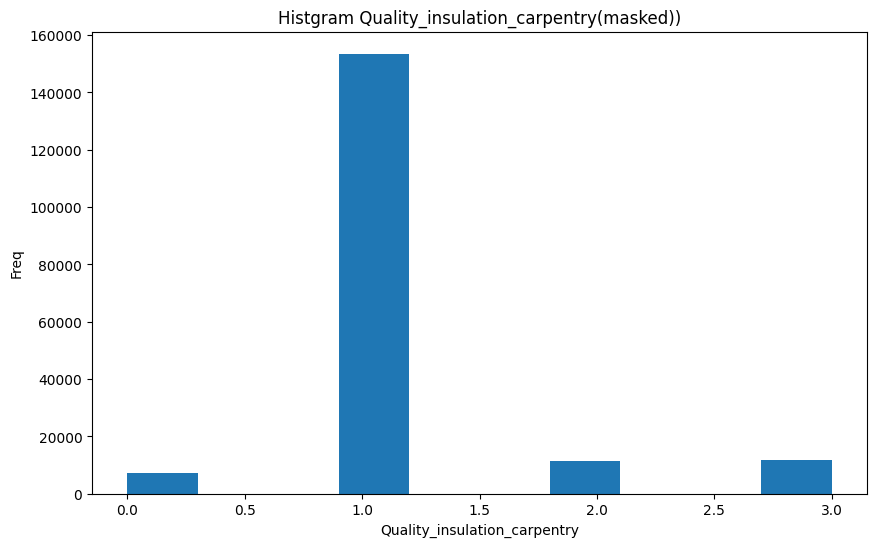

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for Quality_insulation_upper_floor_roof_terrace single noise weighted loss fuction

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(4, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(4, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim, name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])

        # Decoder2 that deals with categorical variables,
        # its goal is to restore the second column: Quality_insulation_envelope
        self.decoder_categorical_2 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the second categorical variable
        ])

        # Decoder3 that deals with categorical variables,
        # its goal is to restore the third column:Roof_insulation_(0/1)
        self.decoder_categorical_3 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(4, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(2, activation = 'softmax') # 2 classes for the third categorical variable
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded_continuous = self.decoder_continuous(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded_categorical_2 = self.decoder_categorical_2(encoded)
        decoded_categorical_3 = self.decoder_categorical_3(encoded)
        decoded = tf.concat([decoded_categorical_1, decoded_categorical_2, decoded_categorical_3, decoded_continuous], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_categorical_1 = y_true[:, 0]
    y_true_categorical_2 = y_true[:, 1]
    y_true_categorical_3 = y_true[:, 2]

    y_pred_categorical_1 = y_pred[:, :4]
    y_pred_categorical_2 = y_pred[:, 4:8]
    y_pred_categorical_3 = y_pred[:, 8:10]
    y_true_continuous = y_true[:, 3:]
    y_pred_continuous = y_pred[:, 10:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)
    categorical_loss_2 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_2, y_pred_categorical_2)
    categorical_loss_3 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_3, y_pred_categorical_3)

    # Use mean squared error for the continuous variables.
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return 3 * categorical_loss_1 + categorical_loss_2 + categorical_loss_3 + continuous_loss

In [ ]:
dae_dataset = df_insulation_roof_encoded_no_missing_values_outliers
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
len(dae_dataset)

186028

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Quality_insulation_upper_floor_roof_terrace  \
count                                148822.000000   
mean                                      1.205581   
std                                       1.294332   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                       3.000000   

       Quality_insulation_envelope  Roof_insulation_(0/1)  Year_construction  \
count                148822.000000           148822.00000      148822.000000   
mean                      1.064426                0.78305           0.649285   
std                       1.108516                0.41217           0.207831   
min                       0.000000                0.00000           0.000000   
25%                       0.000000                1.00000           0.466667   
50%                       1.000000                1.00000           0.666667   
75%                       2.000000                1.00000           0.800000   
max                       3.000000                1.00000           1.000000   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count        148822.000000      148822.000000          148822.000000   
mean              0.418883           0.551313               0.475572   
std               0.191705           0.278161               0.179310   
min               0.000000           0.000000               0.000000   
25%               0.283259           0.333333               0.366148   
50%               0.402928           0.604167               0.468013   
75%               0.525780           0.781250               0.572477   
max               1.000000           1.000000               1.000000   

       Primary_5_usages_consumption  
count                 148822.000000  
mean                       0.354479  
std                        0.215750  
min                        0.000000  
25%                        0.186964  
50%                        0.300377  
75%                        0.482204  
max                        1.000000

In [ ]:
len(x_train)

148822

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 12s 11ms/step - loss: 2.3474
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 10ms/step - loss: 1.5351
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 11ms/step - loss: 2.0017
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 6s 10ms/step - loss: 1.5203
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 11ms/step - loss: 1.5259
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 10ms/step - loss: 1.5012
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 7s 11ms/step - loss: 1.4940
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 6s 10ms/step - loss: 1.4867
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 6s 10ms/step - loss: 1.4837
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 15s 13ms/step - loss: 2.5839
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 1.6933
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 1.5969
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 7s 11ms/step - loss: 1.5928
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 7s 12ms/step - loss: 1.5460
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 6s 11ms/step - loss: 1.5339
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 7s 12ms/step - loss: 1.5226
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 12ms/step - loss: 1.5097
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 6s 11ms/step - loss: 1.5176
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 3, continuous_dim = x_train_np.shape[1] - 3)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
582/582 [==============================] - 14s 11ms/step - loss: 2.1029
Noise Epoch 1/1, Iteration 2/20
582/582 [==============================] - 6s 11ms/step - loss: 1.5349
Noise Epoch 1/1, Iteration 3/20
582/582 [==============================] - 7s 12ms/step - loss: 1.6782
Noise Epoch 1/1, Iteration 4/20
582/582 [==============================] - 6s 11ms/step - loss: 1.4896
Noise Epoch 1/1, Iteration 5/20
582/582 [==============================] - 6s 11ms/step - loss: 1.4806
Noise Epoch 1/1, Iteration 6/20
582/582 [==============================] - 7s 11ms/step - loss: 1.4703
Noise Epoch 1/1, Iteration 7/20
582/582 [==============================] - 7s 11ms/step - loss: 1.4660
Noise Epoch 1/1, Iteration 8/20
582/582 [==============================] - 7s 11ms/step - loss: 1.4624
Noise Epoch 1/1, Iteration 9/20
582/582 [==============================] - 7s 11ms/step - loss: 1.4590
Noise Epoch 1/1, Iteration 10/20
582/582 [==============================

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs=10, validation_data=(x_test_clf, y_test_clf))


Epoch 1/10
4651/4651 [==============================] - 13s 2ms/step - loss: 1.0210 - accuracy: 0.5832 - val_loss: 0.9839 - val_accuracy: 0.6004
Epoch 2/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9757 - accuracy: 0.6051 - val_loss: 0.9666 - val_accuracy: 0.6146
Epoch 3/10
4651/4651 [==============================] - 11s 2ms/step - loss: 0.9579 - accuracy: 0.6159 - val_loss: 0.9504 - val_accuracy: 0.6250
Epoch 4/10
4651/4651 [==============================] - 12s 3ms/step - loss: 0.9411 - accuracy: 0.6255 - val_loss: 0.9298 - val_accuracy: 0.6309
Epoch 5/10
4651/4651 [==============================] - 12s 3ms/step - loss: 0.9248 - accuracy: 0.6362 - val_loss: 0.9167 - val_accuracy: 0.6388
Epoch 6/10
4651/4651 [==============================] - 12s 3ms/step - loss: 0.9129 - accuracy: 0.6442 - val_loss: 0.9042 - val_accuracy: 0.6506
Epoch 7/10
4651/4651 [==============================] - 12s 2ms/step - loss: 0.9048 - accuracy: 0.6476 - val_loss: 0.8985 - val_ac

In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# The function of this function is to reshape the result output by DAE
# Compared with the above function, it can output an additional mask,
# which will be used to select the value to be re-corrected
def reshape_dae_output_mask(dae_output):
    # Assuming the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_categorical_1 = tf.argmax(dae_output[:, :4], 1)
    dae_output_categorical_2 = tf.argmax(dae_output[:, 4:8], 1)
    dae_output_categorical_3 = tf.argmax(dae_output[:, 8:10], 1)
    dae_output_continuous = dae_output[:, 10:]
    # print(dae_output[:, :4])

    # Find the maximum probability in dae_output_categorical_1
    max_prob = tf.reduce_max(dae_output[:, :4], axis=1)

    # Create a mask where max_prob is less than 0.4
    mask = tf.cast(tf.math.less(max_prob, 0.6), tf.bool)

    # Expand dimensions of mask
    mask = tf.expand_dims(mask, axis=1)

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)
    dae_output_categorical_2 = tf.expand_dims(tf.cast(dae_output_categorical_2, tf.float32), 1)
    dae_output_categorical_3 = tf.expand_dims(tf.cast(dae_output_categorical_3, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_categorical_1, dae_output_categorical_2, dae_output_categorical_3, dae_output_continuous], axis=1)

    return reshaped_output, mask


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Quality_insulation_upper_floor_roof_terrace'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.900242, shape=(), dtype=float32)
Loss: tf.Tensor(0.33508748, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.57649904, shape=(), dtype=float32)


<ipython-input-269-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.80374473, shape=(), dtype=float32)
Loss: tf.Tensor(0.31672418, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6109061, shape=(), dtype=float32)


<ipython-input-269-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.90466046, shape=(), dtype=float32)
Loss: tf.Tensor(0.32641655, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5732357, shape=(), dtype=float32)


<ipython-input-269-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.84179103, shape=(), dtype=float32)
Loss: tf.Tensor(0.31013474, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.58968794, shape=(), dtype=float32)


<ipython-input-269-40211c73411e>:61: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.8455152, shape=(), dtype=float32)
Loss: tf.Tensor(0.31721368, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.5948006, shape=(), dtype=float32)


<ipython-input-270-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.79589605, shape=(), dtype=float32)
Loss: tf.Tensor(0.31125095, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.6161423, shape=(), dtype=float32)


<ipython-input-270-7e8a75cdda51>:65: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_copy[:] = missing_data.numpy()


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Quality_insulation_upper_floor_roof_terrace')], 'Quality_insulation_upper_floor_roof_terrace']

3833774    0.0
3651389    0.0
1823048    0.0
615092     0.0
121056     3.0
          ... 
1605701    0.0
736777     0.0
1672066    0.0
2811969    0.0
2546140    0.0
Name: Quality_insulation_upper_floor_roof_terrace, Length: 7438, dtype: float64

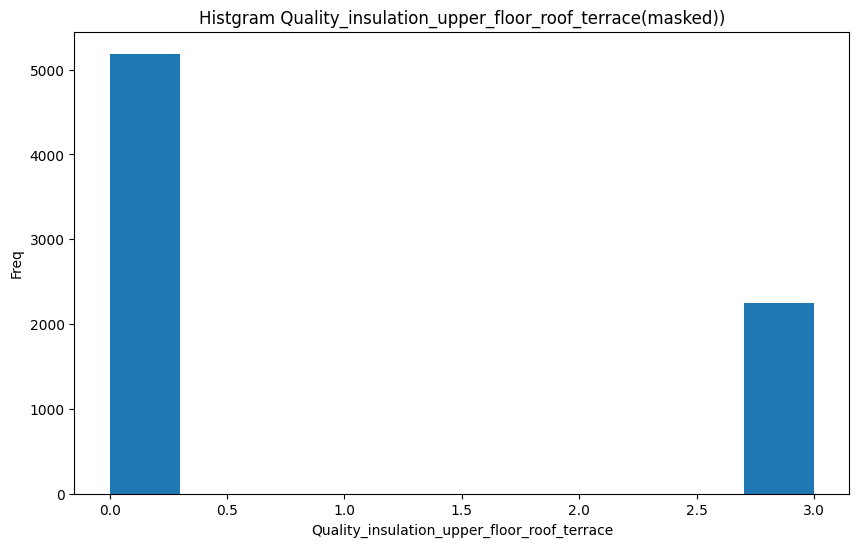

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# DAE for ECS single noise weighted loss fuction

It's important to note that when calculating the imputation accuracy for the ECS feature, I normalized the ECS data to fall within the [0, 1] range. Any error within ±0.03 was considered as a correct imputation.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# DAE1, can handle classification and regression tasks at the same time, using leaky_relu activation function
class DAE(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            # layers.Dense(256, activation = 'leaky_relu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'leaky_relu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'leaky_relu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'leaky_relu'),
            layers.Dense(64, activation = 'leaky_relu'),
            layers.Dense(32, activation = 'leaky_relu'),
            layers.Dense(16, activation = 'leaky_relu'),
            layers.Dense(8, activation = 'leaky_relu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE2, can handle classification and regression tasks at the same time, using swish activation function
class DAE2(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE2, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            # layers.Dense(256, activation = 'swish'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'swish')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'swish'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'swish')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'swish'),
            layers.Dense(64, activation = 'swish'),
            layers.Dense(32, activation = 'swish'),
            layers.Dense(16, activation = 'swish'),
            layers.Dense(8, activation = 'swish'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
# DAE3, can handle classification and regression tasks at the same time, using elu activation function
class DAE3(tf.keras.Model):
    def __init__(self, original_dim, categorical_dim, continuous_dim,  name="dae", **kwargs):
        super(DAE3, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            layers.Dense(original_dim, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            # layers.Dense(256, activation = 'elu'),
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(continuous_dim, activation = 'elu')
        ])

        # An encoder that deals with continuous variables,
        # its goal is to restore the features of the fourth column and beyond
        self.decoder_continuous_target = tf.keras.Sequential([
            # layers.Dense(256, activation = 'elu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'elu')
        ])

        # Decoder1 that deals with categorical variables,
        # its goal is to restore the target column: Quality_insulation_lower_floor
        self.decoder_categorical_1 = tf.keras.Sequential([
            # layers.Dense(256, activation = 'leaky_relu'),
            layers.Dense(128, activation = 'elu'),
            layers.Dense(64, activation = 'elu'),
            layers.Dense(32, activation = 'elu'),
            layers.Dense(16, activation = 'elu'),
            layers.Dense(8, activation = 'elu'),
            # layers.Dropout(0.2),
            layers.Dense(4, activation = 'softmax') # 4 classes for the first categorical variable
        ])


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoder_continuous_1 = self.decoder_continuous_1(encoded)
        decoder_continuous_target = self.decoder_continuous_target(encoded)
        decoded_categorical_1 = self.decoder_categorical_1(encoded)
        decoded = tf.concat([decoder_continuous_target, decoded_categorical_1, decoder_continuous_1], axis=1)
        return decoded


In [ ]:
class MLP_Classifier(tf.keras.Model):
    def __init__(self, num_classes):
        super(MLP_Classifier, self).__init__()
        self.dense1 = layers.Dense(8, activation='elu')
        self.dense2 = layers.Dense(8, activation='elu')
        self.dense3 = layers.Dense(4, activation='elu')
        self.dense4 = layers.Dense(1, activation='elu')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)

In [ ]:
# Custom loss function, used to calculate the loss of discrete variables and continuous variables
def custom_loss(y_true, y_pred):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    y_true_continuous_target = y_true[:, 0]
    y_true_categorical_1 = y_true[:, 1]
    y_true_continuous = y_true[:, 2:]

    y_pred_continuous_target = y_pred[:, 0:1]
    y_pred_categorical_1 = y_pred[:, 1:5]
    y_pred_continuous = y_pred[:, 5:]

    # Use cross entropy for the categorical variables.
    categorical_loss_1 = tf.keras.losses.SparseCategoricalCrossentropy()(y_true_categorical_1, y_pred_categorical_1)

    # Use mean squared error for the continuous variables.
    continuous_target_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous_target, y_pred_continuous_target)
    continuous_loss = tf.keras.losses.MeanSquaredError()(y_true_continuous, y_pred_continuous)

    return categorical_loss_1 + 2 * continuous_target_loss + continuous_loss

In [ ]:
dae_dataset = df_ECS_consumption_no_missing_values_outliers
target_column = 'Primary_ECS_Consumption'

In [ ]:
len(dae_dataset)

1657443

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into training and validation sets
x_train, x_val = train_test_split(dae_dataset, test_size = 0.2, random_state = 1)
x_true = x_val.copy()

In [ ]:
x_train.describe()

Primary_ECS_Consumption  Type_main_energy_ECS  Year_construction  \
count             1.325954e+06          1.325954e+06       1.325954e+06   
mean              3.771437e-01          6.462999e-01       5.017834e-01   
std               1.675623e-01          5.950492e-01       1.543359e-01   
min               0.000000e+00          0.000000e+00       0.000000e+00   
25%               2.363497e-01          0.000000e+00       3.684211e-01   
50%               3.612812e-01          1.000000e+00       5.263158e-01   
75%               5.111698e-01          1.000000e+00       6.315789e-01   
max               1.000000e+00          3.000000e+00       1.000000e+00   

       Living_area_housing  Postal_code_(BAN)  Final_ECS_Consumption  \
count         1.325954e+06       1.325954e+06           1.325954e+06   
mean          4.249033e-01      -4.740429e-02           4.706429e-01   
std           1.947660e-01       9.811603e-01           1.680849e-01   
min           1.349528e-03      -1.965726e+00           0.000000e+00   
25%           2.827260e-01      -8.514078e-01           3.670168e-01   
50%           4.149798e-01       7.719066e-02           4.730422e-01   
75%           5.445344e-01       7.829255e-01           5.699281e-01   
max           1.000000e+00       1.600092e+00           1.000000e+00   

       Primary_5_usages_consumption  Final_consumption_ECS_generator_no1  
count                  1.325954e+06                         1.325954e+06  
mean                   3.793450e-01                         4.884689e-01  
std                    2.131845e-01                         1.666881e-01  
min                    0.000000e+00                         4.430824e-04  
25%                    2.127129e-01                         3.851124e-01  
50%                    3.337159e-01                         4.919322e-01  
75%                    5.089282e-01                         5.872318e-01  
max                    1.000000e+00                         1.000000e+00

In [ ]:
len(x_train)

1325954

In [ ]:
# In the ensemble method, the training code of DAE1 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae = DAE(original_dim = x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0005, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 52s 9ms/step - loss: 0.2584
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1879
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1840
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1814
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 47s 9ms/step - loss: 0.1760
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1720
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1705
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1618
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1608
Noise Epoch 1/1, Iteration 10/20
5180/5180 [===========

In [ ]:
# In the ensemble method, the training code of DAE2 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae2 = DAE2(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae2.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae2.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 55s 10ms/step - loss: 0.3711
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2395
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 53s 10ms/step - loss: 0.4508
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 53s 10ms/step - loss: 0.4547
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 52s 10ms/step - loss: 0.4522
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.3629
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 51s 10ms/step - loss: 0.2180
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 52s 10ms/step - loss: 0.2172
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 52s 10ms/step - loss: 0.2171
Noise Epoch 1/1, Iteration 10/20
5180/5180 [==

In [ ]:
# In the ensemble method, the training code of DAE3 replaces a random mask every round of training.

# Convert the dataset to np format
x_train_np = x_train.values

dae3 = DAE3(original_dim=x_train_np.shape[1], categorical_dim = 1, continuous_dim = x_train_np.shape[1] - 2)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
dae3.compile(optimizer, loss=custom_loss)

# set up early stopping, but this has no effect when iterations_per_noise = 1.
early_stop = EarlyStopping(monitor='loss', min_delta = 0.0001, patience=5)

# multiple epochs with different sparsity noise
num_epochs = 20
iterations_per_noise = 20

for epoch in range(num_epochs // iterations_per_noise):
    # create a new array with the same shape as x_train_np but with all elements -1
    x_train_np_minus_one = np.full(x_train_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 0.70       # Note that due to the replacement rules in tf.where later, the masking factor here should be 1-target value
    mask = np.random.binomial(n = 1, p = masking_factor, size = x_train_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    x_train_np_noisy = tf.where(mask == 1, x_train_np, x_train_np_minus_one)

    for iteration in range(iterations_per_noise):
        print(f"Noise Epoch {epoch + 1}/{num_epochs // iterations_per_noise}, Iteration {iteration + 1}/{iterations_per_noise}")
        dae3.fit(x_train_np_noisy, x_train_np, batch_size = 256, callbacks=[early_stop])


Noise Epoch 1/1, Iteration 1/20
5180/5180 [==============================] - 56s 10ms/step - loss: 0.2364
Noise Epoch 1/1, Iteration 2/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1801
Noise Epoch 1/1, Iteration 3/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1750
Noise Epoch 1/1, Iteration 4/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1719
Noise Epoch 1/1, Iteration 5/20
5180/5180 [==============================] - 48s 9ms/step - loss: 0.1691
Noise Epoch 1/1, Iteration 6/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1686
Noise Epoch 1/1, Iteration 7/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1668
Noise Epoch 1/1, Iteration 8/20
5180/5180 [==============================] - 50s 10ms/step - loss: 0.1661
Noise Epoch 1/1, Iteration 9/20
5180/5180 [==============================] - 49s 9ms/step - loss: 0.1660
Noise Epoch 1/1, Iteration 10/20
5180/5180 [=====

In [ ]:
# Save the weights
dae.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae1_ensemble_leaky_relu_128_epoch20_insulation_roof_dataset1.h5')
dae2.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae2_ensemble_swish_128_epoch20_insulation_roof_dataset1.h5')
dae3.save_weights('/content/gdrive/MyDrive/Colab Notebooks/DPE_dataset/dae3_ensemble_elu_128_epoch20_insulation_roof_dataset1.h5')

In [ ]:
# Use a multilayer perceptron to train a classification network as a baseline
mlp_clf = MLP_Classifier(num_classes = 4)

mlp_clf.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

y_train_clf = x_train.values[:, 0]  # The label is in the first column
x_train_clf = x_train.values[:, 1:]  # The rest are features

y_test_clf = x_val.values[:, 0]
x_test_clf = x_val.values[:, 1:]

# train
mlp_clf.fit(x_train_clf, y_train_clf, epochs = 5, validation_data = (x_test_clf, y_test_clf))


Epoch 1/5
41437/41437 [==============================] - 99s 2ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 2/5
41437/41437 [==============================] - 93s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 3/5
41437/41437 [==============================] - 96s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/5
41437/41437 [==============================] - 94s 2ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/5
41437/41437 [==============================] - 103s 2ms/step - loss: 0.0040 - val_loss: 0.0040


In [ ]:
# The function of this function is to reshape the result output by DAE
def reshape_dae_output(dae_output):
    # the first 3 columns of y_true and y_pred are the categorical variables,
    # and the rest are the continuous variables.
    dae_output_continuous_target = dae_output[:, 0:1]
    dae_output_categorical_1 = tf.argmax(dae_output[:, 1:5], 1)
    dae_output_continuous = dae_output[:, 5:]

    # Cast the categorical outputs to float32 and expand dimensions
    dae_output_categorical_1 = tf.expand_dims(tf.cast(dae_output_categorical_1, tf.float32), 1)

    reshaped_output = tf.concat([dae_output_continuous_target, dae_output_categorical_1, dae_output_continuous], axis=1)

    return reshaped_output


In [ ]:
# Interpolation process function. This function is used for non-ensemble methods.
def insert_and_impute(df, df_true, train_df, column_name, fraction, vae, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # print(df_copy_np_noisy)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data = vae(missing_data)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# Interpolation process function. This function is used for ensemble methods.
def insert_and_impute_ensemble(df, df_true, train_df, column_name, fraction, dae1, dae2, dae3, num_iterations = 10):
    # Create a copy of df
    df_copy = df.copy()
    df_copy_np = df_copy.values

    # create a new array with the same shape as x_train_np but with all elements -1
    df_copy_np_minus_one = np.full(df_copy_np.shape, -1)

    # Create a mask, the shape of the mask is the same as x_train_np, p = masking_factor represents the probability of 1 on the mask
    masking_factor = 1 - fraction
    mask = np.random.binomial(n = 1, p = masking_factor, size = df_copy_np.shape)

    # Use the tf.where function to replace the value in x_train_np with -1 according to the mask to get the noise data
    df_copy_np_noisy = tf.where(mask, df_copy_np, df_copy_np_minus_one)
    df_copy_np_noisy = tf.cast(df_copy_np_noisy, tf.float32)

    # Convert dataframe to input format accepted by vae
    missing_data = tf.Variable(df_copy_np_noisy, dtype = tf.float32, trainable=True)
    true_data = tf.Variable(df_true.values.astype('float32'), trainable = True)

    # Convert numpy mask to tensorflow tensor
    mask = tf.convert_to_tensor(mask, dtype = tf.bool)
    mask = np.logical_not(mask)

    # Get the column index for the loss calculation
    column_index = df.columns.get_loc(column_name)

    # Iterate num_iterations rounds to impute missing values
    for i in range(num_iterations):
        # Get imputed data
        imputed_data1 = dae1(missing_data)
        imputed_data2 = dae2(missing_data)
        imputed_data3 = dae3(missing_data)

        # ensemble the 3 daes' output
        imputed_data = tf.reduce_mean([imputed_data1, imputed_data2, imputed_data3], axis=0)
        imputed_data = reshape_dae_output(imputed_data)

        # RMSE on specified column
        # loss = tf.sqrt(tf.reduce_mean(tf.square((imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])))
        # MAE on specified column
        loss = tf.reduce_mean(tf.abs(imputed_data[:, column_index] - true_data[:, column_index])[mask[:, column_index]])
        print('Target column loss:', loss)

        loss = tf.reduce_mean(tf.abs(imputed_data - true_data)[mask])
        print('Loss:', loss)

        # Apply mask to imputed and true data
        imputed_data_masked = tf.boolean_mask(imputed_data[:, column_index], mask[:, column_index])
        true_data_masked = tf.boolean_mask(true_data[:, column_index], mask[:, column_index])

        # Create a mask for correct imputations
        # accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.1) | ((imputed_data_masked < -0.1) & (true_data_masked < 0))
        accuracy_mask = (tf.abs(imputed_data_masked - true_data_masked) < 0.03)

        # Calculate accuracy by dividing the number of correct imputations by the total number of imputations
        accuracy = tf.reduce_mean(tf.cast(accuracy_mask, tf.float32))

        print('Imputation accuracy:', accuracy)

        # Fill missing parts of missing_data with imputed_data
        missing_data.assign(tf.where(mask, imputed_data, missing_data))

    df_copy[:] = missing_data.numpy()

    return df_copy, mask


In [ ]:
# target_column = 'Primary_ECS_Consumption'
target_column = 'Primary_ECS_Consumption'

In [ ]:
# Test the correct rate of the target column of DAE1 when the missing ratio is 20%.
df_insulation_floor_imputed, mask = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae, num_iterations = 1)

Target column loss: tf.Tensor(0.047782406, shape=(), dtype=float32)
Loss: tf.Tensor(0.18525887, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.69286597, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE2 when the missing ratio is 20%.
df_insulation_floor_imputed_2, mask_2 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae2, num_iterations = 1)

Target column loss: tf.Tensor(0.053452652, shape=(), dtype=float32)
Loss: tf.Tensor(0.18510978, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.61474806, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 20%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.046301562, shape=(), dtype=float32)
Loss: tf.Tensor(0.18360165, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7149744, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of DAE3 when the missing ratio is 10%.
df_insulation_floor_imputed_3, mask_3 = insert_and_impute(x_val, x_true, x_train, target_column, 0.1, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.033873342, shape=(), dtype=float32)
Loss: tf.Tensor(0.17505927, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.8152226, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 20%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.2, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.04515814, shape=(), dtype=float32)
Loss: tf.Tensor(0.18134865, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.7215102, shape=(), dtype=float32)


In [ ]:
# Test the correct rate of the target column of ensemble when the missing ratio is 10%.
df_insulation_floor_imputed_ensemble, mask_ensemble = insert_and_impute_ensemble(x_val, x_true, x_train, target_column, 0.1, dae, dae2, dae3, num_iterations = 1)

Target column loss: tf.Tensor(0.03266938, shape=(), dtype=float32)
Loss: tf.Tensor(0.17434849, shape=(), dtype=float32)
Imputation accuracy: tf.Tensor(0.8169706, shape=(), dtype=float32)


In [ ]:
def draw_histogram_with_mask(df, column, mask, bins=10):
    """
     Plot a histogram of the specified columns of the DataFrame while filtering using mask.

     parameter:
     df : pandas DataFrame
     column : string, column name
     mask : Series or array-like, Boolean mask
     bins : int, the number of bins in the histogram
    """

    # Apply mask to filter data
    df_masked = df[mask]

    # draw histogram
    plt.figure(figsize=(10, 6))
    df.loc[mask[:, df.columns.get_loc(column)], column].hist(bins=bins)

    plt.title(f'Histgram {column}(masked))')
    plt.xlabel(column)
    plt.ylabel('Freq')
    plt.grid(False)
    plt.show()


In [ ]:
df_insulation_floor_imputed.loc[mask[:, df_insulation_floor_imputed.columns.get_loc('Primary_ECS_Consumption')], 'Primary_ECS_Consumption']

4253017    0.235384
3250715    0.502671
3430877    0.586555
901538     0.488792
4030008    0.238184
             ...   
3210371    0.585752
4164421    0.369280
1877302    0.553196
4102836    0.210354
3037385    0.156723
Name: Primary_ECS_Consumption, Length: 66274, dtype: float64

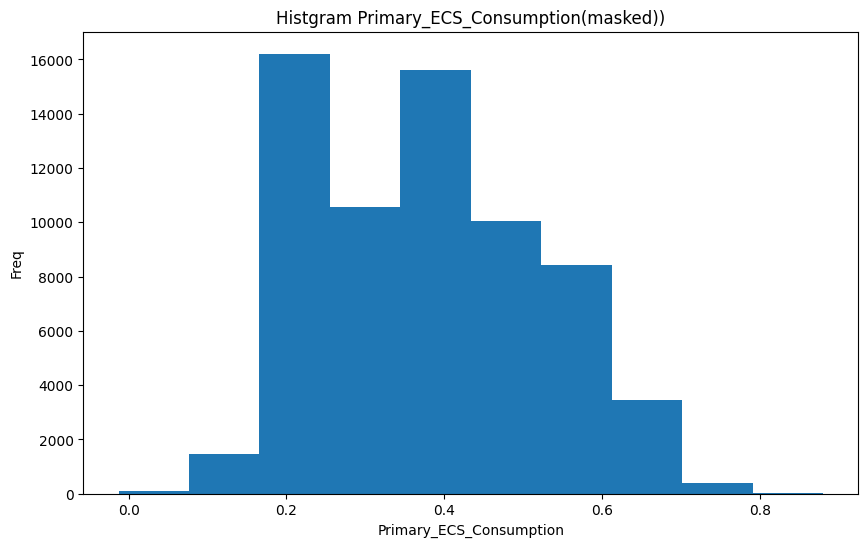

In [ ]:
draw_histogram_with_mask(df_insulation_floor_imputed, target_column, mask, bins=10)

# package list

In [ ]:
!pip freeze > requirements.txt